In [1]:
import numpy as np
from AFVB_PCE import *
from aPCE import *
from ME_PCE import *
from VRVM_PCE import *
import test_functions as tf
from sklearn.metrics import mean_squared_error
import skopt
import time
from skopt import BayesSearchCV
from sensitivity_analysis import *

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import sys

In [3]:
## Directory where I want the plots saved
wd = '/Users/chave/Desktop/ThesisFiles/SparseBayesianLearning/images'

In [4]:
def parameter_values(param_list, t):
    
    param1 = []
    param2 = []
    param3 = []
    param4 = []


    for j in range(t):
        param1.append(list(param_list[j].values())[0])
        param2.append(list(param_list[j].values())[1])
        param3.append(list(param_list[j].values())[2])
        param4.append(list(param_list[j].values())[3])
        
    return param1, param2, param3, param4

In [5]:
def parameter_values_ME(param_list, t):
    
    param1 = []
    param2 = []
    param3 = []
    param4 = []
    param5 = []
    param6 = []
    param7 = []

    for j in range(t):
        param1.append(list(param_list[j].values())[0])
        param2.append(list(param_list[j].values())[1])
        param3.append(list(param_list[j].values())[2])
        param4.append(list(param_list[j].values())[3])
        param5.append(list(param_list[j].values())[4])
        param6.append(list(param_list[j].values())[5])
        param7.append(list(param_list[j].values())[6])
        
    return param1, param2, param3, param4, param5, param6, param7

# Example 1: Ishigami Function

In [50]:
N_train = 320 # Sample size
N_test = 80
N_pol = 1000
N_mc = 1000000 #10^6 samples

d = 3

In [51]:
np.random.seed(2357)

X_train = np.random.uniform(-np.pi, np.pi, size=(N_train, d))
X_test = np.random.uniform(-np.pi, np.pi, size=(N_test, d))
X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))

Y_train = tf.ishigami(X_train)
Y_test = tf.ishigami(X_test)

In [52]:
# Taking max and min of all data
domain_data = []
for i in range(d):
    domain_data.append([np.min([X_train[:,i].min(), X_test[:,i].min()]), np.max([X_train[:,i].max(), X_test[:,i].max()])])


In [53]:
sa = sobol_GSA(d, tf.ishigami)

V_Ishigami = 7**2/8 + 0.1*np.pi**4/5 + 0.1**2*np.pi**8/18 + 1/2
GSA_Ishigami = ([1/2*(1+0.1*np.pi**4/5)**2, 7**2/8, 0],
                [1/2*(1+0.1*np.pi**4/5)**2 + 8*0.1**2*np.pi**8/225, 7**2/8, 8*0.1**2*np.pi**8/225],
                [1/2*(1+0.1*np.pi**4/5)**2/V_Ishigami, 7**2/8/V_Ishigami, 0],
                [(1/2*(1+0.1*np.pi**4/5)**2 + 8*0.1**2*np.pi**8/225)/V_Ishigami, 7**2/8/V_Ishigami, 8*0.1**2*np.pi**8/225/V_Ishigami])
GSA_Ishigami = pd.DataFrame(GSA_Ishigami).T
GSA_Ishigami.columns = ['Partial Variance', 'Total Variance', '1st Order', 'Total Order']

In [10]:
#Hermite quadrature 

In [11]:
# IDEA
# Can we use the roots of the built polynomials instead of the legendre roots?
# Maybe iteratively?
# We would need to figure out how the weights are calculated too!

In [49]:
(-0.5061654317975053)**5

-0.03322480265402565

In [86]:
k = 0
a = -np.pi#domain_data[k][0]
b = np.pi#domain_data[k][1]
xi, w = np.polynomial.legendre.leggauss(23)

for i in range(23):
    z = xi*(b-a)/2 + (b+a)/2
    
    #print(1/2*np.dot(w, z**i))
    print(2/(b-a)*np.dot(w, xi**i))
    
    #print(np.mean(((2*X_train[:,k]-b-a)/(b-a))**i))

    #print(np.mean((X_train[:,k])**i))
    
    #print(1/2*(1**(i+1) - (-1)**(i+1))/(i+1))
    print(1/(2*np.pi)*(np.pi**(i+1) - (-np.pi)**(i+1))/(i+1))
    print('')


0.6366197723675814
1.0

-1.4409343326187434e-18
0.0

0.21220659078919382
3.289868133696453

1.1062058091860153e-18
0.0

0.12732395447351624
19.481818206800487

-3.4136855526486657e-18
0.0

0.09094568176679732
137.3413133679006

-1.0820150343331116e-18
0.0

0.07073553026306457
1054.281224007841

-1.6442247467271731e-19
0.0

0.0578745247606892
8513.45886146209

1.3999956112148655e-18
0.0

0.04897075172058317
71097.62934795184

2.6261465885558318e-20
0.0

0.04244131815783874
608144.7454502899

9.878766268164258e-19
0.0

0.037448221903975364
5296012.990760779

-9.600145763294304e-19
0.0

0.03350630380882006
46767494.898487516

-1.5378906265807024e-19
0.0

0.030315227255599108
417616990.28965205

4.989788654176284e-19
0.0

0.027679120537720925
3763304530.0861425



In [13]:
mod = aPCE(X_pol, 12) 
P = mod.Create_Orthonormal_Polynomials(12)

In [14]:
for i in range(23):
    z = xi*(b-a)/2 + (b+a)/2
    print(1/2*np.dot(w, z**i))
    
mod.mu_mat

1.0
-1.293784430948547e-17
3.289868133696453
2.8310642889310827e-16
19.481818206800487
1.1076957874477074e-15
137.34131336790057
-5.192729848288776e-16
1054.2812240078408
-1.4871547105297986e-13
8513.458861462086
3.810636596511958e-13
71097.62934795179
3.5776681493617552e-12
608144.7454502896
-3.281267428533378e-11
5296012.990760776
7.189918177500487e-10
46767494.8984875
-2.1191201281885824e-09
417616990.28965193
3.422940492868333e-09
3763304530.0861416


array([[ 1.00000000e+00,  0.00000000e+00,  3.28986813e+00,
         0.00000000e+00,  1.94818182e+01, -1.31589436e-15,
         1.37341313e+02,  0.00000000e+00,  1.05428122e+03,
         2.21077266e-14,  8.51345886e+03,  8.85859597e-13,
         7.10976293e+04],
       [ 0.00000000e+00,  3.28986813e+00,  0.00000000e+00,
         1.94818182e+01, -1.31589436e-15,  1.37341313e+02,
         0.00000000e+00,  1.05428122e+03,  2.21077266e-14,
         8.51345886e+03,  8.85859597e-13,  7.10976293e+04,
        -6.61225619e-12],
       [ 3.28986813e+00,  0.00000000e+00,  1.94818182e+01,
        -1.31589436e-15,  1.37341313e+02,  0.00000000e+00,
         1.05428122e+03,  2.21077266e-14,  8.51345886e+03,
         8.85859597e-13,  7.10976293e+04, -6.61225619e-12,
         6.08144745e+05],
       [ 0.00000000e+00,  1.94818182e+01, -1.31589436e-15,
         1.37341313e+02,  0.00000000e+00,  1.05428122e+03,
         2.21077266e-14,  8.51345886e+03,  8.85859597e-13,
         7.10976293e+04, -6.61225619e

In [18]:
P[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  5.51328895e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.11803399e+00,  0.00000000e+00,  3.39841581e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.06657637e-16, -1.26325320e+00,  3.24200340e-17,
         2.13323849e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e

In [32]:
for k in range(12):
    print(mod.Inner_prod(P[2][3,:], P[2][k,:], X_train[:,2]))

2.5078252298954074e-17
5.976584425192635e-16
1.1993784319342577e-16
0.9999999999999999
-5.443144836659062e-16
-3.426795398036696e-14
2.967323358029202e-15
1.6123590715069761e-13
-9.035985146413678e-15
-8.768777893776276e-13
6.809330384389846e-14
5.2526370944624185e-12


In [27]:
P[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  5.51328895e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.11803399e+00,  0.00000000e+00,  3.39841581e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.06657637e-16, -1.26325320e+00,  3.24200340e-17,
         2.13323849e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e

## AFVB

### aPCE - Global

In [54]:
# Optimized Hyper-Parameters: slurm-8832055
best_params_AFVB_Global_aPCE = [OrderedDict([('A_0', 0.1), ('B_0', 1e-05), ('C_0', 0.0001), ('D_0', 0.001)]), OrderedDict([('A_0', 0.00010000000000000555), ('B_0', 1e-05), ('C_0', 0.1), ('D_0', 1e-05)]), OrderedDict([('A_0', 0.0012495544313599809), ('B_0', 0.00045082851858731135), ('C_0', 0.0485759996200044), ('D_0', 0.00097321991720733)]), OrderedDict([('A_0', 0.062298391971661204), ('B_0', 0.00029429754520985546), ('C_0', 0.0038340814655009343), ('D_0', 0.0009713918551789318)]), OrderedDict([('A_0', 0.1), ('B_0', 1e-05), ('C_0', 0.0001), ('D_0', 0.001)]), OrderedDict([('A_0', 0.0051528582601995), ('B_0', 0.001), ('C_0', 0.0002217016195096706), ('D_0', 1e-05)]), OrderedDict([('A_0', 0.0001), ('B_0', 1e-05), ('C_0', 0.0011183916605811126), ('D_0', 0.001)]), OrderedDict([('A_0', 0.02302436013439016), ('B_0', 1.0000399509388109e-05), ('C_0', 0.030365019219664887), ('D_0', 0.00019892688570609046)]), OrderedDict([('A_0', 0.09644996956027777), ('B_0', 9.221044513956777e-05), ('C_0', 0.016422356260480594), ('D_0', 0.000164267213150934)]), OrderedDict([('A_0', 0.029740619111989507), ('B_0', 1e-05), ('C_0', 0.0001), ('D_0', 0.001)]), OrderedDict([('A_0', 0.007818515601996581), ('B_0', 1.2603015456139375e-05), ('C_0', 0.0004018984486895972), ('D_0', 0.0009969928963234301)]), OrderedDict([('A_0', 0.07474213911126742), ('B_0', 1.0206233417789488e-05), ('C_0', 0.013403842721103936), ('D_0', 0.0004487709566910544)]), OrderedDict([('A_0', 0.048497319177229534), ('B_0', 1.1788744443105735e-05), ('C_0', 0.013110188321014741), ('D_0', 1.0600969348122295e-05)]), OrderedDict([('A_0', 0.039309956825069464), ('B_0', 1.0527782437069092e-05), ('C_0', 0.0016170718851976585), ('D_0', 1.594361553720053e-05)])]

A0_AFVB_Global_aPCE, B0_AFVB_Global_aPCE, C0_AFVB_Global_aPCE, D0_AFVB_Global_aPCE = parameter_values(best_params_AFVB_Global_aPCE, 14)

In [55]:
p = list(range(1,15))

Error_AFVB_Global_aPCE_Full = []
Error_AFVB_Global_aPCE_Sparse = []

mean_sparse = []
V_sparse = []
Si_sparse = []
Ti_sparse = []

B_init = [[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]

sa = sobol_GSA(d, tf.ishigami)

for i in range(len(p)):
    
    mod = aPCE(X_pol, p[i]) 
    P = mod.Create_Orthonormal_Polynomials_MC(p[i])
    
    Ishigami_AFVB_Global_aPCE_model = AFVB_PCE('aPCE', d = 3, p = p[i], domain = None, aPCE_model = mod, P = P, A_0 = A0_AFVB_Global_aPCE[i], B_0 = B0_AFVB_Global_aPCE[i], C_0 = C0_AFVB_Global_aPCE[i], D_0 = D0_AFVB_Global_aPCE[i])
    Ishigami_AFVB_Global_aPCE_model.fit(X_train, Y_train)
    
    print('n =', Ishigami_AFVB_Global_aPCE_model.n, 'n* =', Ishigami_AFVB_Global_aPCE_model.n_star)
    
    mean_sparse.append(Ishigami_AFVB_Global_aPCE_model.a_hat[0])
    V_sparse.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_aPCE_model.a_hat, Ishigami_AFVB_Global_aPCE_model.active_cols)[1])
    Si_sparse.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_aPCE_model.a_hat, Ishigami_AFVB_Global_aPCE_model.active_cols)[0]['1st Order'])
    Ti_sparse.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_aPCE_model.a_hat, Ishigami_AFVB_Global_aPCE_model.active_cols)[0]['Total Order'])
    
    Error_AFVB_Global_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, Ishigami_AFVB_Global_aPCE_model.predict(X_test, sparse = False))))
    Error_AFVB_Global_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, Ishigami_AFVB_Global_aPCE_model.predict(X_test, sparse = True))))
    

n = 4 n* = 2
n = 10 n* = 3
n = 20 n* = 5
n = 35 n* = 6
n = 56 n* = 8
n = 84 n* = 10
n = 120 n* = 12
n = 165 n* = 30
n = 220 n* = 26
n = 286 n* = 31
n = 364 n* = 37
n = 455 n* = 45
n = 560 n* = 560
n = 680 n* = 48


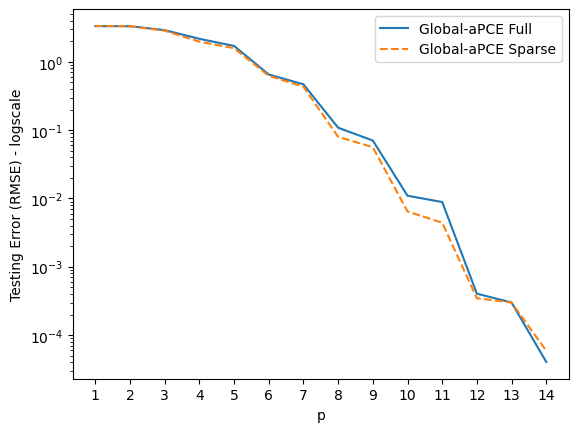

In [56]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_AFVB_Global_aPCE_Full, '-', label = 'Global-aPCE Full')
plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '--', label = 'Global-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### PCE - Global

In [15]:
# Optimized Hyper-Parameters: slurm-8832056
best_params_AFVB_Global_PCE = [OrderedDict([('A_0', 0.1), ('B_0', 1e-05), ('C_0', 0.0001), ('D_0', 0.001)]), OrderedDict([('A_0', 0.0001), ('B_0', 0.001), ('C_0', 0.1), ('D_0', 1e-05)]), OrderedDict([('A_0', 0.0012495544313599809), ('B_0', 0.00045082851858731135), ('C_0', 0.0485759996200044), ('D_0', 0.00097321991720733)]), OrderedDict([('A_0', 0.0001), ('B_0', 0.0009541553452263053), ('C_0', 0.0059353678724952804), ('D_0', 0.001)]), OrderedDict([('A_0', 0.1), ('B_0', 1e-05), ('C_0', 0.0001), ('D_0', 0.001)]), OrderedDict([('A_0', 0.00465100779537657), ('B_0', 0.00031450648795441834), ('C_0', 0.00018474835198383974), ('D_0', 1.1778987914878392e-05)]), OrderedDict([('A_0', 0.0001), ('B_0', 1e-05), ('C_0', 0.0007261571648312437), ('D_0', 0.001)]), OrderedDict([('A_0', 0.03015018205965136), ('B_0', 0.00016042881101162925), ('C_0', 0.05231555386628851), ('D_0', 6.468295430852118e-05)]), OrderedDict([('A_0', 0.0001), ('B_0', 2.9346987572766715e-05), ('C_0', 0.015947483672089122), ('D_0', 0.00015419494348090914)]), OrderedDict([('A_0', 0.07044002669184762), ('B_0', 2.691695529770012e-05), ('C_0', 0.0001), ('D_0', 0.00062965003263135)]), OrderedDict([('A_0', 0.06356250607501522), ('B_0', 1.5053310452176014e-05), ('C_0', 0.00029248041639387036), ('D_0', 0.00099312346432455)]), OrderedDict([('A_0', 0.06868834896477316), ('B_0', 1.3848973003921075e-05), ('C_0', 0.004842526210683824), ('D_0', 4.604705739208385e-05)]), OrderedDict([('A_0', 0.02596344617954603), ('B_0', 1.811992527347763e-05), ('C_0', 0.09787536514108525), ('D_0', 1.2898045146167516e-05)]), OrderedDict([('A_0', 0.03091616375724195), ('B_0', 1.2319121856283929e-05), ('C_0', 0.08520557630061927), ('D_0', 2.260443733373535e-05)])]

A0_AFVB_Global_PCE, B0_AFVB_Global_PCE, C0_AFVB_Global_PCE, D0_AFVB_Global_PCE = parameter_values(best_params_AFVB_Global_PCE, 14)


In [16]:
B_init = [[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]

In [17]:
p = list(range(1,15))

Error_AFVB_Global_PCE_Full = []
Error_AFVB_Global_PCE_Sparse = []

mean_sparse_pce = []
V_sparse_pce = []
Si_sparse_pce = []
Ti_sparse_pce = []

sa = sobol_GSA(d, tf.ishigami) 

for i in range(len(p)):
    
    Ishigami_AFVB_Global_PCE_model = AFVB_PCE('PCE_Legendre', d = 3, p = p[i], domain = np.array(B_init), aPCE_model = None, P = None, A_0 = A0_AFVB_Global_PCE[i], B_0 = B0_AFVB_Global_PCE[i], C_0 = C0_AFVB_Global_PCE[i], D_0 = D0_AFVB_Global_PCE[i])
    Ishigami_AFVB_Global_PCE_model.fit(X_train, Y_train)
    
    print(Ishigami_AFVB_Global_PCE_model.n_star)
    
    mean_sparse_pce.append(Ishigami_AFVB_Global_PCE_model.a_hat[0])
    V_sparse_pce.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_PCE_model.a_hat, Ishigami_AFVB_Global_PCE_model.active_cols)[1])
    Si_sparse_pce.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_PCE_model.a_hat, Ishigami_AFVB_Global_PCE_model.active_cols)[0]['1st Order'])
    Ti_sparse_pce.append(sa.sobol_PCE(p[i], Ishigami_AFVB_Global_PCE_model.a_hat, Ishigami_AFVB_Global_PCE_model.active_cols)[0]['Total Order'])
         
        
    Error_AFVB_Global_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, Ishigami_AFVB_Global_PCE_model.predict(X_test, sparse = False))))
    Error_AFVB_Global_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, Ishigami_AFVB_Global_PCE_model.predict(X_test, sparse = True))))
    

2
3
5
6
8
10
12
22
18
17
18
21
560
680


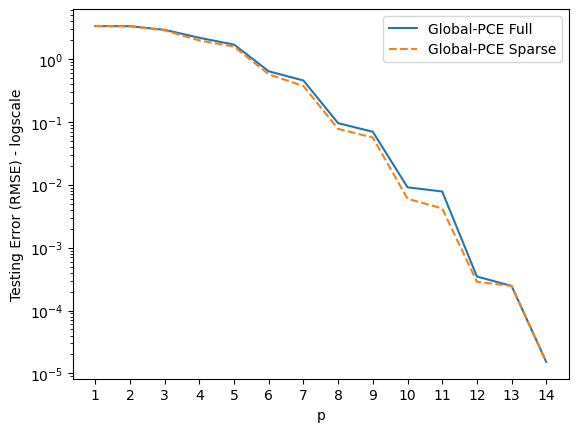

In [18]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
#plt.plot(p, Error_AFVB_Global_aPCE_Full, '-s', label = 'Global-aPCE Full')
#plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '-s', label = 'Global-aPCE Sparse')
plt.plot(p, Error_AFVB_Global_PCE_Full, '-', label = 'Global-PCE Full')
plt.plot(p, Error_AFVB_Global_PCE_Sparse, '--', label = 'Global-PCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

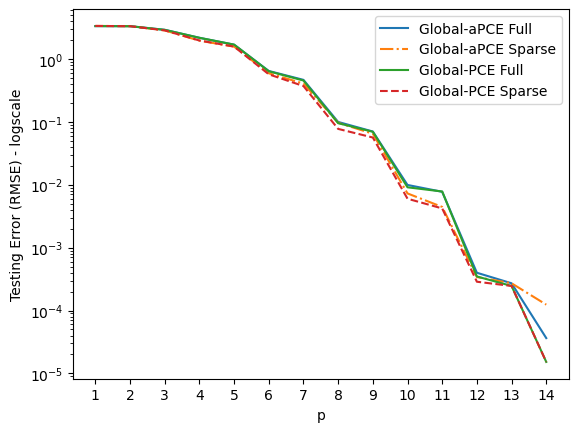

In [38]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_AFVB_Global_aPCE_Full, '-', label = 'Global-aPCE Full')
plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '-.', label = 'Global-aPCE Sparse')
plt.plot(p, Error_AFVB_Global_PCE_Full, '-', label = 'Global-PCE Full')
plt.plot(p, Error_AFVB_Global_PCE_Sparse, '--', label = 'Global-PCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### aPCE - Local

In [57]:
B_init = [[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]

In [58]:
# Optimized Hyper-Parameters: slurm-8832063
best_params_AFVB_ME_aPCE = [OrderedDict([('alpha', 0.7667854082523211), ('arg1', 0.09012749548944493), ('arg2', 1e-05), ('arg3', 0.0001), ('arg4', 0.0005107567866136673), ('theta1', 0.014537288585603459), ('theta2', 0.9170763678330711)]), OrderedDict([('alpha', 0.99), ('arg1', 0.0001), ('arg2', 0.001), ('arg3', 0.1), ('arg4', 0.001), ('theta1', 1e-06), ('theta2', 1e-06)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.014979026385941976), ('arg2', 0.0005646240458037877), ('arg3', 0.04787215094395515), ('arg4', 4.065632207134362e-05), ('theta1', 1e-06), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.9837478068014952), ('arg1', 0.037302668878552186), ('arg2', 0.00032038276436293316), ('arg3', 0.030453652593462246), ('arg4', 0.0003702687947125577), ('theta1', 0.008296440973804822), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.10121504515021398), ('arg1', 0.05615665294125695), ('arg2', 0.0008836962502007533), ('arg3', 0.08893049006933768), ('arg4', 0.0008393581524243025), ('theta1', 1e-06), ('theta2', 1e-06)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.0001), ('arg2', 1e-05), ('arg3', 0.0001), ('arg4', 1e-05), ('theta1', 0.6569785721502304), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.7342205271612293), ('arg1', 0.1), ('arg2', 0.0009216420311636602), ('arg3', 0.009269876500269536), ('arg4', 0.00014195940084479723), ('theta1', 0.26424286684100246), ('theta2', 0.2151513002728918)]), OrderedDict([('alpha', 0.03987524343207561), ('arg1', 0.015133085629688108), ('arg2', 0.0007882306641486509), ('arg3', 0.0013242615046221457), ('arg4', 4.889398054053415e-05), ('theta1', 0.48400274472428195), ('theta2', 0.3922529067901004)]), OrderedDict([('alpha', 0.38712821653932944), ('arg1', 0.08874970996868763), ('arg2', 0.0001948844120459941), ('arg3', 0.017939587883620704), ('arg4', 0.0002711850789643409), ('theta1', 0.99), ('theta2', 0.99)]), OrderedDict([('alpha', 0.6707998290971369), ('arg1', 0.0001), ('arg2', 0.000857291841047801), ('arg3', 0.0001), ('arg4', 0.00037257662131183), ('theta1', 0.02062068385983201), ('theta2', 0.99)])]

alpha_AFVB_ME_aPCE, A0_AFVB_ME_aPCE, B0_AFVB_ME_aPCE, C0_AFVB_ME_aPCE, D0_AFVB_ME_aPCE, theta1_AFVB_ME_aPCE, theta2_AFVB_ME_aPCE = parameter_values_ME(best_params_AFVB_ME_aPCE, 10)


In [59]:
p = list(range(1,11))

Error_AFVB_ME_aPCE_Full = []
Error_AFVB_ME_aPCE_Sparse = []

for i in range(len(p)):

    temp = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, AFVB_PCE, X_pol, False, theta1_AFVB_ME_aPCE[i], theta2_AFVB_ME_aPCE[i], alpha_AFVB_ME_aPCE[i], 15, None, A0_AFVB_ME_aPCE[i], B0_AFVB_ME_aPCE[i], C0_AFVB_ME_aPCE[i], D0_AFVB_ME_aPCE[i])
    temp.fit(X_train, Y_train)
    
    temp2 = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, AFVB_PCE, X_pol, False, theta1_AFVB_ME_aPCE[i], theta2_AFVB_ME_aPCE[i], alpha_AFVB_ME_aPCE[i], 15, temp.B_split, A0_AFVB_ME_aPCE[i], B0_AFVB_ME_aPCE[i], C0_AFVB_ME_aPCE[i], D0_AFVB_ME_aPCE[i])
    temp2.fit(X_train, Y_train)
    
    print(temp.B_split.shape[0])
    
    Error_AFVB_ME_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_AFVB_ME_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))


16
8
8
8
8
4
4
2
1
2


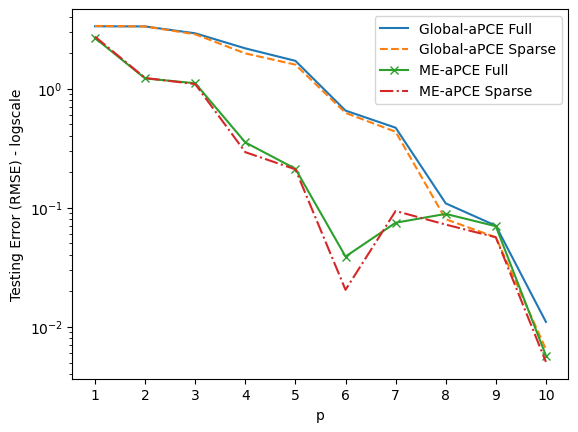

In [60]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_AFVB_Global_aPCE_Full[:10], '-', label = 'Global-aPCE Full')
plt.plot(p, Error_AFVB_Global_aPCE_Sparse[:10], '--', label = 'Global-aPCE Sparse')
plt.plot(p, Error_AFVB_ME_aPCE_Full, '-x', label = 'ME-aPCE Full')
plt.plot(p, Error_AFVB_ME_aPCE_Sparse, '-.', label = 'ME-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

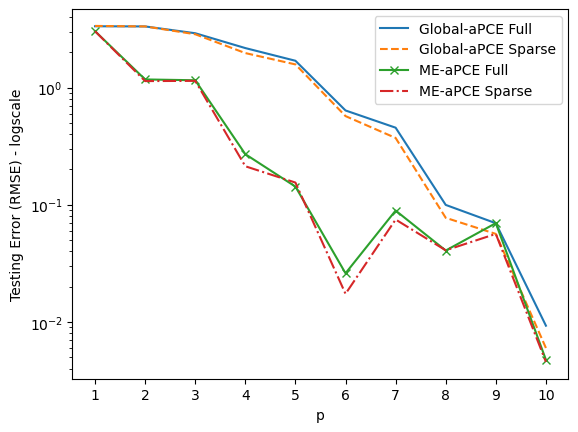

In [44]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_AFVB_Global_aPCE_Full[:10], '-', label = 'Global-aPCE Full')
plt.plot(p, Error_AFVB_Global_aPCE_Sparse[:10], '--', label = 'Global-aPCE Sparse')
plt.plot(p, Error_AFVB_ME_aPCE_Full, '-x', label = 'ME-aPCE Full')
plt.plot(p, Error_AFVB_ME_aPCE_Sparse, '-.', label = 'ME-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### PCE - Local

In [40]:
# Optimized Hyper-Parameters: slurm-8832058
best_params_AFVB_ME_PCE = [OrderedDict([('alpha', 0.99), ('arg1', 0.1), ('arg2', 1e-05), ('arg3', 0.0001), ('arg4', 0.001), ('theta1', 0.08043203003518433), ('theta2', 0.9252659457190413)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.0001), ('arg2', 0.0005684881039365652), ('arg3', 0.1), ('arg4', 0.0008407516303635204), ('theta1', 0.06397533439726394), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.47704925055729386), ('arg1', 0.03971105606488364), ('arg2', 0.0003859536050021338), ('arg3', 0.016993479628607283), ('arg4', 0.001), ('theta1', 0.5183133732825721), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.03402065371791565), ('arg1', 0.013619214652677885), ('arg2', 0.000871673108127642), ('arg3', 0.01598214521107242), ('arg4', 0.000532382062614476), ('theta1', 0.6879815902469141), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.18663501163033464), ('arg1', 0.015025258400153433), ('arg2', 0.0008751556536341962), ('arg3', 0.03773603302366409), ('arg4', 0.001), ('theta1', 0.10935420152185793), ('theta2', 0.0011325930066576632)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.010872063502441237), ('arg2', 0.001), ('arg3', 0.0001), ('arg4', 1e-05), ('theta1', 0.8169908033144114), ('theta2', 1e-06)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.0001), ('arg2', 0.001), ('arg3', 0.0296975676538757), ('arg4', 0.001), ('theta1', 0.5244720139740752), ('theta2', 0.7609044884317252)]), OrderedDict([('alpha', 0.004371101102211365), ('arg1', 0.062129855994121845), ('arg2', 3.131995811011989e-05), ('arg3', 0.013551002244505277), ('arg4', 1e-05), ('theta1', 0.3718511810568011), ('theta2', 0.99)]), OrderedDict([('alpha', 0.5157136553726823), ('arg1', 0.09862662040293543), ('arg2', 0.0004242533411670947), ('arg3', 0.013895170596246348), ('arg4', 7.428524755438866e-05), ('theta1', 0.971331032867251), ('theta2', 0.18388612817054437)]), OrderedDict([('alpha', 1e-06), ('arg1', 0.1), ('arg2', 0.0004998207990877132), ('arg3', 0.0001), ('arg4', 0.001), ('theta1', 0.99), ('theta2', 0.99)])]

alpha_AFVB_ME_PCE, A0_AFVB_ME_PCE, B0_AFVB_ME_PCE, C0_AFVB_ME_PCE, D0_AFVB_ME_PCE, theta1_AFVB_ME_PCE, theta2_AFVB_ME_PCE = parameter_values_ME(best_params_AFVB_ME_PCE, 10)


In [41]:
p = list(range(1,11))

Error_AFVB_ME_PCE_Full = []
Error_AFVB_ME_PCE_Sparse = []

for i in range(len(p)):

    temp = ME_PCE('PCE_Legendre', 3, p[i], [B_init], tf.ishigami, AFVB_PCE, X_pol, False, theta1_AFVB_ME_PCE[i], theta2_AFVB_ME_PCE[i], alpha_AFVB_ME_PCE[i], 20, None, A0_AFVB_ME_PCE[i], B0_AFVB_ME_PCE[i], C0_AFVB_ME_PCE[i], D0_AFVB_ME_PCE[i])
    temp.fit(X_train, Y_train)
    
    temp2 = ME_PCE('PCE_Legendre', 3, p[i], [B_init], tf.ishigami, AFVB_PCE, X_pol, False, theta1_AFVB_ME_PCE[i], theta2_AFVB_ME_PCE[i], alpha_AFVB_ME_PCE[i], 20, temp.B_split, A0_AFVB_ME_PCE[i], B0_AFVB_ME_PCE[i], C0_AFVB_ME_PCE[i], D0_AFVB_ME_PCE[i])
    temp2.fit(X_train, Y_train)
    
    print(temp.B_split.shape[0])
    
    Error_AFVB_ME_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_AFVB_ME_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))

8
8
8
8
8
4
2
4
1
2


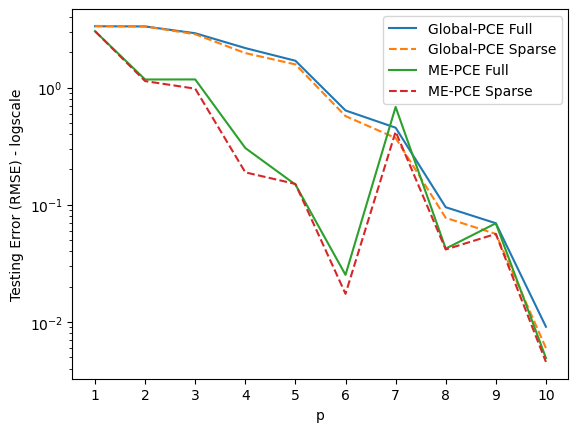

In [43]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_AFVB_Global_PCE_Full[:10], '-', label = 'Global-PCE Full')
plt.plot(p, Error_AFVB_Global_PCE_Sparse[:10], '--', label = 'Global-PCE Sparse')
plt.plot(p, Error_AFVB_ME_PCE_Full, '-', label = 'ME-PCE Full')
plt.plot(p, Error_AFVB_ME_PCE_Sparse, '--', label = 'ME-PCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

In [44]:
p = list(range(1,15))

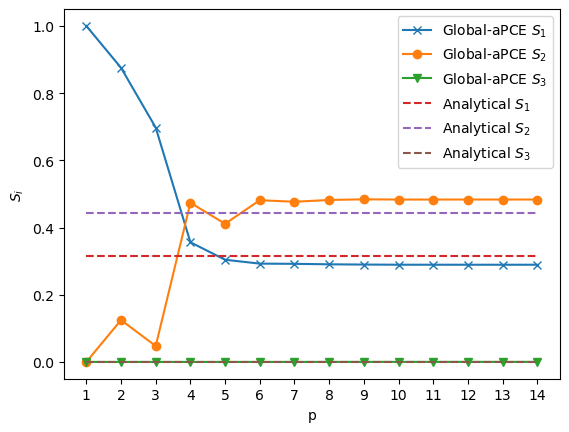

In [45]:
plt.plot(p, np.array(Si_sparse)[:,0], '-x', label = 'Global-aPCE $S_1$')
plt.plot(p, np.array(Si_sparse)[:,1], '-o', label = 'Global-aPCE $S_2$')
plt.plot(p, np.array(Si_sparse)[:,2], '-v', label = 'Global-aPCE $S_3$')
plt.plot(p, [GSA_Ishigami['1st Order'][0]]*14, '--', label = 'Analytical $S_1$')
plt.plot(p, [GSA_Ishigami['1st Order'][1]]*14, '--', label = 'Analytical $S_2$')
plt.plot(p, [GSA_Ishigami['1st Order'][2]]*14, '--', label = 'Analytical $S_3$')
plt.xticks(p)
#plt.yscale("log")
plt.xlabel("p")
plt.ylabel("$S_i$")
plt.legend();

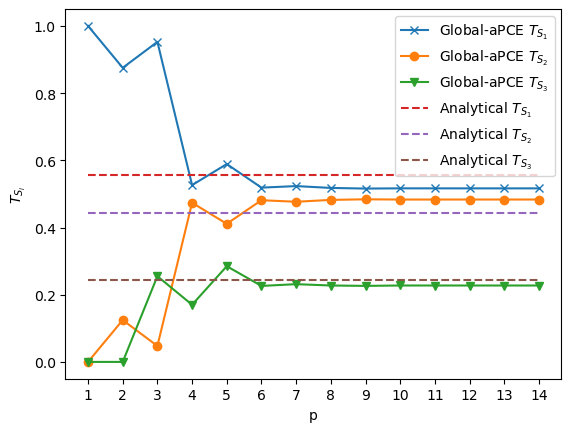

In [46]:
plt.plot(p, np.array(Ti_sparse)[:,0], '-x', label = 'Global-aPCE $T_{S_1}$')
plt.plot(p, np.array(Ti_sparse)[:,1], '-o', label = 'Global-aPCE $T_{S_2}$')
plt.plot(p, np.array(Ti_sparse)[:,2], '-v', label = 'Global-aPCE $T_{S_3}$')
plt.plot(p, [GSA_Ishigami['Total Order'][0]]*14, '--', label = 'Analytical $T_{S_1}$')
plt.plot(p, [GSA_Ishigami['Total Order'][1]]*14, '--', label = 'Analytical $T_{S_2}$')
plt.plot(p, [GSA_Ishigami['Total Order'][2]]*14, '--', label = 'Analytical $T_{S_3}$')
plt.xticks(p)
#plt.yscale("log")
plt.xlabel("p")
plt.ylabel("$T_{S_i}$")
plt.legend();

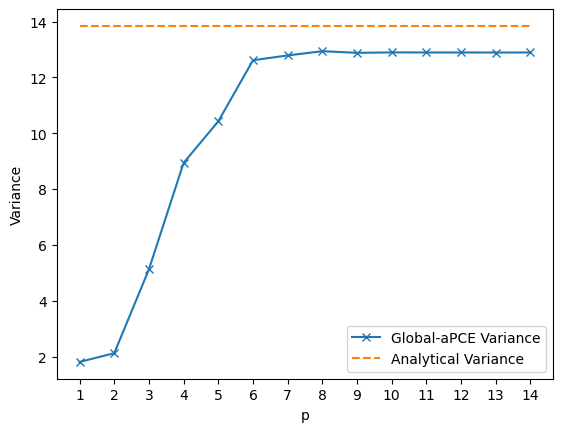

In [47]:
plt.plot(p, np.array(V_sparse), '-x', label = 'Global-aPCE Variance')
plt.plot(p, [V_Ishigami]*14, '--', label = 'Analytical Variance')
plt.xticks(p)
#plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Variance")
plt.legend();

In [48]:
X_mc = np.random.uniform(-np.pi, np.pi, size=(N_mc, d))

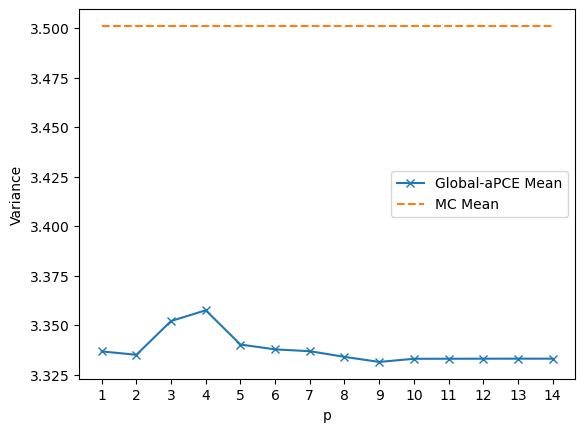

In [49]:
plt.plot(p, np.array(mean_sparse), '-x', label = 'Global-aPCE Mean')
plt.plot(p, [np.mean(tf.ishigami(X_mc))]*14, '--', label = 'MC Mean')
plt.xticks(p)
#plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Variance")
plt.legend();

## VRVM

### aPCE - Global

In [21]:
B_init = [[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]

In [22]:
# Optimized Hyper-Parameters: slurm-8832059
best_params_VRVM_Global_aPCE = [OrderedDict([('omega_a', 1.6169951185034423e-06), ('omega_b', 9.23522519360684e-06), ('tau_a', 7.129559142252922e-06), ('tau_b', 6.636114006456817e-06)]), OrderedDict([('omega_a', 9.589847015224206e-07), ('omega_b', 9.751839598211319e-06), ('tau_a', 2.6665952011003796e-06), ('tau_b', 7.306707358825974e-06)]), OrderedDict([('omega_a', 3.4201034939116886e-06), ('omega_b', 1.8133285679232816e-06), ('tau_a', 5.510975711005696e-06), ('tau_b', 4.843842737308366e-06)]), OrderedDict([('omega_a', 9.097625805933818e-07), ('omega_b', 4.094870383070492e-06), ('tau_a', 6.60795168865669e-06), ('tau_b', 4.1008785062343274e-07)]), OrderedDict([('omega_a', 1.493957637752759e-06), ('omega_b', 4.230138206609065e-06), ('tau_a', 5.4180772018173475e-06), ('tau_b', 2.0894519094376823e-06)]), OrderedDict([('omega_a', 3.827442164910748e-06), ('omega_b', 6.4537822916787726e-06), ('tau_a', 1.051935395172387e-06), ('tau_b', 5.7836076197606896e-06)]), OrderedDict([('omega_a', 2.6994872996697192e-06), ('omega_b', 7.783059139237884e-06), ('tau_a', 9.572216474495706e-06), ('tau_b', 3.4726485868632827e-06)]), OrderedDict([('omega_a', 8.108502478985469e-06), ('omega_b', 2.2472891536269793e-06), ('tau_a', 4.802612627907927e-06), ('tau_b', 6.47537445486171e-06)]), OrderedDict([('omega_a', 7.408073805146332e-06), ('omega_b', 4.173187792417432e-06), ('tau_a', 1.7454372729169775e-06), ('tau_b', 7.709811630142364e-06)]), OrderedDict([('omega_a', 9.433558991384564e-06), ('omega_b', 9.57721031753578e-06), ('tau_a', 7.708194076770662e-06), ('tau_b', 4.865494269139783e-06)]), OrderedDict([('omega_a', 8.613340122878113e-06), ('omega_b', 5.338737224896898e-06), ('tau_a', 2.7441045620486603e-06), ('tau_b', 1.464254642676691e-06)]), OrderedDict([('omega_a', 1.4307818483476144e-07), ('omega_b', 2.761144683348277e-06), ('tau_a', 8.975945708608597e-06), ('tau_b', 5.768589378334029e-06)]), OrderedDict([('omega_a', 4.7393585638541044e-06), ('omega_b', 3.688153080302441e-06), ('tau_a', 8.063448581644942e-06), ('tau_b', 2.278565125124239e-06)]), OrderedDict([('omega_a', 9.940792228892468e-06), ('omega_b', 8.343389515800092e-06), ('tau_a', 6.317486672355491e-06), ('tau_b', 3.515511561637985e-06)])]

omega_a_VRVM_Global_aPCE, omega_b_VRVM_Global_aPCE, tau_a_VRVM_Global_aPCE, tau_b_VRVM_Global_aPCE = parameter_values(best_params_VRVM_Global_aPCE, 14)

In [23]:
p = list(range(1,15))

sa = sobol_GSA(d, tf.ishigami)

Error_VRVM_Global_aPCE_Full = []
Error_VRVM_Global_aPCE_Sparse = []

for i in range(len(p)):
    
    mod = aPCE(X_pol, p[i]) 
    P = mod.Create_Orthonormal_Polynomials(p[i], np.array(B_init))
    
    Ishigami_VRVM_Global_aPCE_model = VRVM_PCE('aPCE', d = 3, p = p[i], domain = None, aPCE_model = mod, P = P, omega_a = omega_a_VRVM_Global_aPCE[i], omega_b = omega_b_VRVM_Global_aPCE[i], tau_a = tau_a_VRVM_Global_aPCE[i], tau_b = tau_b_VRVM_Global_aPCE[i])
    Ishigami_VRVM_Global_aPCE_model.fit(X_train, Y_train)
    
    print('n* =', Ishigami_VRVM_Global_aPCE_model.n_star, 'n =', Ishigami_VRVM_Global_aPCE_model.n)
    
    #print(sa.sobol_PCE(p[i], Ishigami_VRVM_Global_aPCE_model.a_hat, Ishigami_VRVM_Global_aPCE_model.active_cols))
    #print(Ishigami_VRVM_Global_aPCE_model.a_full[0])  
    
    Error_VRVM_Global_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, Ishigami_VRVM_Global_aPCE_model.predict(X_test, sparse = False))))
    Error_VRVM_Global_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, Ishigami_VRVM_Global_aPCE_model.predict(X_test, sparse = True))))
    

n* = 2 n = 4
n* = 3 n = 10
n* = 5 n = 20
n* = 7 n = 35
n* = 10 n = 56
n* = 14 n = 84
n* = 14 n = 120
n* = 18 n = 165
n* = 18 n = 220
n* = 29 n = 286
n* = 41 n = 364
n* = 21 n = 455
n* = 21 n = 560
n* = 19 n = 680


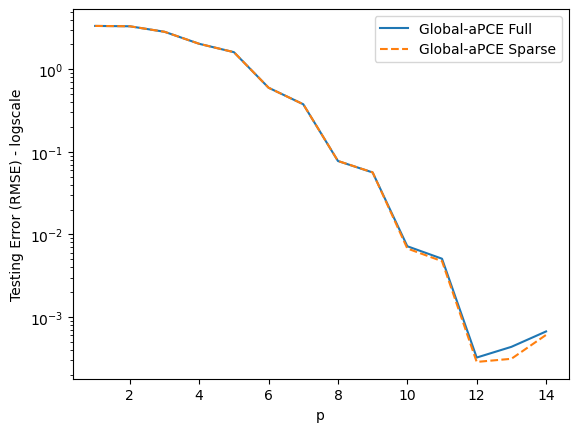

In [24]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
#plt.plot(p, Error_AFVB_Global_aPCE_Full, '-', label = 'AFVB-Global-aPCE Full')
#plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '-.', label = 'AFVB-Global-aPCE Sparse')
plt.plot(p, Error_VRVM_Global_aPCE_Full, '-', label = 'Global-aPCE Full')
plt.plot(p, Error_VRVM_Global_aPCE_Sparse, '--', label = 'Global-aPCE Sparse')
#plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### PCE - Global

In [16]:
# Optimized Hyper-Parameters: slurm-8832060
best_params_VRVM_Global_PCE = [OrderedDict([('omega_a', 1.5331650696884767e-05), ('omega_b', 9.227577445542909e-05), ('tau_a', 7.100854733675451e-05), ('tau_b', 6.602475146521386e-05)]), OrderedDict([('omega_a', 8.685745485376447e-06), ('omega_b', 9.749357994193433e-05), ('tau_a', 2.593261153111384e-05), ('tau_b', 7.279774432414233e-05)]), OrderedDict([('omega_a', 3.354304528850806e-05), ('omega_b', 1.7314618536025147e-05), ('tau_a', 5.466085468115754e-05), ('tau_b', 4.792281164681451e-05)]), OrderedDict([('omega_a', 8.188602063993157e-06), ('omega_b', 4.035819086901198e-05), ('tau_a', 6.574031205543258e-05), ('tau_b', 3.141887291296671e-06)]), OrderedDict([('omega_a', 1.4088972141302867e-05), ('omega_b', 4.1724395886751565e-05), ('tau_a', 5.3722579738355214e-05), ('tau_b', 2.01034642853206e-05)]), OrderedDict([('omega_a', 3.7657165865598554e-05), ('omega_b', 6.418320114595561e-05), ('tau_a', 9.624547491241109e-06), ('tau_b', 5.7414436959582974e-05)]), OrderedDict([('omega_a', 2.626482172666417e-05), ('omega_b', 7.760889730630263e-05), ('tau_a', 9.567938639240661e-05), ('tau_b', 3.407375072731916e-05)]), OrderedDict([('omega_a', 8.089587503775322e-05), ('omega_b', 2.1697620451632497e-05), ('tau_a', 4.750638754187007e-05), ('tau_b', 6.440128199410328e-05)]), OrderedDict([('omega_a', 7.382154543197795e-05), ('omega_b', 4.114919670341607e-05), ('tau_a', 1.6628916456461474e-05), ('tau_b', 7.686909746443789e-05)]), OrderedDict([('omega_a', 9.427894581298408e-05), ('omega_b', 9.572982420711138e-05), ('tau_a', 7.685276017538369e-05), ('tau_b', 4.814149211831182e-05)]), OrderedDict([('omega_a', 8.599473524106895e-05), ('omega_b', 5.292124597145868e-05), ('tau_a', 2.6715456076691473e-05), ('tau_b', 1.3788971891034581e-05)]), OrderedDict([('omega_a', 4.4508966683109065e-07), ('omega_b', 2.6887561301817605e-05), ('tau_a', 8.965705165694681e-05), ('tau_b', 5.7262752721173696e-05)]), OrderedDict([('omega_a', 4.686752149492646e-05), ('omega_b', 3.625034611105466e-05), ('tau_a', 8.044083067461392e-05), ('tau_b', 2.201350776375482e-05)]), OrderedDict([('omega_a', 9.940200151181392e-05), ('omega_b', 8.326823410958093e-05), ('tau_a', 6.280661539079046e-05), ('tau_b', 3.450666677254366e-05)])]
omega_a_VRVM_Global_PCE, omega_b_VRVM_Global_PCE, tau_a_VRVM_Global_PCE, tau_b_VRVM_Global_PCE = parameter_values(best_params_VRVM_Global_PCE, 14)


In [18]:
p = list(range(1,15))

Error_VRVM_Global_PCE_Full = []
Error_VRVM_Global_PCE_Sparse = []

for i in range(len(p)):
    
    Ishigami_VRVM_Global_PCE_model = VRVM_PCE('PCE_Legendre', d = 3, p = p[i], domain = np.array(B_init), aPCE_model = None, P = None, omega_a = omega_a_VRVM_Global_PCE[i], omega_b = omega_b_VRVM_Global_PCE[i], tau_a = tau_a_VRVM_Global_PCE[i], tau_b = tau_b_VRVM_Global_PCE[i])
    Ishigami_VRVM_Global_PCE_model.fit(X_train, Y_train)
    
    print('n* =', Ishigami_VRVM_Global_PCE_model.n_star, 'n =', Ishigami_VRVM_Global_PCE_model.n)
    
    #print(sa.sobol_PCE(p[i], Ishigami_VRVM_Global_PCE_model.a_hat, Ishigami_VRVM_Global_PCE_model.active_cols))
    #print(Ishigami_VRVM_Global_PCE_model.a_hat[0]) 
    
    Error_VRVM_Global_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, Ishigami_VRVM_Global_PCE_model.predict(X_test, sparse = False))))
    Error_VRVM_Global_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, Ishigami_VRVM_Global_PCE_model.predict(X_test, sparse = True))))
    

n* = 2 n = 4
n* = 3 n = 10
n* = 5 n = 20
n* = 7 n = 35
n* = 10 n = 56
n* = 14 n = 84
n* = 15 n = 120
n* = 21 n = 165
n* = 23 n = 220
n* = 24 n = 286
n* = 19 n = 364
n* = 19 n = 455
n* = 19 n = 560
n* = 19 n = 680


In [24]:
GSA_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.345888,7.719588,0.313905,0.557589
1,6.125000,6.125000,0.442411,0.442411
2,0.000000,3.373700,0.000000,0.243684


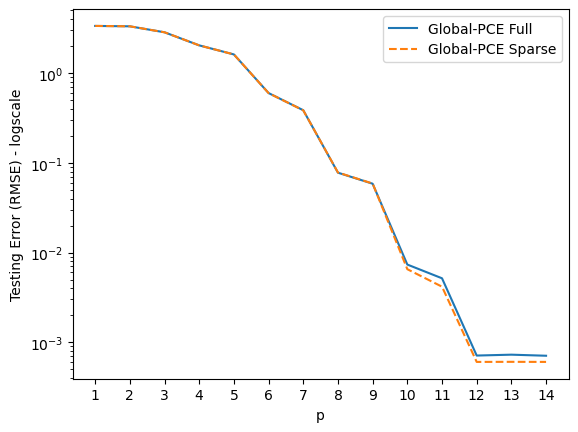

In [19]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
#plt.plot(p, Error_AFVB_Global_aPCE_Full, '-s', label = 'Global-aPCE Full')
#plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '-s', label = 'Global-aPCE Sparse')
plt.plot(p, Error_VRVM_Global_PCE_Full, '-', label = 'Global-PCE Full')
plt.plot(p, Error_VRVM_Global_PCE_Sparse, '--', label = 'Global-PCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### aPCE - Local

In [20]:
# Optimized Hyper-Parameters: slurm-8832064
best_params_VRVM_ME_aPCE = [OrderedDict([('alpha', 0.5632993961653334), ('arg1', 2.4710286258524645e-05), ('arg2', 8.287538093870098e-05), ('arg3', 7.167616444254344e-05), ('arg4', 1.656790852681137e-05), ('theta1', 0.7725763934762547), ('theta2', 0.1778266388284838)]), OrderedDict([('alpha', 0.035936313473569695), ('arg1', 1e-08), ('arg2', 2.655146354315031e-05), ('arg3', 1e-08), ('arg4', 0.0001), ('theta1', 0.8459693119306863), ('theta2', 0.04928222881285478)]), OrderedDict([('alpha', 1e-06), ('arg1', 6.842778231943695e-06), ('arg2', 7.781776387101613e-05), ('arg3', 2.022494965579457e-05), ('arg4', 6.911547620607852e-05), ('theta1', 0.8908168405773248), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.1565896386478665), ('arg1', 3.6691669112488755e-05), ('arg2', 3.666862211983487e-05), ('arg3', 5.722070880687537e-05), ('arg4', 6.831456628904052e-05), ('theta1', 0.42683953588204293), ('theta2', 0.08783128546219385)]), OrderedDict([('alpha', 0.5984529977308706), ('arg1', 3.6297762726049333e-05), ('arg2', 1.8814666390312428e-05), ('arg3', 7.202381543212009e-05), ('arg4', 2.303265940477397e-05), ('theta1', 0.9721868447583709), ('theta2', 0.7238330823343102)]), OrderedDict([('alpha', 0.17802959776874175), ('arg1', 5.855314779894947e-05), ('arg2', 2.496342435264212e-05), ('arg3', 4.89810809593937e-05), ('arg4', 8.666174664280051e-05), ('theta1', 0.5217987441992685), ('theta2', 0.7547399615484185)]), OrderedDict([('alpha', 0.5918806969293593), ('arg1', 1e-08), ('arg2', 3.3242655831437976e-05), ('arg3', 2.060187672010659e-05), ('arg4', 1e-08), ('theta1', 0.40442717574986653), ('theta2', 0.99)]), OrderedDict([('alpha', 0.25310562992270563), ('arg1', 3.915041494086702e-06), ('arg2', 4.317704582651805e-06), ('arg3', 8.324783135039999e-05), ('arg4', 3.532265925491864e-05), ('theta1', 0.19715023375961194), ('theta2', 0.5468975944050383)]), OrderedDict([('alpha', 1e-06), ('arg1', 1e-08), ('arg2', 1e-08), ('arg3', 0.0001), ('arg4', 1e-08), ('theta1', 0.99), ('theta2', 0.99)]), OrderedDict([('alpha', 0.6482056324001543), ('arg1', 1e-08), ('arg2', 8.274670219152423e-05), ('arg3', 4.919889671614638e-05), ('arg4', 0.0001), ('theta1', 0.4867735801550905), ('theta2', 0.49294063313494696)])]

alpha_VRVM_ME_aPCE, omega_a_VRVM_ME_aPCE, omega_b_VRVM_ME_aPCE, tau_a_VRVM_ME_aPCE, tau_b_VRVM_ME_aPCE, theta1_VRVM_ME_aPCE, theta2_VRVM_ME_aPCE = parameter_values_ME(best_params_VRVM_ME_aPCE, 10)


In [21]:
p = list(range(1,11))

Error_VRVM_ME_aPCE_Full = []
Error_VRVM_ME_aPCE_Sparse = []

for i in range(len(p)):

    temp = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, VRVM_PCE, X_pol, False, theta1_VRVM_ME_aPCE[i], theta2_VRVM_ME_aPCE[i], alpha_VRVM_ME_aPCE[i], 10, None, omega_a_VRVM_ME_aPCE[i], omega_b_VRVM_ME_aPCE[i], tau_a_VRVM_ME_aPCE[i], tau_b_VRVM_ME_aPCE[i])
    temp.fit(X_train, Y_train)
    
    temp2 = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, VRVM_PCE, X_pol, False, theta1_VRVM_ME_aPCE[i], theta2_VRVM_ME_aPCE[i], alpha_VRVM_ME_aPCE[i], 10, temp.B_split, omega_a_VRVM_ME_aPCE[i], omega_b_VRVM_ME_aPCE[i], tau_a_VRVM_ME_aPCE[i], tau_b_VRVM_ME_aPCE[i])
    temp2.fit(X_train, Y_train)
    
    print(temp.B_split.shape[0])
    
    Error_VRVM_ME_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_VRVM_ME_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))


2
2
8
2
1
2
2
2
2
1


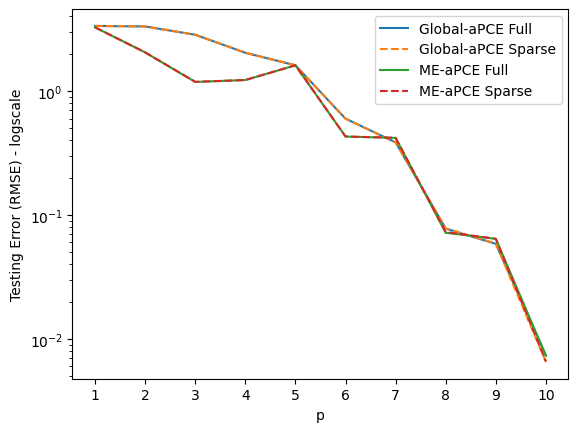

In [22]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_VRVM_Global_aPCE_Full[:10], '-', label = 'Global-aPCE Full')
plt.plot(p, Error_VRVM_Global_aPCE_Sparse[:10], '--', label = 'Global-aPCE Sparse')
plt.plot(p, Error_VRVM_ME_aPCE_Full, '-', label = 'ME-aPCE Full')
plt.plot(p, Error_VRVM_ME_aPCE_Sparse, '--', label = 'ME-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

### PCE - local

In [23]:
# Optimized Hyper-Parameters: slurm-8832062
best_params_VRVM_ME_PCE = [OrderedDict([('alpha', 0.5632993961653334), ('arg1', 2.4710286258524645e-05), ('arg2', 8.287538093870098e-05), ('arg3', 7.167616444254344e-05), ('arg4', 1.656790852681137e-05), ('theta1', 0.7725763934762547), ('theta2', 0.1778266388284838)]), OrderedDict([('alpha', 0.5289437986914474), ('arg1', 1e-08), ('arg2', 0.0001), ('arg3', 1e-08), ('arg4', 0.0001), ('theta1', 0.99), ('theta2', 0.6854114075800615)]), OrderedDict([('alpha', 0.99), ('arg1', 1e-08), ('arg2', 1.4867705384443327e-05), ('arg3', 1e-08), ('arg4', 0.0001), ('theta1', 0.4309897861424597), ('theta2', 1e-06)]), OrderedDict([('alpha', 0.13149842388851093), ('arg1', 2.858617221177075e-05), ('arg2', 1.9819140489252086e-05), ('arg3', 9.769346103224226e-05), ('arg4', 8.963112432413811e-05), ('theta1', 0.41901501810660696), ('theta2', 0.43084482438144067)]), OrderedDict([('alpha', 1e-06), ('arg1', 7.289738264009899e-05), ('arg2', 0.0001), ('arg3', 0.0001), ('arg4', 1e-08), ('theta1', 0.8579155099950342), ('theta2', 0.839801088286929)]), OrderedDict([('alpha', 1e-06), ('arg1', 1e-08), ('arg2', 2.6629814791561958e-05), ('arg3', 3.950895687160405e-05), ('arg4', 0.0001), ('theta1', 0.9659821744393433), ('theta2', 0.99)]), OrderedDict([('alpha', 0.23536533983669095), ('arg1', 1e-08), ('arg2', 4.3401574409528914e-05), ('arg3', 5.732709462579834e-07), ('arg4', 2.0164777873082108e-05), ('theta1', 0.583055632347364), ('theta2', 0.7640704380072287)]), OrderedDict([('alpha', 1e-06), ('arg1', 8.705489426977751e-07), ('arg2', 1.6797466983276716e-05), ('arg3', 1e-08), ('arg4', 5.5616270847537436e-05), ('theta1', 0.5569867953480909), ('theta2', 0.4303116952740246)]), OrderedDict([('alpha', 0.8155245997271127), ('arg1', 5.282755343067723e-05), ('arg2', 4.5899236653516115e-06), ('arg3', 1.4351811332222484e-06), ('arg4', 3.585608446971019e-05), ('theta1', 0.19913907035441367), ('theta2', 0.7850467522022636)]), OrderedDict([('alpha', 0.336504742387436), ('arg1', 9.333871305245319e-05), ('arg2', 8.546855404608885e-05), ('arg3', 5.066332825398189e-05), ('arg4', 7.209845076479927e-05), ('theta1', 0.4720998283860188), ('theta2', 0.8783985766775352)])]

alpha_VRVM_ME_PCE, omega_a_VRVM_ME_PCE, omega_b_VRVM_ME_PCE, tau_a_VRVM_ME_PCE, tau_b_VRVM_ME_PCE, theta1_VRVM_ME_PCE, theta2_VRVM_ME_PCE = parameter_values_ME(best_params_VRVM_ME_PCE, 10)


In [29]:
p = list(range(1,11))

Error_VRVM_ME_PCE_Full = []
Error_VRVM_ME_PCE_Sparse = []

for i in range(len(p)):

    temp = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, VRVM_PCE, X_pol, False, theta1_VRVM_ME_PCE[i], theta2_VRVM_ME_PCE[i], alpha_VRVM_ME_PCE[i], 25, None, omega_a_VRVM_ME_PCE[i], omega_b_VRVM_ME_PCE[i], tau_a_VRVM_ME_PCE[i], tau_b_VRVM_ME_PCE[i])
    temp.fit(X_train, Y_train)
    
    temp2 = ME_PCE('aPCE', 3, p[i], [B_init], tf.ishigami, VRVM_PCE, X_pol, False, theta1_VRVM_ME_PCE[i], theta2_VRVM_ME_PCE[i], alpha_VRVM_ME_PCE[i], 25, temp.B_split, omega_a_VRVM_ME_PCE[i], omega_b_VRVM_ME_PCE[i], tau_a_VRVM_ME_PCE[i], tau_b_VRVM_ME_PCE[i])
    temp2.fit(X_train, Y_train)
    
    print(temp.B_split.shape[0])
    
    Error_VRVM_ME_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_VRVM_ME_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))


2
2
8
2
2
2
2
2
1
1


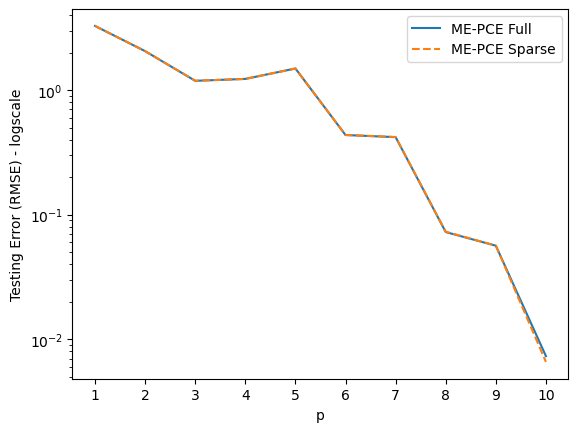

In [30]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_VRVM_ME_PCE_Full, '-', label = 'ME-PCE Full')
plt.plot(p, Error_VRVM_ME_PCE_Sparse, '--', label = 'ME-PCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

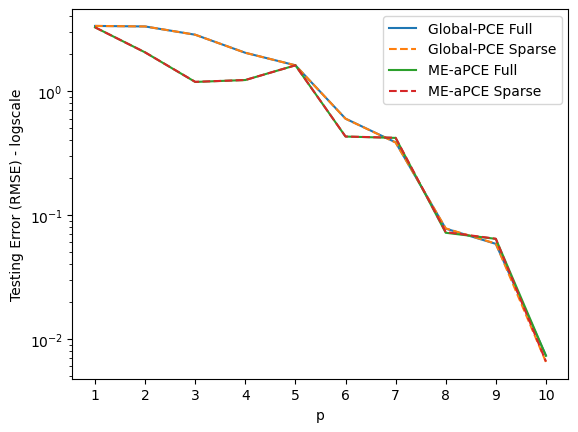

In [28]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
plt.plot(p, Error_VRVM_Global_aPCE_Full[:10], '-', label = 'Global-PCE Full')
plt.plot(p, Error_VRVM_Global_aPCE_Sparse[:10], '--', label = 'Global-PCE Sparse')
plt.plot(p, Error_VRVM_ME_aPCE_Full, '-', label = 'ME-aPCE Full')
plt.plot(p, Error_VRVM_ME_aPCE_Sparse, '--', label = 'ME-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

# Example 2: Cantilever Tube Structure

Note: Need to modify ME_PCE algorithm to allow values from non-uniform distribution and change it so that the aPCE algorithms are entering ifnormation from data not from knowledge of pdf!!!!!!!

In [208]:
N_train = 320 # Sample size
N_test = 80
N_pol = 1000000
N_mc = 1000000 #10^6 samples

d = 7

In [209]:
np.random.seed(2357)

X_train = tf.cantilever_data(N_train)
X_test = tf.cantilever_data(N_test)
X_pol = tf.cantilever_data(N_pol)

Y_train = tf.cantilever(X_train)
Y_test = tf.cantilever(X_test)

(array([ 4., 15., 23., 43., 77., 65., 53., 25., 12.,  3.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.44249065e-15,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

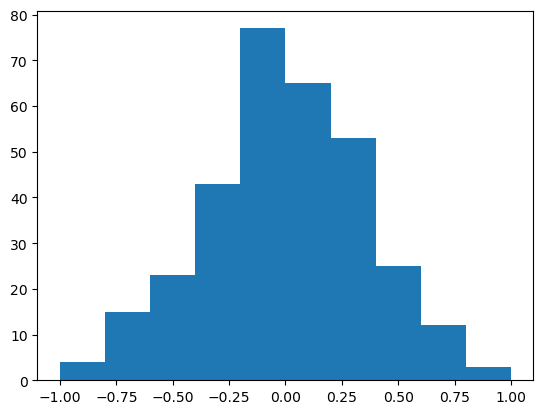

In [80]:
plt.hist((X_train[:,0]-(X_train[:,0].max()+X_train[:,0].min())/2)*2/(X_train[:,0].max()-X_train[:,0].min()))

In [77]:
X_test.min()

0.004756593443053103

In [76]:
X_train.min()

0.004685082451545612

In [95]:
from sklearn.linear_model import LinearRegression
import math
from itertools import product
from scipy.special import legendre
from scipy.special import hermitenorm
from sklearn.metrics import mean_squared_error
import sys
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aPCE
import AFVB_PCE
import VRVM_PCE
import ME_PCE
from numpy import polynomial as pol
from sympy import symbols, lambdify, diff
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from collections import OrderedDict

In [2]:
import skopt
from skopt import BayesSearchCV

In [3]:
import scipy.integrate as integrate
import scipy.special as special
import time

In [6]:
## Directory where I want the plots saved
wd = '/Users/chave/Desktop/ThesisFiles/SparseBayesianLearning'

# Basis Functions

In [15]:
def multivariate_pce_index(d, max_deg):
    """
    Generate all the d-dimensional polynomial indices with the 
    constraint that the sum of the indexes is <= max_deg

    input:
    d: int, number of random variables
    max_deg: int, the max degree allowed

    return: 
    2d array with shape[1] equal to d, the multivariate indices
    """
    maxRange = max_deg*np.ones(d, dtype = 'int')
    index = np.array([i for i in product(*(range(i + 1) for i in maxRange)) if sum(i) <= max_deg])

    return index

In [6]:
def basis(Z, p, PCE_method, aPCE_model = None, P = None, domain = None):
    """
    PCE_method: aPCE or PCE_Legendre
    aPCE_model: mod or None
    P: P or P_Steiltjs or None
    domain: Looks like np.array([[a,b], [a,b], [a,b], ...])
    """
    
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    Phi = np.ones((N, n))
    idx = multivariate_pce_index(d, p)
    
    if (PCE_method == 'aPCE'):
        for i in range(n):
            for j in range(d):
                Phi[:,i] *=  aPCE_model.Pol_eval(P[j][idx[i][j]], Z[:,j])
                
    elif (PCE_method == 'PCE_Legendre'):
        a = domain[:,0]
        b = domain[:,1]
        for i in range(n):
            for j in range(d):
                Phi[:,i] *=  math.sqrt((2*idx[i][j]+1)/1)*legendre(idx[i][j])((a[j]+b[j]-2*Z[:,j])/(a[j]-b[j]))
    else: 
        print('Proper PCE_method not given')
            
    return Phi

# Results Function

In [7]:
def GSA(a, idx, active_cols):
    
    V = np.sum(a[1:]**2)
    V_Partial = []
    V_Total = []
    S_Partial = []
    S_Total = []
    
    l = [0,1,2]
    
    for k in range(d):
        l = list(range(d))
        l.remove(k)
        
        temp = np.full(idx[active_cols].shape[0], True, dtype = bool)
        
        for i in range(idx[active_cols].shape[0]):
            temp[i] = (idx[active_cols][i][k] != 0) & (sum(idx[active_cols][i][l]) == 0)
            
        V_Partial.append(np.sum(a[temp]**2))
        S_Partial.append(np.sum(a[temp]**2)/V)

        for i in range(idx[active_cols].shape[0]):
            temp[i] = idx[active_cols][i][k] != 0

        V_Total.append(np.sum(a[temp]**2))
        S_Total.append(np.sum(a[temp]**2)/V)

        GSA_df = pd.DataFrame({
            #"variable" : list(range(1,d+1)),
            "Partial Variance" : V_Partial,
            "Total Variance" : V_Total,
            "1st Order" : S_Partial,
            "Total Order" : S_Total
        })
    
    
    return V, GSA_df

In [8]:
def Results(X_train, X_test, Y_train, Y_test, model_init, idx):
    
    N_train = X_train.shape[0]
    ## Fitting Model
    t0 = time.time()
    model = model_init.fit(X_train, Y_train.reshape(N_train))
    t_final = time.time() - t0
    
    ## RMSE
    RMSE_full_Train = np.sqrt(mean_squared_error(Y_train, model.predict(X_train, sparse = False)))
    RMSE_sparse_Train = np.sqrt(mean_squared_error(Y_train, model.predict(X_train)))
    
    RMSE_full_Test = np.sqrt(mean_squared_error(Y_test, model.predict(X_test, sparse = False)))
    RMSE_sparse_Test = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
    
    data_Error = [[N_pol, model.n_star, RMSE_full_Train, RMSE_sparse_Train, RMSE_full_Test, RMSE_sparse_Test, t_final/60]]
    df_Error = pd.DataFrame(data_Error, columns=['N_pol', 'n_star', 'RMSE_Train_full', 'RMSE_Train_sparse', 'RMSE_Test_full', 'RMSE_Test_sparse', 'time (min)'])

    ## GSA
    V, df_GSA = GSA(model.a_hat, idx, model.active_cols)

    
    return df_Error, df_GSA, model, V

In [9]:
def plot_Error(Error1, Error2, Error3, Error4, scale, scale_label, n):
    temp1 = pd.concat([Error1*scale, Error2*scale], 
                  ignore_index = True, sort = False)[['RMSE_Test_full', 'RMSE_Test_sparse']]
    temp1.index = ['aPCE', 'PCE']

    temp1.columns = (['Full Expansion', 'Sparse Expansion'])
    
    temp2 = pd.concat([Error3*scale, Error4*scale], 
                  ignore_index = True, sort = False)[['RMSE_Test_full', 'RMSE_Test_sparse']]
    temp2.index = ['aPCE', 'PCE']

    temp2.columns = (['Full Expansion', 'Sparse Expansion'])
    
    max_val = np.max(np.array([np.max(temp1.values), np.max(temp2.values)]))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout(pad=5.0)
    ax1 = temp1.plot.bar(ax=axes[0], rot = 0, color = ['green', 'red'], fontsize = 15)
    ax1.set_ylim(0, max_val+2)
    ax1.set_title("AFVB", fontsize = 20)
    ax1.text(-0.5,max_val+1.6, scale_label)
    ax1.text(-0.48,max_val+1, 'n =' + str(n), 
             fontsize = 13, color = 'g', weight = 'bold')
    ax1.text(0,np.max(temp1.values)+0.1, 'n* =' + str(np.array(Error1['n_star'])[0]), 
             fontsize = 13, color = 'r', weight = 'bold')
    ax1.text(1,np.max(temp1.values)+0.1, 'n* =' + str(np.array(Error2['n_star'])[0]), 
             fontsize = 13, color = 'r', weight = 'bold')
    ax1.set_ylabel('Testing Error (RMSE)', fontsize = 15);
    
    ax2 = temp2.plot.bar(ax=axes[1], rot = 0, color = ['green', 'red'], fontsize = 15)
    ax2.set_ylim(0, max_val+2)
    ax2.set_title("VRVM", fontsize = 20)
    ax2.text(-0.5,max_val+1.6, scale_label)
    ax2.text(-0.48,max_val+1, 'n =' + str(n), 
             fontsize = 13, color = 'g', weight = 'bold')
    ax2.text(0,np.max(temp2.values)+0.1, 'n* =' + str(np.array(Error3['n_star'])[0]), 
             fontsize = 13, color = 'r', weight = 'bold')
    ax2.text(1,np.max(temp2.values)+0.1, 'n* =' + str(np.array(Error4['n_star'])[0]), 
             fontsize = 13, color = 'r', weight = 'bold')
    ax2.set_ylabel('Testing Error (RMSE)', fontsize = 15);

In [10]:
def plot_Sobol_Indices(GSA1, GSA2, GSA3, GSA4 = None, l = 1, ylimit = 100, fig_size = (6.4, 4.8), table_size = 1):

    
    if GSA4 is None:
        col = ['green', 'blue', 'orange']
        temp1 = pd.concat([GSA1[['1st Order']], GSA2[['1st Order']], GSA3[['1st Order']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp2 = pd.concat([GSA1[['Total Order']], GSA2[['Total Order']], GSA3[['Total Order']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp = pd.concat([temp1, temp2], ignore_index = True, sort = False)
        temp.columns = (['MCS', 'AFVB-aPCE', 'VRVM-aPCE'])
        temp.index = (l)
    else:
        col = ['red', 'green', 'blue', 'orange']
        temp1 = pd.concat([GSA1[['1st Order']], GSA2[['1st Order']], GSA3[['1st Order']], GSA4[['1st Order']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp2 = pd.concat([GSA1[['Total Order']], GSA2[['Total Order']], GSA3[['Total Order']], GSA4[['Total Order']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp = pd.concat([temp1, temp2], ignore_index = True, sort = False)
        temp.columns = (['Analytical', 'MCS', 'AFVB-aPCE', 'VRVM-aPCE'])
        temp.index = (l)
        
    
    ax1 = temp.plot.bar(rot = 0, color = col, fontsize = 15, figsize=fig_size)
    ax1.set_ylim(0, ylimit)
    ax1.get_legend().remove()

    #defining the attributes
    col_labels = l
    row_labels = temp.columns
    table_vals = temp.values
    row_colors = col
    #plotting
    my_table = plt.table(cellText = np.round(table_vals.T, 3),
                         colWidths = [0.12]*2*temp.shape[0], 
                         rowLabels = row_labels,
                         colLabels = col_labels,
                         rowColours = row_colors,
                         loc = 'upper right',
                         rowLoc = 'center')
    my_table.scale(table_size, 1.2)

In [11]:
def plot_Variances(GSA1, GSA2, GSA3, V1, V2, V3, V4 = None, GSA4 = None, 
                   l = 1, ylimit = 100, fig_size = (6.4, 4.8), table_size = 1):

    if GSA4 is None:
        V_all = pd.DataFrame([V1, V2, V3])
        col = ['green', 'blue', 'orange']
        temp1 = pd.concat([GSA1[['Partial Variance']], GSA2[['Partial Variance']], GSA3[['Partial Variance']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp2 = pd.concat([GSA1[['Total Variance']], GSA2[['Total Variance']], GSA3[['Total Variance']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp = pd.concat([temp1, temp2], ignore_index = True, sort = False)
        temp = pd.concat([V_all.T, temp], ignore_index = True, sort = False)
        temp.columns = (['MCS', 'AFVB-aPCE', 'VRVM-aPCE'])
        temp.index = (l)
    else:
        V_all = pd.DataFrame([V1, V2, V3, V4])
        col = ['red', 'green', 'blue', 'orange']
        temp1 = pd.concat([GSA1[['Partial Variance']], GSA2[['Partial Variance']], GSA3[['Partial Variance']], GSA4[['Partial Variance']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp2 = pd.concat([GSA1[['Total Variance']], GSA2[['Total Variance']], GSA3[['Total Variance']], GSA4[['Total Variance']]], 
                  axis = 1, ignore_index = True, sort = False)
        temp = pd.concat([temp1, temp2], ignore_index = True, sort = False)
        temp = pd.concat([V_all.T, temp], ignore_index = True, sort = False)
        temp.columns = (['Analytical', 'MCS', 'AFVB-aPCE', 'VRVM-aPCE'])
        temp.index = (l)
        
    ax1 = temp.plot.bar(rot = 0, color = col, fontsize = 15, figsize=fig_size)
    ax1.set_ylim(0, ylimit)
    ax1.get_legend().remove()

    #defining the attributes
    col_labels = l
    row_labels = temp.columns
    table_vals = temp.values
    row_colors = col
    #plotting
    my_table = plt.table(cellText = np.round(table_vals.T, 3),
                         colWidths = [0.12]*2*temp.shape[0], 
                         rowLabels = row_labels,
                         colLabels = col_labels,
                         rowColours = row_colors,
                         loc = 'upper right',
                         rowLoc = 'center')
    my_table.scale(table_size, 1.2)

## MC Sobol Indices Function

In [12]:
def create_dataAB(dataA, dataB, variable_index_to_fix):
    dataB_withA = dataB.copy()
    dataB_withA[:, variable_index_to_fix] = dataA[:, variable_index_to_fix]
    return dataB_withA

def sobol_indice_1st_and_total_order(model, variable_index, dataA, dataB):

    dataB_withA = create_dataAB(dataA, dataB, variable_index)

    N = len(dataA)

    y_A = model(dataA)
    y_AB = model(dataB_withA)
    y_B = model(dataB)
    V = np.var(model(dataA))

    num_1st_order = N*np.sum(np.multiply(y_A,y_AB)) - (np.sum(y_A)*np.sum(y_AB))
    num_tot = N*np.sum(np.multiply(y_B,y_AB)) - (np.sum(y_A)**2)
    deno = N*np.sum(y_A**2) - (np.sum(y_A))**2

    return np.round(V*num_1st_order/deno, 4), np.round(V*(1 - (num_tot/deno)), 4), np.round(num_1st_order/deno, 4), np.round((1 - (num_tot/deno)), 4), np.round(V, 4)


In [13]:
def MC_Sobol(fun, dataA, dataB):
    V_partial = []
    V_total = []
    st_order = []
    total = []
    for i in range(d):
        results = sobol_indice_1st_and_total_order(fun, i, dataA, dataB)
        V_partial.append(results[0])
        V_total.append(results[1])
        st_order.append(results[2])
        total.append(results[3])
        V = results[4]

    df_result = pd.DataFrame({
        "Partial Variance" : V_partial,
        "Total Variance" : V_total,
        "1st Order" : st_order,
        "Total Order" : total
        })
    
    return df_result, V

## Variables for AFVB Model

In [14]:
T_ell = 0.001 # T_ell --> threshold value for the VLB (for the error e_ell) in percent
e = 1000

In [15]:
N_train = 320 # Sample size
N_test = 80
N_pol = 1000000
N_mc = 1000000 #10^6 samples

# Example 1: Ishigami Function

In [16]:
d = 3  # d --> number of random variables
#p = 5 # p --> degree of PCE polynomial
#n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [17]:
V_Ishigami = 7**2/8 + 0.1*np.pi**4/5 + 0.1**2*np.pi**8/18 + 1/2
GSA_Ishigami = ([1/2*(1+0.1*np.pi**4/5)**2, 7**2/8, 0],
                [1/2*(1+0.1*np.pi**4/5)**2 + 8*0.1**2*np.pi**8/225, 7**2/8, 8*0.1**2*np.pi**8/225],
                [1/2*(1+0.1*np.pi**4/5)**2/V_Ishigami, 7**2/8/V_Ishigami, 0],
                [(1/2*(1+0.1*np.pi**4/5)**2 + 8*0.1**2*np.pi**8/225)/V_Ishigami, 7**2/8/V_Ishigami, 8*0.1**2*np.pi**8/225/V_Ishigami])
GSA_Ishigami = pd.DataFrame(GSA_Ishigami).T
GSA_Ishigami.columns = ['Partial Variance', 'Total Variance', '1st Order', 'Total Order']

## Data

In [1]:
def Ishigami_Function(dat):
    Z = dat
    return np.c_[np.sin(Z[:,0]) + 7*(np.sin(Z[:,1]))**2 + 0.1*(Z[:,2])**4*np.sin(Z[:,0])]

In [19]:
np.random.seed(2357)

N_train = 320 # Sample size
N_test = 80
N_pol = 1000000
N_mc = 1000000 #10^6 samples

X_train = np.random.uniform(-np.pi, np.pi, size=(N_train, d))
X_test = np.random.uniform(-np.pi, np.pi, size=(N_test, d))
Y_train = Ishigami_Function(X_train)
Y_test = Ishigami_Function(X_test)

X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))

## MC Estimation of GSA

In [3]:
dataA = pd.DataFrame(np.random.uniform(-np.pi, np.pi, size=(N_mc, d))).values
dataB = pd.DataFrame(np.random.uniform(-np.pi, np.pi, size=(N_mc, d))).values

#Sobol_MC_Ishigami, V_MC_Ishigami = MC_Sobol(Ishigami_Function, dataA, dataB)

In [4]:
Ishigami_GSA_MC = sa.sobol_GSA(3, Ishigami_Function)

In [5]:
Ishigami_GSA_MC.sobol_MC(dataA, dataB)

,Partial Variance,Total Variance,1st Order,Total Order
0,4.333810,7.712377,0.313317,0.557575
1,6.105450,6.131410,0.441400,0.443277
2,-0.005944,3.384606,-0.000430,0.244694


In [127]:
np.random.uniform(-np.pi, np.pi, size=(N_mc, d))

array([[ 2.32038817, -2.64248877,  1.51218932],
       [ 1.5558718 ,  0.04015659,  2.7605449 ],
       [ 2.31657192,  1.95453281, -2.71503011],
       ...,
       [ 2.94590645, -0.36669985, -1.31144166],
       [-2.86912093,  0.56128968,  1.65762951],
       [-2.46470329,  2.44406893, -1.16516297]])

In [97]:
Sobol_MC_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.3381,7.7274,0.3133,0.5581
1,6.1097,6.1845,0.4413,0.4467
2,-0.0036,3.3918,-0.0003,0.2450


In [98]:
V_MC_Ishigami

13.845

## Tuning of Hyperparameters
### ME-PCE -  Tunning $\theta_1$, $\theta_2$, and $\alpha$

In [21]:
B_init = [[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]
p =[3, 4, 5, 6, 9, 12]

### AFVB-aPCE

In [22]:
param_space_AFVB = {'arg1': skopt.space.Real(0.00001, 0.1), # A_0
              'arg2': skopt.space.Real(0.00001, 0.1), # B_0
              'arg3': skopt.space.Real(0.00001, 0.1), # C_0
              'arg4': skopt.space.Real(0.00001, 0.1) # D_0
         }

In [23]:
param_space_AFVB = {'arg1': skopt.space.Real(0.00001, 0.1), # A_0
              'arg2': skopt.space.Real(0.00001, 0.1), # B_0
              'arg3': skopt.space.Real(0.00001, 0.1), # C_0
              'arg4': skopt.space.Real(0.00001, 0.1) # D_0
         }
param_space_ME = {'theta1': skopt.space.Real(0.00001, 0.9),
              'theta2': skopt.space.Real(0.00001, 0.9),
              'alpha': skopt.space.Real(0.00001, 0.9),
              'arg1': skopt.space.Real(0.00001, 0.1), # A_0
              'arg2': skopt.space.Real(0.00001, 0.1), # B_0
              'arg3': skopt.space.Real(0.00001, 0.1), # C_0
              'arg4': skopt.space.Real(0.00001, 0.1) # D_0
         }

In [74]:
def parameter_values(param_list, t):
    
    param1 = []
    param2 = []
    param3 = []
    param4 = []


    for j in range(t):
        param1.append(list(param_list[j].values())[0])
        param2.append(list(param_list[j].values())[1])
        param3.append(list(param_list[j].values())[2])
        param4.append(list(param_list[j].values())[3])
        
    return param1, param2, param3, param4

In [75]:
def parameter_values_ME(param_list, t):
    
    param1 = []
    param2 = []
    param3 = []
    param4 = []
    param5 = []
    param6 = []
    param7 = []

    for j in range(t):
        param1.append(list(param_list[j].values())[0])
        param2.append(list(param_list[j].values())[1])
        param3.append(list(param_list[j].values())[2])
        param4.append(list(param_list[j].values())[3])
        param5.append(list(param_list[j].values())[4])
        param6.append(list(param_list[j].values())[5])
        param7.append(list(param_list[j].values())[6])
        
    return param1, param2, param3, param4, param5, param6, param7

### Optimizing hyperparameters for the Local ME-aPCE

In [64]:
best_params_AFVB_ME_aPCE = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    t0 = time.time()
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], False, size_restriction = 25, B_split = None),
                                search_spaces = param_space_ME,
                                n_iter = 30,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params_AFVB_ME_aPCE.append(optimizer.best_params_)

103.53456070423127 min
73.30838203430176 min
149.1512567838033 min
119.71496556997299 min


/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)

220.16522312959034 min


/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:144: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)

755.6826229691505 min


In [70]:
best_params_AFVB_ME_aPCE

[OrderedDict([('alpha', 0.055667098847903),
              ('arg1', 0.08289707884368987),
              ('arg2', 0.08858728174559408),
              ('arg3', 0.1),
              ('arg4', 0.1),
              ('theta1', 1e-05),
              ('theta2', 1e-05)]),
 OrderedDict([('alpha', 0.8936437375401889),
              ('arg1', 0.03910499037216718),
              ('arg2', 0.024696671382808646),
              ('arg3', 1e-05),
              ('arg4', 0.047981024740018995),
              ('theta1', 0.13010921420875093),
              ('theta2', 0.3999378068670456)]),
 OrderedDict([('alpha', 0.17387606185921553),
              ('arg1', 0.09787864093175196),
              ('arg2', 0.085825873258539),
              ('arg3', 0.09077262764084736),
              ('arg4', 0.0901677983021646),
              ('theta1', 0.22764137820923638),
              ('theta2', 1e-05)]),
 OrderedDict([('alpha', 0.9),
              ('arg1', 1e-05),
              ('arg2', 0.09385359754333601),
              ('arg3'

In [76]:
alpha_AFVB_ME_aPCE,A0_AFVB_ME_aPCE,B0_AFVB_ME_aPCE,C0_AFVB_ME_aPCE,D0_AFVB_ME_aPCE,theta1_AFVB_ME_aPCE,theta2_AFVB_ME_aPCE = parameter_values_ME(best_params_AFVB_ME_aPCE, 6)

In [85]:
Error_AFVB_ME_aPCE_Full = []
Error_AFVB_ME_aPCE_Sparse = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    temp = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], False, theta1_AFVB_ME_aPCE[i], theta2_AFVB_ME_aPCE[i], alpha_AFVB_ME_aPCE[i], 25, None, A0_AFVB_ME_aPCE[i], B0_AFVB_ME_aPCE[i], C0_AFVB_ME_aPCE[i], D0_AFVB_ME_aPCE[i])
    temp.fit(X_train, Y_train)
    temp2 = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], True, theta1_AFVB_ME_aPCE[i], theta2_AFVB_ME_aPCE[i], alpha_AFVB_ME_aPCE[i], 25, temp.B_split, A0_AFVB_ME_aPCE[i], B0_AFVB_ME_aPCE[i], C0_AFVB_ME_aPCE[i], D0_AFVB_ME_aPCE[i])
    temp2.fit(X_train, Y_train)
    print(temp.B_split.shape[0])
    Error_AFVB_ME_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_AFVB_ME_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))


8
2
8
8
1
1


### Optimizing $A_0, B_0, C_0, D_0$ for the Global Models

We should optmize these via the ME_PCE method so that we can control the sparsity paramter

In [26]:
best_params_AFVB_Global_aPCE = []

for i in range(len(p)):
    t0 = time.time()
    idx = multivariate_pce_index(d, p[i])
    
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], False, size_restriction = 25, B_split = np.array([B_init])),
                                search_spaces = param_space_AFVB,
                                n_iter = 30,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params_AFVB_Global_aPCE.append(optimizer.best_params_)

10.61694294611613 min
12.222197802861531 min
14.680719284216563 min
17.647820250193277 min
43.223819410800935 min
128.9874982158343 min


In [27]:
best_params_AFVB_Global_aPCE

[OrderedDict([('arg1', 1e-05),
              ('arg2', 0.1),
              ('arg3', 0.07973886571917664),
              ('arg4', 0.023000183742907916)]),
 OrderedDict([('arg1', 1e-05),
              ('arg2', 1e-05),
              ('arg3', 0.02974413597059982),
              ('arg4', 0.1)]),
 OrderedDict([('arg1', 0.08821618341800846),
              ('arg2', 0.09352861638156279),
              ('arg3', 0.061579208159629945),
              ('arg4', 1e-05)]),
 OrderedDict([('arg1', 0.1), ('arg2', 1e-05), ('arg3', 1e-05), ('arg4', 0.1)]),
 OrderedDict([('arg1', 0.09570708156509884),
              ('arg2', 0.07778479383079964),
              ('arg3', 0.09081591258844766),
              ('arg4', 0.03977596507381659)]),
 OrderedDict([('arg1', 0.09646054773386621),
              ('arg2', 1e-05),
              ('arg3', 0.042710863151665446),
              ('arg4', 0.004671815418315312)])]

In [63]:
#?OrderedDict

In [30]:
A0_AFVB_Global_aPCE,B0_AFVB_Global_aPCE,C0_AFVB_Global_aPCE,D0_AFVB_Global_aPCE = parameter_values(best_params_AFVB_Global_aPCE, 6)

In [31]:
Error_AFVB_Global_aPCE_Full = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    mod = aPCE(X_pol, p[i], idx) 
    P = mod.Create_Orthonormal_Polynomials(p[i])
    
    AFVB_model = AFVB_PCE(basis, B_init,'aPCE', mod, P, p[i], A0_AFVB_Global_aPCE[i], B0_AFVB_Global_aPCE[i], C0_AFVB_Global_aPCE[i], D0_AFVB_Global_aPCE[i])
    AFVB_model.fit(X_train, Y_train)
    Error_AFVB_Global_aPCE_Full.append(np.sqrt(mean_squared_error(Y_test, AFVB_model.predict(X_test, sparse = False))))

In [32]:
Error_AFVB_Global_aPCE_Sparse = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    mod = aPCE(X_pol, p[i], idx) 
    P = mod.Create_Orthonormal_Polynomials(p[i])
    
    AFVB_model = AFVB_PCE(basis, B_init, 'aPCE', mod, P, p[i], A0_AFVB_Global_aPCE[i], B0_AFVB_Global_aPCE[i], C0_AFVB_Global_aPCE[i], D0_AFVB_Global_aPCE[i])
    AFVB_model.fit(X_train, Y_train)
    Error_AFVB_Global_aPCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, AFVB_model.predict(X_test, sparse = True))))

In [ ]:
# marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
# ^ is triangle 
# s is square
# d is diamond

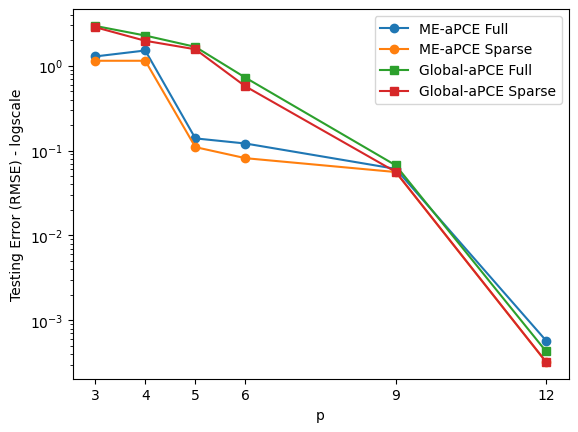

In [81]:
plt.plot(p, Error_AFVB_ME_aPCE_Full, '-o', label = 'ME-aPCE Full')
plt.plot(p, Error_AFVB_ME_aPCE_Sparse, '-o', label = 'ME-aPCE Sparse')
plt.plot(p, Error_AFVB_Global_aPCE_Full, '-s', label = 'Global-aPCE Full')
plt.plot(p, Error_AFVB_Global_aPCE_Sparse, '-s', label = 'Global-aPCE Sparse')
plt.xticks(p)
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

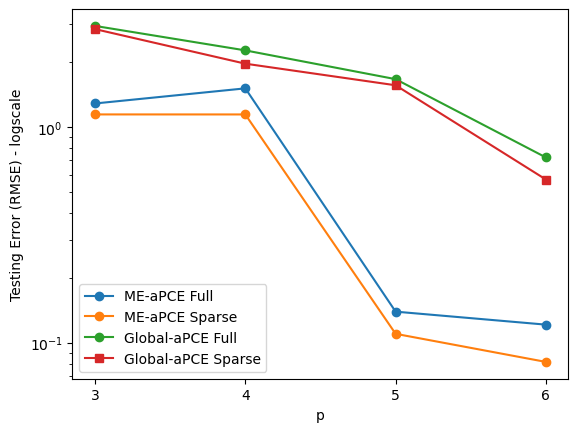

In [86]:
plt.plot(p[:4], Error_AFVB_ME_aPCE_Full[:4], '-o', label = 'ME-aPCE Full')
plt.plot(p[:4], Error_AFVB_ME_aPCE_Sparse[:4], '-o', label = 'ME-aPCE Sparse')
plt.plot(p[:4], Error_AFVB_Global_aPCE_Full[:4], '-o', label = 'Global-aPCE Full')
plt.plot(p[:4], Error_AFVB_Global_aPCE_Sparse[:4], '-s', label = 'Global-aPCE Sparse')
plt.xticks(range(3,7))
plt.yscale("log")
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE) - logscale")
plt.legend();

## Optimizing hyperparameters for PCE

In [139]:
best_params_AFVB_ME_PCE = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    t0 = time.time()
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'PCE_Legendre', p[i], False, size_restriction = 25, B_split = None),
                                search_spaces = param_space_ME,
                                n_iter = 30,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params_AFVB_ME_PCE.append(optimizer.best_params_)

91.02347344954809 min
100.26872749725977 min
147.9976473848025 min
125.91517752011617 min


In [143]:
alpha_AFVB_ME_PCE,A0_AFVB_ME_PCE,B0_AFVB_ME_PCE,C0_AFVB_ME_PCE,D0_AFVB_ME_PCE,theta1_AFVB_ME_PCE,theta2_AFVB_ME_PCE = parameter_values_ME(best_params_AFVB_ME_PCE, 4)


In [145]:
Error_AFVB_Global_PCE_Full = []
Error_AFVB_Global_PCE_Sparse = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    temp = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'PCE_Legendre', p[i], False, theta1_AFVB_ME_PCE[i], theta2_AFVB_ME_PCE[i], alpha_AFVB_ME_PCE[i], 25, None, A0_AFVB_ME_PCE[i], B0_AFVB_ME_PCE[i], C0_AFVB_ME_PCE[i], D0_AFVB_ME_PCE[i])
    temp.fit(X_train, Y_train)
    temp2 = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'PCE_Legendre', p[i], True, theta1_AFVB_ME_PCE[i], theta2_AFVB_ME_PCE[i], alpha_AFVB_ME_PCE[i], 25, temp.B_split, A0_AFVB_ME_PCE[i], B0_AFVB_ME_PCE[i], C0_AFVB_ME_PCE[i], D0_AFVB_ME_PCE[i])
    temp2.fit(X_train, Y_train)
    Error_AFVB_Global_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, temp.predict(X_test, sparse = False))))
    Error_AFVB_Global_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, temp2.predict(X_test, sparse = True))))


In [46]:
best_params_AFVB_Global_PCE = []

for i in range(len(p)):
    t0 = time.time()
    idx = multivariate_pce_index(d, p[i])
    
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, [B_init], Ishigami_Function, idx, AFVB_PCE, basis, 'PCE_Legendre', p[i], False, size_restriction = 25, B_split = np.array([B_init])),
                                search_spaces = param_space_AFVB,
                                n_iter = 30,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params_AFVB_Global_PCE.append(optimizer.best_params_)

10.809207916259766 min
12.860236267248789 min
15.303425749142965 min
18.994933915138244 min


In [102]:
A0_AFVB_Global_PCE, B0_AFVB_Global_PCE, C0_AFVB_Global_PCE, D0_AFVB_Global_PCE = parameter_values(best_params_AFVB_Global_PCE, 4)

In [82]:
Error_AFVB_Global_PCE_Full = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    
    AFVB_model = AFVB_PCE(basis, np.array(B_init),'PCE_Legendre', None, None, p[i], A0_AFVB_Global_PCE[i], B0_AFVB_Global_PCE[i], C0_AFVB_Global_PCE[i], D0_AFVB_Global_PCE[i])
    AFVB_model.fit(X_train, Y_train)
    Error_AFVB_Global_PCE_Full.append(np.sqrt(mean_squared_error(Y_test, AFVB_model.predict(X_test, sparse = False))))

In [83]:
Error_AFVB_Global_PCE_Sparse = []

for i in range(len(p)):
    idx = multivariate_pce_index(d, p[i])
    
    AFVB_model = AFVB_PCE(basis, np.array(B_init),'PCE_Legendre', None, None, p[i], A0_AFVB_Global_PCE[i], B0_AFVB_Global_PCE[i], C0_AFVB_Global_PCE[i], D0_AFVB_Global_PCE[i])
    AFVB_model.fit(X_train, Y_train)
    Error_AFVB_Global_PCE_Sparse.append(np.sqrt(mean_squared_error(Y_test, AFVB_model.predict(X_test, sparse = True))))

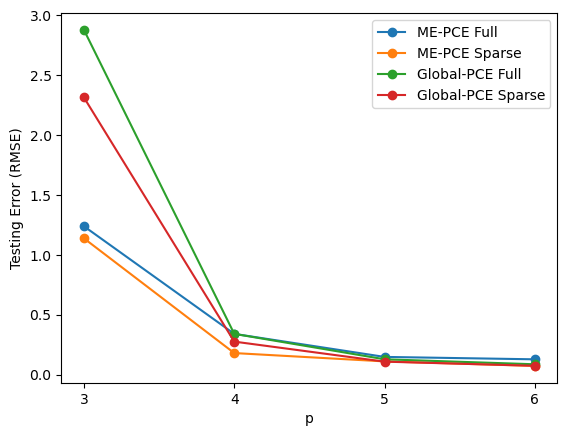

In [157]:
plt.plot(p, Error_MEaPCE_Full, '-o', label = 'ME-PCE Full')
plt.plot(p, Error_MEaPCE_Sparse, '-o', label = 'ME-PCE Sparse')
plt.plot(p, Error_AFVB_Global_PCE_Full, '-o', label = 'Global-PCE Full')
plt.plot(p, Error_AFVB_Global_PCE_Sparse, '-o', label = 'Global-PCE Sparse')
plt.xticks(p)
plt.xlabel("p")
plt.ylabel("Testing Error (RMSE)-logscale")
plt.legend();

In [64]:
best_params = []

for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    t0 = time.time()
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], True, size_restriction = 25),
                                search_spaces = param_space,
                                n_iter = 10,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params.append(optimizer.best_params_)

53.34253256718318 min


/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_v

65.0872655471166 min


In [65]:
best_params

[OrderedDict([('alpha', 0.20391206244448473),
              ('theta1', 0.6858732606158725),
              ('theta2', 0.2209684697392748)]),
 OrderedDict([('alpha', 0.3130196326711137),
              ('theta1', 0.8048727362391627),
              ('theta2', 0.15565739361085668)])]

In [70]:
theta1_aPCE_T = [0.69, 0.80]
theta2_aPCE_T = [0.22, 0.16]
alpha_aPCE_T = [0.20, 0.31]
error_aPCE_T = []

In [71]:
for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p[i], True, theta1_aPCE_T[i], theta2_aPCE_T[i], alpha_aPCE_T[i], 25)
    ME_PCE_Ishigami.fit(X_train, Y_train)
    error_aPCE_T.append(np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test))))

In [66]:
best_params = []

for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    t0 = time.time()
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p[i], False, size_restriction = 25),
                                search_spaces = param_space,
                                n_iter = 10,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params.append(optimizer.best_params_)

39.435804001490276 min
47.60005807876587 min


In [67]:
best_params

[OrderedDict([('alpha', 0.3034680309980036),
              ('theta1', 0.446011507938946),
              ('theta2', 0.27483571983510474)]),
 OrderedDict([('alpha', 0.3539609193921903),
              ('theta1', 0.4574790101877664),
              ('theta2', 0.3899927325545569)])]

In [72]:
theta1_PCE_F = [0.45, 0.46]
theta2_PCE_F = [0.27, 0.39]
alpha_PCE_F = [0.30, 0.35]
error_PCE_F = []

In [73]:
for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p[i], False, theta1_PCE_F[i], theta2_PCE_F[i], alpha_PCE_F[i], 25)
    ME_PCE_Ishigami.fit(X_train, Y_train)
    error_PCE_F.append(np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test))))

In [68]:
best_params = []

for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    t0 = time.time()
    optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p[i], True, size_restriction = 25),
                                search_spaces = param_space,
                                n_iter = 10,
                                scoring = 'neg_mean_squared_error',
                                cv = 5
    )

    optimizer.fit(X_train, Y_train)

    print((time.time()-t0)/60, 'min')
    
    best_params.append(optimizer.best_params_)

/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  r_i = float(a

55.55139573415121 min


/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_v

59.875772635142006 min


In [69]:
best_params

[OrderedDict([('alpha', 0.8831283524160606),
              ('theta1', 0.019099222986992872),
              ('theta2', 0.7449926761649771)]),
 OrderedDict([('alpha', 0.19213422023327334),
              ('theta1', 0.7861319339683881),
              ('theta2', 0.830142078391273)])]

In [74]:
theta1_PCE_T = [0.02, 0.79]
theta2_PCE_T = [0.74, 0.83]
alpha_PCE_T = [0.88, 0.19]
error_PCE_T = []

In [75]:
for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p[i], False, theta1_PCE_T[i], theta2_PCE_T[i], alpha_PCE_T[i], 25)
    ME_PCE_Ishigami.fit(X_train, Y_train)
    error_PCE_T.append(np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test))))

In [78]:
mod = aPCE(X_pol, p, idx) 
P = mod.Create_Orthonormal_Polynomials(p)
P_Stieltjes = mod.Create_Orthonormal_Polynomials_Stieltjes(p)

In [79]:
for i in range(2):
    idx = multivariate_pce_index(d, p[i])
    Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis, 'aPCE', mod, P, p[i]), idx)
    print(Error_AFVB_Ishigami)

In [ ]:
error_aPCE_Full = []
error_aPCE_Sparse = []

In [ ]:
for i in range(2);    
    Error_AFVB_Ishigami_PCE, GSA_AFVB_Ishigami_PCE, mod_AFVB_Ishigami_PCE, V_AFVB_Ishigami_PCE = Results(X_train, X_test, Y_train, Y_test, 
            AFVB_PCE(basis, 'PCE', mod, P, p[i]), idx)
    print(Error_AFVB_Ishigami_PCE)

In [ ]:
error_PCE_Full = []
error_PCE_Sparse = []

In [ ]:
# make errors to plot

In [ ]:
error_aPCE_Full = []
error_aPCE_Sparse = []

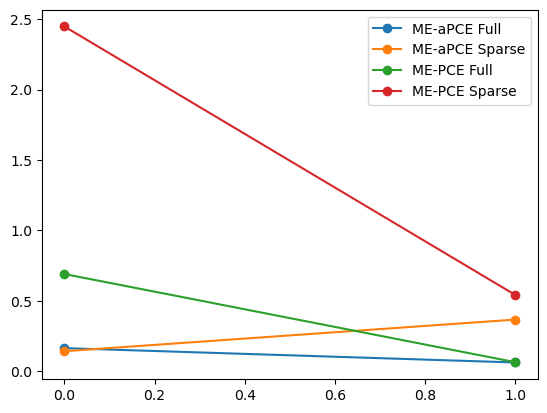

In [76]:
# label x-value as the p-values
plt.plot(error_aPCE_F, 'o-', label = 'ME-aPCE Full')
plt.plot(error_aPCE_T, 'o-', label = 'ME-aPCE Sparse')
plt.plot(error_PCE_F, 'o-', label = 'ME-PCE Full')
plt.plot(error_PCE_T, 'o-', label = 'ME-PCE Sparse')
#plt.plot(error_aPCE_Full, '.-', label = 'aPCE Full')
#plt.plot(error_aPCE_Sparse, '.-', label = 'aPCE Sparse')
#plt.plot(error_PCE_Full, '.-', label = 'PCE Full')
#plt.plot(error_PCE_Sparse, '.-', label = 'PCE Sparse')
plt.legend();

In [ ]:
### change the Legendre domain to the sub-domains as well

### VRVM

I still need to change the code from the VRVM class to accept the modified basis

In [22]:
mod = aPCE(X_pol, p, idx) 
P = mod.Create_Orthonormal_Polynomials(p)
P_Stieltjes = mod.Create_Orthonormal_Polynomials_Stieltjes(p)

In [23]:
Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        SparseVariationalOptimizer(basis, 'PCE', mod, P, p), idx)

In [24]:
Error_AFVB_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,8,1.459842,1.461564,1.356184,1.356163,0.025421


In [23]:
t0 = time.time()
optimizer = BayesSearchCV(estimator = ME_PCE(X_pol, B_init, Ishigami_Function, idx, SparseVariationalOptimizer, basis, 'PCE', p, True, size_restriction = 25),
                            search_spaces = param_space,
                            n_iter = 10,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(X_train, Y_train)

print((time.time()-t0)/60, 'min')

/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:103: RuntimeWarning: invalid value encountered in scalar divide
  eta_k = np.sum(a_vec[N_p_1:]**2)/np.sum(a_vec[1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:103: RuntimeWarning: invalid value encountered in scalar divide
  eta_k = np.sum(a_vec[N_p_1:]**2)/np.sum(a_vec[1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:113: RuntimeWarning: invalid value encountered in scalar divide
  r_i = float(a_vec[np.nonzero(np.sum(self.idx == l, 1) == self.d)])**2/np.sum(a_vec[N_p_1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/ME_PCE.py:103: RuntimeWarning: invalid value encountered in scalar divide
  eta_k = np.sum(a_vec[N_p_1:]**2)/np.sum(a_vec[1:]**2)
/Users/chave/CUDenver_Thesis/CUDenver-Thesi

KeyboardInterrupt: 

In [33]:
mod_AFVB_Ishigami.a_full[mod_AFVB_Ishigami.active_cols].shape

(8,)

## Models and Errors

In [90]:
B_init = [[[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]]

In [93]:
theta1 = [0.9, 0.01, 0.001, 0.0001]
theta2 = [0.9, 0.01, 0.001, 0.0001]
alpha = [0.1, 0.5, 0.9]

In [45]:
for i in range(4):
    for j in range(4):
        for k in range(3):
            ME_PCE_Ishigami = ME_PCE(B_init, Ishigami_Function, idx, AFVB_PCE, basis_Ishigami, 'aPCE', p, sparse = False)
            ME_PCE_Ishigami.fit(X_train, X_pol, theta1 = theta1[i], theta2 = theta2[j], alpha = alpha[k], size_restriction = 25)
            error = np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))
            print('Error =', error, [theta1[i], theta2[j], alpha[k]], 'B_shape =', ME_PCE_Ishigami.B_split.shape[0])

Error = 1.576894845265857 [0.9, 0.9, 0.1] B_shape = 1
Error = 1.576894845265857 [0.9, 0.9, 0.5] B_shape = 1
Error = 1.576894845265857 [0.9, 0.9, 0.9] B_shape = 1
Error = 1.576894845265857 [0.9, 0.01, 0.1] B_shape = 1
Error = 1.576894845265857 [0.9, 0.01, 0.5] B_shape = 1
Error = 1.576894845265857 [0.9, 0.01, 0.9] B_shape = 1
Error = 1.576894845265857 [0.9, 0.001, 0.1] B_shape = 1
Error = 1.576894845265857 [0.9, 0.001, 0.5] B_shape = 1
Error = 1.576894845265857 [0.9, 0.001, 0.9] B_shape = 1
Error = 1.576894845265857 [0.9, 0.0001, 0.1] B_shape = 1
Error = 1.576894845265857 [0.9, 0.0001, 0.5] B_shape = 1
Error = 1.576894845265857 [0.9, 0.0001, 0.9] B_shape = 1
Error = 0.4570825241610843 [0.01, 0.9, 0.1] B_shape = 8
Error = 0.4570825241610843 [0.01, 0.9, 0.5] B_shape = 8
Error = 0.4570825241610843 [0.01, 0.9, 0.9] B_shape = 8
Error = 1.9330960022697807 [0.01, 0.01, 0.1] B_shape = 2
Error = 1.9330960022697807 [0.01, 0.01, 0.5] B_shape = 2
Error = 1.9330960022697807 [0.01, 0.01, 0.9] B_shape

In [ ]:
X_pol, B_init, fun, idx, alg_mod, basis, PCE_method, p = 5, sparse = True, theta1 = 0.001, theta2 = 0.01, alpha = 1/2, size_restriction = 25

In [94]:
for i in range(4):
    for j in range(4):
        for k in range(3):
            ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p, True, theta1 = theta1[i], theta2 = theta2[j], alpha = alpha[k], size_restriction = 25)
            ME_PCE_Ishigami.fit(X_train, Y_train)
            error = np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))
            print('Error =', error, [theta1[i], theta2[j], alpha[k]], 'B_shape =', ME_PCE_Ishigami.B_split.shape[0])

Error = 1.5590055025581158 [0.9, 0.9, 0.1] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.9, 0.5] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.9, 0.9] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.01, 0.1] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.01, 0.5] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.01, 0.9] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.001, 0.1] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.001, 0.5] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.001, 0.9] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.0001, 0.1] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.0001, 0.5] B_shape = 1
Error = 1.5590055025581158 [0.9, 0.0001, 0.9] B_shape = 1
Error = 0.14634206301739172 [0.01, 0.9, 0.1] B_shape = 8
Error = 0.14634206301739172 [0.01, 0.9, 0.5] B_shape = 8
Error = 0.14634206301739172 [0.01, 0.9, 0.9] B_shape = 8
Error = 0.14634206301739172 [0.01, 0.01, 0.1] B_shape = 8
Error = 0.14634206301739172 [0.01, 0.01, 0.5] B_shape = 8
Error = 0.14634206301739172 [0.01, 

In [75]:
for i in range(4):
    for j in range(4):
        for k in range(3):
            ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p, False, theta1 = theta1[i], theta2 = theta2[j], alpha = alpha[k], size_restriction = 25)
            ME_PCE_Ishigami.fit(X_train, Y_train)
            error = np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))
            print('Error =', error, [theta1[i], theta2[j], alpha[k]], 'B_shape =', ME_PCE_Ishigami.B_split.shape[0])

Error = 0.6217471418279746 [0.1, 0.1, 0.1] B_shape = 7
Error = 0.5315668276358553 [0.1, 0.1, 0.5] B_shape = 3
Error = 0.4954049447467795 [0.1, 0.1, 0.9] B_shape = 2
Error = 0.6184937226229411 [0.1, 0.01, 0.1] B_shape = 6
Error = 0.46335189018711737 [0.1, 0.01, 0.5] B_shape = 4
Error = 0.46335189018711737 [0.1, 0.01, 0.9] B_shape = 4
Error = 0.6162870553914445 [0.1, 0.001, 0.1] B_shape = 8
Error = 0.6162870553914445 [0.1, 0.001, 0.5] B_shape = 8
Error = 0.6162870553914445 [0.1, 0.001, 0.9] B_shape = 8
Error = 0.6162870553914445 [0.1, 0.0001, 0.1] B_shape = 8
Error = 0.6162870553914445 [0.1, 0.0001, 0.5] B_shape = 8
Error = 0.6162870553914445 [0.1, 0.0001, 0.9] B_shape = 8
Error = 0.6217471418279746 [0.01, 0.1, 0.1] B_shape = 7
Error = 0.6217471418279746 [0.01, 0.1, 0.5] B_shape = 7
Error = 0.621096594138337 [0.01, 0.1, 0.9] B_shape = 5
Error = 0.6184937226229411 [0.01, 0.01, 0.1] B_shape = 6
Error = 0.6184937226229411 [0.01, 0.01, 0.5] B_shape = 6
Error = 0.6184937226229411 [0.01, 0.01,

KeyboardInterrupt: 

In [74]:
for i in range(4):
    for j in range(4):
        for k in range(3):
            ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'PCE', p, True, theta1 = theta1[i], theta2 = theta2[j], alpha = alpha[k], size_restriction = 25)
            ME_PCE_Ishigami.fit(X_train, Y_train)
            error = np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))
            print('Error =', error, [theta1[i], theta2[j], alpha[k]], 'B_shape =', ME_PCE_Ishigami.B_split.shape[0])

Error = 0.68430378437914 [0.1, 0.1, 0.1] B_shape = 8
Error = 0.68430378437914 [0.1, 0.1, 0.5] B_shape = 8
Error = 0.68430378437914 [0.1, 0.1, 0.9] B_shape = 8
Error = 0.68430378437914 [0.1, 0.01, 0.1] B_shape = 8
Error = 0.68430378437914 [0.1, 0.01, 0.5] B_shape = 8
Error = 0.68430378437914 [0.1, 0.01, 0.9] B_shape = 8
Error = 0.68430378437914 [0.1, 0.001, 0.1] B_shape = 8
Error = 0.68430378437914 [0.1, 0.001, 0.5] B_shape = 8
Error = 0.68430378437914 [0.1, 0.001, 0.9] B_shape = 8
Error = 0.68430378437914 [0.1, 0.0001, 0.1] B_shape = 8
Error = 0.68430378437914 [0.1, 0.0001, 0.5] B_shape = 8
Error = 0.68430378437914 [0.1, 0.0001, 0.9] B_shape = 8
Error = 0.68430378437914 [0.01, 0.1, 0.1] B_shape = 8
Error = 0.68430378437914 [0.01, 0.1, 0.5] B_shape = 8
Error = 0.68430378437914 [0.01, 0.1, 0.9] B_shape = 8
Error = 0.68430378437914 [0.01, 0.01, 0.1] B_shape = 8
Error = 0.68430378437914 [0.01, 0.01, 0.5] B_shape = 8
Error = 0.68430378437914 [0.01, 0.01, 0.9] B_shape = 8
Error = 0.684303784

In [33]:
mod = aPCE(X_pol, p, idx) 
P = mod.Create_Orthonormal_Polynomials(p)
P_Stieltjes = mod.Create_Orthonormal_Polynomials_Stieltjes(p)

In [47]:
Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis, 'aPCE', mod, P, p), idx)

In [48]:
Error_AFVB_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,9,1.317248,1.438414,1.62913,1.456254,0.017873


In [23]:
ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, SparseVariationalOptimizer, basis, 'aPCE', p, False, 0.0001, 0.9, 1/2, 25)
ME_PCE_Ishigami.fit(X_train, Y_train)

In [24]:
### Error
np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))

0.1701655430832387

In [25]:
ME_PCE_Ishigami = ME_PCE(X_pol, B_init, Ishigami_Function, idx, AFVB_PCE, basis, 'aPCE', p, True, 0.0001, 0.9, 1/2, 25)
ME_PCE_Ishigami.fit(X_train, Y_train)

In [26]:
### Error
np.sqrt(mean_squared_error(Ishigami_Function(X_test), ME_PCE_Ishigami.predict(X_test)))

0.12340794028367318

In [10]:
def split_data(X, B_k):
    'X: data to split'
    'B_k: domains, needs to be an array of size d x 2'
    B_k = np.array(B_k)
    
    N = X.shape[0]
    d = X.shape[1]
    X_k = []
    
    for i in range(N):
        if np.sum((B_k[:,0] <= X[i]) & (X[i] <= B_k[:,1])) == 3:
            X_k.append(list(X[i]))
    return np.c_[np.array(X_k)]

In [11]:
#mod_alg = AFVB_PCE
mod_alg = AFVB_PCE

In [12]:
Ishigami_Function = tf.ishigami

In [16]:
idx = multivariate_pce_index(3, 5)

In [17]:
theta1 = 0.00001
theta2 = 0.9
alpha = 1
p=5

B = [[[-np.pi, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]]
#B = [[[-np.pi, 0], [-np.pi, np.pi], [-np.pi, np.pi]],[[0, np.pi], [-np.pi, np.pi], [-np.pi, np.pi]]]

for j in range(5):
    B_k = []
    for k in range(len(B)):
        
        X_p = split_data(X_pol, np.array(B[k]))
        X_t = split_data(X_train, np.array(B[k]))
        Y_t = Ishigami_Function(X_t)

        mod = aPCE(X_p, p) 
        P = mod.Create_Orthonormal_Polynomials(p)

        model = mod_alg('aPCE', d, p = 5, domain = np.array(B[k]), aPCE_model = mod, P = P).fit(X_t, Y_t.reshape(X_t.shape[0]))

        # For each random element k, calculate eta_k and J_k
        N_p_1 = int(math.factorial(d + p-1)/(math.factorial(d)*math.factorial(p-1)))
        eta_k = np.sum(model.a_full[N_p_1:]**2)/np.sum(model.a_full[1:]**2) 
        J_k = 1
        
        for i in range(d):
            J_k *= (B[k][i][1] - B[k][i][0])/(2*np.pi)
        
        r = []
        for i in range(d):
            l = [0]*d
            l[i] = p
            r_i = float(model.a_full[np.nonzero(np.sum(idx == l, 1) == d)])**2/np.sum(model.a_full[N_p_1:]**2)
            r.append(r_i)

        if (eta_k**alpha*J_k >= theta1) & (X_t.shape[0]/2**np.sum(theta2*np.max(r)<=r) >= 25):
        #if (eta_k**alpha*J_k >= theta1): # If this isn't true then we don't split up B_k
            print('Splitting', 'time =', j)
        
            B_temp = []
            print(theta2*np.max(r)<=r, 'k =', k)
            
            for i in range(d):
                if (theta2*np.max(r)<=r[i]):
                    B_temp.append([[B[k][i][0], B[k][i][0] + (B[k][i][1]-B[k][i][0])/2], [B[k][i][0] + (B[k][i][1]-B[k][i][0])/2, B[k][i][1]]])
                else:
                    B_temp.append([B[k][i], B[k][i]])
                    
            for i in range(d):
                if (theta2*np.max(r)<=r[i]):
                    T_p = i
                    break

            B_new = []
            
            T_position = 0
            # Fill B_new with the first element
            if (theta2*np.max(r)<=r[0]):
                for m in range(int(2**(i+1)/2**T_p)):
                    for l in range(int(2**np.sum((theta2*np.max(r)<=r))/(2**(i+1)/2**T_p))):
                        B_new.append([B_temp[0][m%2]])
            else:
                for l in range(int(2**np.sum((theta2*np.max(r)<=r)))):
                    B_new.append([B_temp[0][0]])
            
            # Fill in for the rest of the elements
            for i in range(1,d):
                t = 0
                if (theta2*np.max(r)<=r[i]):
                    for m in range(int(len(B_new)/2**T_position)):
                        for l in range(int(2**T_position)):
                            B_new[t].append(B_temp[i][m%2])
                            t += 1
                    T_position += 1
                else:
                    for l in range(int(2**np.sum((theta2*np.max(r)<=r)))):
                        B_new[t].append(B_temp[i][0])
                        t += 1
            #print(B_new)
            B_k = B_k+B_new

        else:
            print('Not Splitting', 'time =', j, 'k =', k)
            B_new = B[k]
            #print(B_k)
            B_k = B_k+[B_new]
            #print(B_new)
        
    if B == B_k:
        break
    B = B_k.copy()

print(len(B))

Splitting time = 0
[ True False False] k = 0
Splitting time = 1
[False  True  True] k = 0
Splitting time = 1
[False False  True] k = 1
Not Splitting time = 2 k = 0
Not Splitting time = 2 k = 1
Not Splitting time = 2 k = 2
Not Splitting time = 2 k = 3
Splitting time = 2
[False False  True] k = 4
Splitting time = 2
[False False  True] k = 5
Not Splitting time = 3 k = 0
Not Splitting time = 3 k = 1
Not Splitting time = 3 k = 2
Not Splitting time = 3 k = 3
Not Splitting time = 3 k = 4
Not Splitting time = 3 k = 5
Not Splitting time = 3 k = 6
Not Splitting time = 3 k = 7
8


In [18]:
B

[[[-3.141592653589793, 0.0],
  [-3.141592653589793, 0.0],
  [-3.141592653589793, 0.0]],
 [[-3.141592653589793, 0.0],
  [0.0, 3.141592653589793],
  [-3.141592653589793, 0.0]],
 [[-3.141592653589793, 0.0],
  [-3.141592653589793, 0.0],
  [0.0, 3.141592653589793]],
 [[-3.141592653589793, 0.0],
  [0.0, 3.141592653589793],
  [0.0, 3.141592653589793]],
 [[0.0, 3.141592653589793],
  [-3.141592653589793, 3.141592653589793],
  [-3.141592653589793, -1.5707963267948966]],
 [[0.0, 3.141592653589793],
  [-3.141592653589793, 3.141592653589793],
  [-1.5707963267948966, 0.0]],
 [[0.0, 3.141592653589793],
  [-3.141592653589793, 3.141592653589793],
  [0.0, 1.5707963267948966]],
 [[0.0, 3.141592653589793],
  [-3.141592653589793, 3.141592653589793],
  [1.5707963267948966, 3.141592653589793]]]

In [37]:
model_local = []
P_local = []

for k in range(len(ME_PCE_Ishigami.B_split)):
    X_p = split_data(X_pol, ME_PCE_Ishigami.B_split[k])
    X_t = split_data(X_train, ME_PCE_Ishigami.B_split[k])
    print(X_t.shape[0], 'k =', k)
    Y_t = Ishigami_Function(X_t)

    mod = aPCE(X_p, p, idx) 
    P = mod.Create_Orthonormal_Polynomials(p)
    P_local.append(P)

    model = AFVB_PCE(basis_Ishigami, p, 'aPCE', mod).fit(X_t, Y_t.reshape(X_t.shape[0]))
    model_local.append(model)

36 k = 0


KeyboardInterrupt: 

In [40]:
ME_PCE_Ishigami.model_local[0].a_hat

array([[ 1.65297329],
       [ 1.4298195 ],
       [-0.77621001],
       [ 0.22091013],
       [-2.34657485],
       [ 0.73692121],
       [ 0.90691979],
       [-0.69464622],
       [ 0.34050717],
       [-0.08819909]])

In [51]:
for i in range(8):
    print(ME_PCE_Ishigami.model_local[i].a_hat.shape[0])

10
10
12
12
11
10
7
8


In [187]:
Y = np.zeros(X_test.shape[0])
for j in range(Y.shape[0]):
    for i in range(len(B)):
        if np.sum((B[i][:,0] <= X_test[j]) & (X_test[j] <= B[i][:,1])) == 3:
            P = P_local[i]
            Y[j] += model_local[i].predict(X_test[j:j+1], sparse = False)

In [188]:
np.mean(Y)

3.3701823162495956

In [189]:
np.mean(Y_test)

3.3668301094001913

In [190]:
Y

array([ 2.12471097,  4.66306677,  5.08999945,  4.81747481,  1.3560535 ,
        8.5873004 ,  4.27008071,  1.73107471,  0.4368262 ,  0.38627996,
       -0.18254094,  0.17417955, -0.6290512 ,  3.65345499,  6.17233814,
        2.6394742 ,  5.8056285 ,  6.0873554 ,  1.0797263 , -3.05958684,
        2.12833919, -0.87042245,  7.07830351,  4.43888587, -1.35093215,
        5.85243489,  0.57523994,  0.19259811,  2.35325694,  0.8659558 ,
        6.71474008,  2.45894378,  5.4207165 ,  5.04401748,  7.41365467,
       -0.25837579,  1.06920471,  2.53144419, 13.94664161,  2.73922832,
        1.79926854,  5.64893275,  0.78159136,  2.73629155, -0.15851717,
       -1.186637  ,  3.98914363,  1.07597987, -4.09818023,  0.60189927,
        4.80654461,  3.47091221,  1.95635804,  6.9928035 ,  6.60230875,
        4.09555402,  3.98139598,  7.9623679 ,  2.24227132,  3.85273761,
        4.03212749,  9.70053148,  1.30134139,  2.33052246,  7.86691852,
        2.04182525,  3.00236042,  1.28556896,  6.01835861,  5.98

In [27]:
ME_PCE_Ishigami.predict(X_test)

NameError: name 'ME_PCE_Ishigami' is not defined

In [191]:
### Error
np.sqrt(mean_squared_error(Ishigami_Function(X_test), Y))

0.17609461609535684

In [192]:
local_mean = 0
for i in range(B.shape[0]):
    local_mean += model_local[i].a_full[0]
    #print(model_local[i].a_hat[0])
local_mean/B.shape[0]

array([3.77799745])

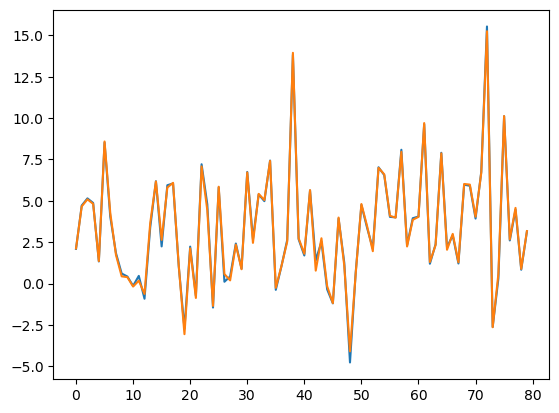

In [193]:
plt.plot(Ishigami_Function(X_test))
plt.plot(Y)

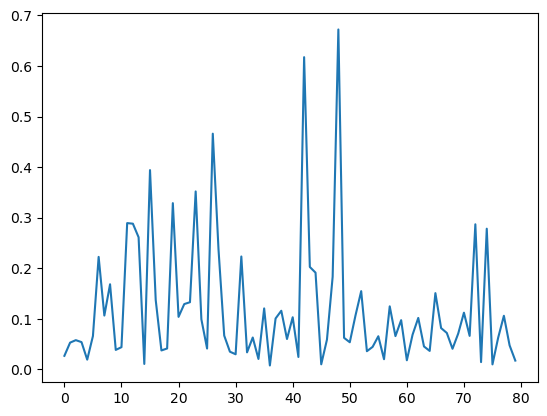

In [194]:
plt.plot(np.abs(Ishigami_Function(X_test)-Y.reshape(X_test.shape[0], 1)))

In [195]:
X_check = X_test[np.where(np.abs(Ishigami_Function(X_test)-Y.reshape(X_test.shape[0], 1))>=1)[0],:]

In [196]:
X_check

array([], shape=(0, 3), dtype=float64)

In [176]:
for i in range(len(B)):
    for j in range(X_check.shape[0]):
        if np.sum((B[i][:,0] <= X_check[j]) & (X_check[j] <= B[i][:,1])) == 3:
            print(i)

In [177]:
B[0]

array([[-3.14159265,  0.        ],
       [-3.14159265,  0.        ],
       [-3.14159265,  3.14159265]])

In [20]:
### comparing with other model
mod = aPCE(X_pol, p, idx) #changed to X_train
P = mod.Create_Orthonormal_Polynomials(p)

In [32]:
mod.Pol_eval(P[0][idx[0][1]],2)

1.0

In [ ]:
Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_Ishigami, 'aPCE', mod, p), idx)

In [ ]:
Error_AFVB_Ishigami

In [27]:
Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_Ishigami, 'PCE', mod, p), idx)

In [28]:
Error_AFVB_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,8,1.354843,1.450074,1.473719,1.460269,0.017714


In [22]:
Error_VRVM_Ishigami, GSA_VRVM_Ishigami, mod_VRVM_Ishigami, V_VRVM_Ishigami = Results(X_train, X_test, Y_train, Y_test,
        SparseVariationalOptimizer(basis_Ishigami, p), idx)

TypeError: basis_Ishigami() missing 1 required positional argument: 'method'

In [179]:
Error_VRVM_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,7,3.035623,3.050702,3.103694,3.050476,0.01934


In [112]:
A_0 = 0.07700
B_0 = 0.01653
C_0 = 0.04678
D_0 = 0.01422

Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [113]:
Error_AFVB_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,100000,11,0.386049,0.464838,0.794671,0.584777,0.022354


## AFVB

### Parameter Optimization

In [71]:
param_space = {'A_0': skopt.space.Real(0.000001, 0.1),
              'B_0': skopt.space.Real(0.000001, 0.1),
              'C_0': skopt.space.Real(0.000001, 0.1),
              'D_0': skopt.space.Real(0.000001, 0.1)
         }

t0 = time.time()
optimizer = BayesSearchCV(estimator = AFVB_PCE(basis = basis_aPCE, p = p),
                            search_spaces = param_space,
                            n_iter = 30,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(X_train, Y_train)

print(time.time()-t0)

ValueError: math domain error

In [48]:
optimizer.best_params_

OrderedDict([('A_0', 0.07700216442475019),
             ('B_0', 0.016529139107592992),
             ('C_0', 0.046777431074088646),
             ('D_0', 0.014223674556344384)])

In [49]:
524/60/60

0.14555555555555555

In [38]:
# Best parameters based on CV for p = 12: 
#{'A_0': 0.1, 'B_0': 1e-05, 'C_0' =  0.1, 'D_0': 0.1}
A_0 = 0.07700
B_0 = 0.01653
C_0 = 0.04678
D_0 = 0.01422

Error_AFVB_Ishigami, GSA_AFVB_Ishigami, mod_AFVB_Ishigami, V_AFVB_Ishigami = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [39]:
Error_AFVB_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,22,0.000375,0.002591,0.00463,0.002943,0.526461


In [40]:
GSA_AFVB_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.340421,7.711965,0.313710,0.557394
1,6.123795,6.123795,0.442606,0.442606
2,0.000000,3.371544,0.000000,0.243683


In [41]:
GSA_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.345888,7.719588,0.313905,0.557589
1,6.125000,6.125000,0.442411,0.442411
2,0.000000,3.373700,0.000000,0.243684


In [42]:
# Best parameters based on CV for p = 12: 
#{'A_0': 0.1, 'B_0': 1e-05, 'C_0' =  0.1, 'D_0': 0.1}
A_0 = 0.07700
B_0 = 0.01653
C_0 = 0.04678
D_0 = 0.01422

Error_AFVB_Ishigami_S, GSA_AFVB_Ishigami_S, mod_AFVB_Ishigami_S, V_AFVB_Ishigami_S = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_aPCE_Stieltjes, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [43]:
Error_AFVB_Ishigami_S

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,22,0.000375,0.002591,0.00463,0.002943,0.552552


In [44]:
GSA_AFVB_Ishigami_S

,Partial Variance,Total Variance,1st Order,Total Order
0,4.340421,7.711965,0.313710,0.557394
1,6.123795,6.123795,0.442606,0.442606
2,0.000000,3.371544,0.000000,0.243683


In [45]:
GSA_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.345888,7.719588,0.313905,0.557589
1,6.125000,6.125000,0.442411,0.442411
2,0.000000,3.373700,0.000000,0.243684


In [423]:
idx[mod_AFVB_Ishigami.active_cols]

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0,  2,  0],
       [ 0,  4,  0],
       [ 0,  6,  0],
       [ 0,  8,  0],
       [ 0, 10,  0],
       [ 0, 12,  0],
       [ 1,  0,  0],
       [ 1,  0,  1],
       [ 1,  0,  2],
       [ 1,  0,  4],
       [ 2,  0,  0],
       [ 2,  0,  2],
       [ 3,  0,  0],
       [ 3,  0,  1],
       [ 3,  0,  2],
       [ 3,  0,  4],
       [ 5,  0,  0],
       [ 5,  0,  2],
       [ 5,  0,  4],
       [ 7,  0,  0],
       [ 7,  0,  2],
       [ 7,  0,  4]])

In [424]:
mod_AFVB_Ishigami.a_hat

array([[ 3.49872328e+00],
       [ 2.38525501e-03],
       [-5.97833203e-01],
       [-1.94703220e+00],
       [ 1.35698960e+00],
       [-3.38892256e-01],
       [ 4.58763024e-02],
       [-3.82986350e-03],
       [ 1.63617333e+00],
       [-4.34994622e-03],
       [ 1.37952630e+00],
       [ 4.10803310e-01],
       [-6.72496244e-03],
       [-5.56399669e-03],
       [-1.29456348e+00],
       [ 2.97279036e-03],
       [-1.09144844e+00],
       [-3.24881090e-01],
       [ 1.95250501e-01],
       [ 1.64101525e-01],
       [ 4.85782676e-02],
       [-1.23883771e-02],
       [-1.00559923e-02],
       [-2.57801434e-03]])

In [30]:
t0 = time.time()
optimizer = BayesSearchCV(estimator = AFVB_PCE(basis = basis_PCE_Ishigami, p = p),
                            search_spaces = param_space,
                            n_iter = 50,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(X_train, Y_train)

print(time.time()-t0)

1894.849053144455


In [31]:
optimizer.best_params_

OrderedDict([('A_0', 0.05428989456568009),
             ('B_0', 0.01834506550270264),
             ('C_0', 0.02201029030700765),
             ('D_0', 0.0015529842047863562)])

In [471]:
# Best parameters based on CV for p = 12: 
# These were based on 320 training data points
# {'A_0': 0.1, 'B_0': 1e-05, 'C_0' =  1e-05, 'D_0': 0.1} 
A_0 = 0.05429
B_0 = 0.01835
C_0 = 0.02201
D_0 = 0.00155

Error_AFVB_PCE_Ishigami, GSA_AFVB_PCE_Ishigami, mod_AFVB_PCE_Ishigami, V_AFVB_PCE_Ishigami = Results(X_train, X_test, Y_train, Y_test,
        AFVB_PCE(basis_PCE_Ishigami, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [472]:
Error_AFVB_PCE_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,19,0.00029,0.000626,0.000783,0.000677,0.449014


In [473]:
GSA_AFVB_PCE_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.345752,7.719416,0.313904,0.557592
1,6.124790,6.124790,0.442408,0.442408
2,0.000000,3.373664,0.000000,0.243688


In [474]:
GSA_Ishigami

,Partial Variance,Total Variance,1st Order,Total Order
0,4.345888,7.719588,0.313905,0.557589
1,6.125000,6.125000,0.442411,0.442411
2,0.000000,3.373700,0.000000,0.243684


In [426]:
Error_AFVB_PCE_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,19,0.000307,0.000647,0.000945,0.00063,0.475238


In [427]:
idx[mod_AFVB_PCE_Ishigami.active_cols]

array([[ 0,  0,  0],
       [ 0,  2,  0],
       [ 0,  4,  0],
       [ 0,  6,  0],
       [ 0,  8,  0],
       [ 0, 10,  0],
       [ 0, 12,  0],
       [ 1,  0,  0],
       [ 1,  0,  2],
       [ 1,  0,  4],
       [ 3,  0,  0],
       [ 3,  0,  2],
       [ 3,  0,  4],
       [ 5,  0,  0],
       [ 5,  0,  2],
       [ 5,  0,  4],
       [ 7,  0,  0],
       [ 7,  0,  2],
       [ 7,  0,  4]])

In [428]:
mod_AFVB_PCE_Ishigami.a_hat

array([[ 3.49997552e+00],
       [-5.94758074e-01],
       [-1.95227290e+00],
       [ 1.35740954e+00],
       [-3.39352909e-01],
       [ 4.59292673e-02],
       [-3.82851205e-03],
       [ 1.62543858e+00],
       [ 1.37246761e+00],
       [ 4.09254282e-01],
       [-1.29071142e+00],
       [-1.08981270e+00],
       [-3.24946791e-01],
       [ 1.94899570e-01],
       [ 1.64586074e-01],
       [ 4.90202940e-02],
       [-1.25608734e-02],
       [-1.05074850e-02],
       [-2.94910094e-03]])

## VRVM

In [36]:
param_space = {'omega_a': skopt.space.Real(0.000001, 0.1),
              'omega_b': skopt.space.Real(0.000001, 0.1),
              'tau_a': skopt.space.Real(0.000001, 0.1),
              'tau_b': skopt.space.Real(0.000001, 0.1)
         }

In [39]:
t0 = time.time()
optimizer = BayesSearchCV(estimator = SparseVariationalOptimizer(basis = basis_aPCE, p = p),
                            search_spaces = param_space,
                            n_iter = 50,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(data['xi'], data['y'])

print(time.time()-t0)

/Users/chave/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/chave/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2961.5630259513855


In [40]:
optimizer.best_params_

OrderedDict([('omega_a', 0.028509534536848024),
             ('omega_b', 0.04281103620572389),
             ('tau_a', 0.04277575729693283),
             ('tau_b', 0.03615238968778503)])

In [52]:
Error_VRVM_Ishigami, GSA_VRVM_Ishigami, mod_VRVM_Ishigami, V_VRVM_Ishigami = Results(data['xi'], X_test, Y_train, Y_test,
        SparseVariationalOptimizer(basis_aPCE, p, 0.02851, 0.04281, 0.04278, 0.03615, 0.2, 1.0), idx)

In [53]:
Error_VRVM_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,15,0.043304,0.014534,0.024371,0.018338,0.217324


In [54]:
Error_VRVM_Ishigami_S, GSA_VRVM_Ishigami_S, mod_VRVM_Ishigami_S, V_VRVM_Ishigami_S = Results(data['xi'], X_test, Y_train, Y_test,
        SparseVariationalOptimizer(basis_aPCE_Stieltjes, p, 0.02851, 0.04281, 0.04278, 0.03615, 0.2, 1.0), idx)

In [55]:
Error_VRVM_Ishigami_S

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,15,0.043304,0.014534,0.024371,0.018338,0.21241


In [43]:
t0 = time.time()
optimizer = BayesSearchCV(estimator = SparseVariationalOptimizer(basis = basis_PCE_Ishigami, p = p),
                            search_spaces = param_space,
                            n_iter = 50,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(data['xi'], data['y'])

print(time.time()-t0)

/Users/chave/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2637.820358991623


In [44]:
optimizer.best_params_

OrderedDict([('omega_a', 0.04540549874364945),
             ('omega_b', 0.054319259205855515),
             ('tau_a', 0.08302439423042468),
             ('tau_b', 0.04462844667792927)])

In [477]:
Error_VRVM_PCE_Ishigami, GSA_VRVM_PCE_Ishigami, mod_VRVM_PCE_Ishigami, V_VRVM_PCE_Ishigami = Results(data['xi'], X_test, Y_train, Y_test, 
        SparseVariationalOptimizer(basis_PCE_Ishigami, p, 0.04541, 0.05432, 0.08302, 0.04463, 0.2, 1.0), idx)

In [478]:
Error_VRVM_PCE_Ishigami

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,15,0.048921,0.015601,0.016979,0.014962,0.19544


# Plots: Ishigami Function

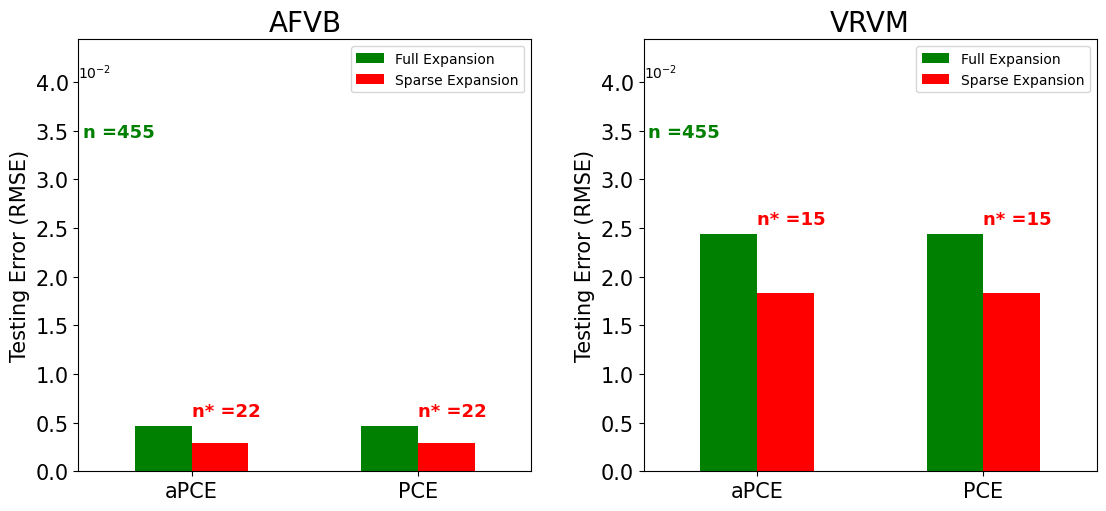

In [56]:
plot_Error(Error_AFVB_Ishigami, Error_AFVB_Ishigami_S, 
           Error_VRVM_Ishigami, Error_VRVM_Ishigami_S,
           100, '$10^{-2}$', mod_AFVB_Ishigami.n)
#plt.savefig(wd + '/RMSE_Ishigami.png')

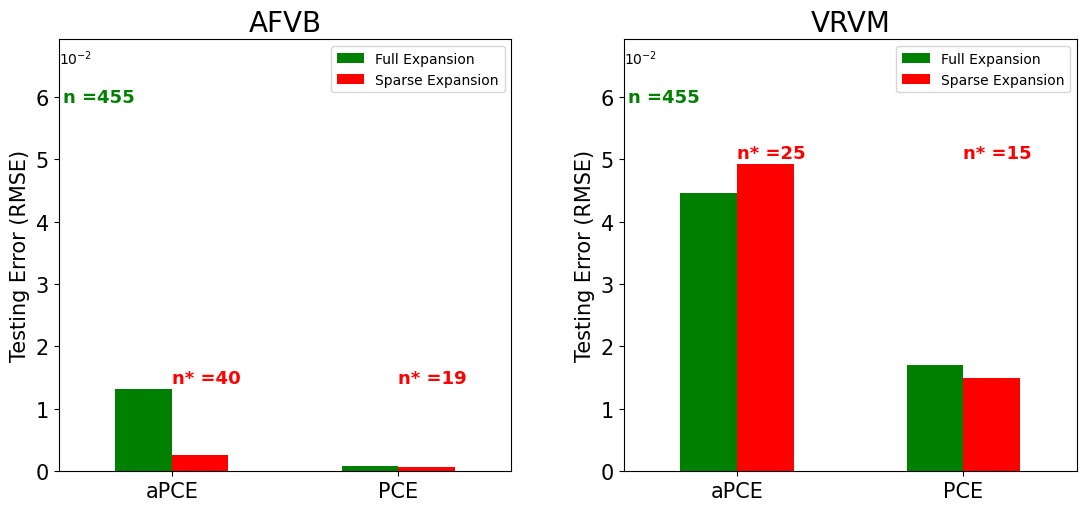

In [479]:
plot_Error(Error_AFVB_Ishigami, Error_AFVB_PCE_Ishigami, 
           Error_VRVM_Ishigami, Error_VRVM_PCE_Ishigami,
           100, '$10^{-2}$', mod_AFVB_Ishigami.n)
#plt.savefig(wd + '/RMSE_Ishigami.png')

# Activity Scores

In [352]:
def Activity_Scores(M, d, grad_fun):
    
    grad = grad_fun(X)
    C = np.zeros((d,d))
    
    for i in range(M):
        grad_i = grad[:,i].reshape((d,1))
        C += 1/M*grad_i@grad_i.T
        
    lam, W = np.linalg.eig(C)
    
    lam_sort = np.sort(lam)[::-1]
    W_sort = W[:,np.argsort(lam)[::-1]]
    
    for i in range(d):
        W_sort[:,i] = np.sign(W_sort[0,i])*W_sort[:,i]
    
    gap_list = np.zeros(d-1)
    for i in range(d-1):
        gap_list[i] = lam_sort[i] - lam_sort[i+1]
    gap_max = np.argmax(gap_list)
    
    alpha = np.zeros(d)
    for i in range(d):
        alpha[i] = np.sum(lam_sort[0:gap_max+1]*W_sort[i,0:gap_max+1]**2)
        
    return W_sort, lam_sort, alpha

In [353]:
def Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B):
    v1 = ((12*R_b2/(R_b1+R_b2) + 0.74)*B*(R_c2 + 9))/(B*(R_c2 + 9) + R_f)
    v2 = 11.35*R_f/(B*(R_c2 + 9) + R_f)
    v3 = 0.74*R_f*B*(R_c2 + 9)/((B*(R_c2 + 9) + R_f)*R_c1)
    return v1+v2+v3

R_b1, R_b2, R_f, R_c1, R_c2, B = symbols('R_b1 R_b2 R_f R_c1 R_c2 B')

V_Rb1 = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), R_b1))
V_Rb2 = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), R_b2))
V_Rf = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), R_f))
V_Rc1 = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), R_c1))
V_Rc2 = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), R_c2))
V_B = lambdify([R_b1, R_b2, R_f, R_c1, R_c2, B], diff(Circuit(R_b1, R_b2, R_f, R_c1, R_c2, B), B))

def grad_Circuit(X):
    
    a_min = [50, 25, 0.5, 1.2, 0.25, 50]
    b_min = [150, 70, 3.0, 2.5, 1.2, 300]
    
    M = X.shape[0]
    d = X.shape[1]
    
    # scale to [a,b]
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    x4 = 0.5*(X[:,3] + 1)*(b_min[3] - a_min[3]) + a_min[3]
    x5 = 0.5*(X[:,4] + 1)*(b_min[4] - a_min[4]) + a_min[4]
    x6 = 0.5*(X[:,5] + 1)*(b_min[5] - a_min[5]) + a_min[5]
    
    # derivative and scale back to [-1,1]
    grad_f = np.zeros((d,M))
    grad_f[0,:] = V_Rb1(x1, x2, x3, x4, x5, x6)*0.5*(b_min[0] - a_min[0])
    grad_f[1,:] = V_Rb2(x1, x2, x3, x4, x5, x6)*0.5*(b_min[1] - a_min[1])
    grad_f[2,:] = V_Rf(x1, x2, x3, x4, x5, x6)*0.5*(b_min[2] - a_min[2])
    grad_f[3,:] = V_Rc1(x1, x2, x3, x4, x5, x6)*0.5*(b_min[3] - a_min[3])
    grad_f[4,:] = V_Rc2(x1, x2, x3, x4, x5, x6)*0.5*(b_min[4] - a_min[4])
    grad_f[5,:] = V_B(x1, x2, x3, x4, x5, x6)*0.5*(b_min[5] - a_min[5])
    
    return grad_f

In [354]:
M = 10000
X = np.random.uniform(-1, 1, (M, 6))
W, lam, alpha = Activity_Scores(M, 6, grad_Circuit)

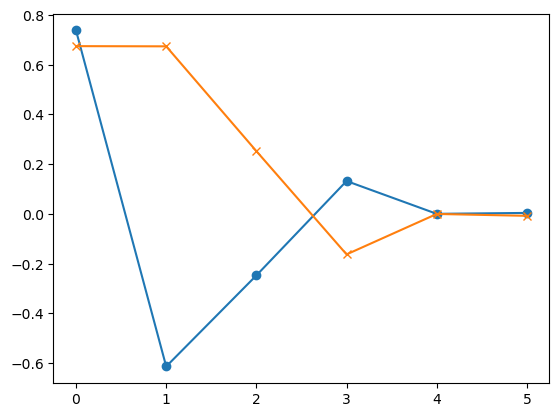

In [355]:
plt.plot(W[:,0],'o-')
plt.plot(W[:,1],'x-');

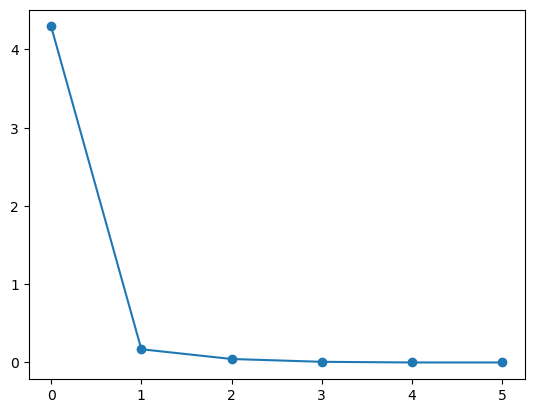

In [356]:
plt.plot(lam,'o-');

In [357]:
alpha

array([2.33696375e+00, 1.61803575e+00, 2.63093558e-01, 7.49293476e-02,
       1.14805546e-07, 6.40140108e-05])

### Ishigami Function

In [358]:
def grad_Ishigami(X):
    'Assuming X~U(-1,1)'
    
    M = X.shape[0]
    d = X.shape[1]
    
    a_min = [-np.pi]*3
    b_min = [np.pi]*3
    
    # change to [-pi,pi]
    x1 = 1/2*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 1/2*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 1/2*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    
    # Derivative and change back to [-1,1]
    grad_f = np.zeros((d, M))
    grad_f[0,:] = (np.cos(x1) + 0.1*x3**4*np.cos(x1))*0.5*(b_min[0] - a_min[0])
    grad_f[1,:] = (14*np.sin(x2)*np.cos(x2))*0.5*(b_min[1] - a_min[1])
    grad_f[2,:] = (0.4*x3**3*np.sin(x1))*0.5*(b_min[2] - a_min[2])
    
    return grad_f

In [390]:
M = 10000
X = np.random.uniform(-1, 1, (M, 3))
W_Ishigami, lam_Ishigami, alpha_Ishigami = Activity_Scores(M, 3, grad_Ishigami)

In [391]:
alpha_Ishigami

array([7.58037373e-02, 2.41776054e+02, 1.64051178e-03])

### aPCE

In [392]:
def Pol_eval(coeff, x):
    """
    Evaluates a polynomial at the value x.
    Polynomial is assumed to be in the form: c_0 + c_1*x + ... + c_n*x^n

    """

    val = 0
    for i in range(coeff.shape[0]):
        val += coeff[i]*x**i

    return val

In [393]:
def grad_Ishigami_aPCE(X):
    "Z ~ U(-1, 1)"
    
    M = X.shape[0]
    d = X.shape[1]
    
    a_min = [X_train[:,0].min(), X_train[:,1].min(), X_train[:,2].min()]
    b_min = [X_train[:,0].max(), X_train[:,1].max(), X_train[:,2].max()]
    
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    
    n_star = a_hat.shape[0]
    grad_f = np.zeros((d,M))
    for i in range(n_star):
        grad_f[0,:] += a_hat[i][0]*\
                     Pol_eval(np.polyder((P[0][idx_star[i][0]])[::-1])[::-1], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)
            
        grad_f[1,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(np.polyder((P[1][idx_star[i][1]])[::-1])[::-1], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)
        
        grad_f[2,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(np.polyder((P[2][idx_star[i][2]])[::-1])[::-1], x3)
    
    grad_f[0,:] *= 0.5*(b_min[0] - a_min[0])
    grad_f[1,:] *= 0.5*(b_min[1] - a_min[1])
    grad_f[2,:] *= 0.5*(b_min[2] - a_min[2])
    return grad_f


In [394]:
idx_star = idx[mod_AFVB_Ishigami.active_cols]
a_hat = mod_AFVB_Ishigami.a_hat
W_aPCE, lam_aPCE, alpha_aPCE = Activity_Scores(M, 3, grad_Ishigami_aPCE)

In [395]:
alpha_aPCE

array([7.18490098e-02, 2.40495772e+02, 9.66593024e-04])

### PCE

In [396]:
def grad_Ishigami_PCE(X):
    "Z ~ U(-1, 1)"
    
    a_min = [-np.pi]*3
    b_min = [np.pi]*3
    
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    
    n_star = a_hat.shape[0]
    grad_f = np.zeros((d,M))
    for i in range(n_star):
        grad_f[0,:] += a_hat[i][0]*\
                     math.sqrt((2*idx_star[i][0]+1)/1)*Pol_eval(np.polyder(np.array(legendre(idx_star[i][0])))[::-1], x1/np.pi)*\
                     math.sqrt((2*idx_star[i][1]+1)/1)*legendre(idx_star[i][1])(x2/np.pi)*\
                     math.sqrt((2*idx_star[i][2]+1)/1)*legendre(idx_star[i][2])(x3/np.pi)
            
        grad_f[1,:] += a_hat[i][0]*\
             math.sqrt((2*idx_star[i][0]+1)/1)*legendre(idx_star[i][0])(x1/np.pi)*\
             math.sqrt((2*idx_star[i][1]+1)/1)*Pol_eval(np.polyder(np.array(legendre(idx_star[i][1])))[::-1], x2/np.pi)*\
             math.sqrt((2*idx_star[i][2]+1)/1)*legendre(idx_star[i][2])(x3/np.pi)
        
        grad_f[2,:] += a_hat[i][0]*\
             math.sqrt((2*idx_star[i][0]+1)/1)*legendre(idx_star[i][0])(x1/np.pi)*\
             math.sqrt((2*idx_star[i][1]+1)/1)*legendre(idx_star[i][1])(x2/np.pi)*\
             math.sqrt((2*idx_star[i][2]+1)/1)*Pol_eval(np.polyder(np.array(legendre(idx_star[i][2])))[::-1], x3/np.pi)
    
    #grad_f[0] *= 0.5*(b_min[0] - a_min[0])
    #grad_f[1] *= 0.5*(b_min[1] - a_min[1])
    #grad_f[2] *= 0.5*(b_min[2] - a_min[2])
    return grad_f

In [397]:
idx_star = idx[mod_AFVB_PCE_Ishigami.active_cols]
a_hat = mod_AFVB_PCE_Ishigami.a_hat
W_PCE, lam_PCE, alpha_PCE = Activity_Scores(M, 3, grad_Ishigami_PCE)

In [398]:
alpha_PCE

array([7.58145106e-02, 2.41774598e+02, 1.66025622e-03])

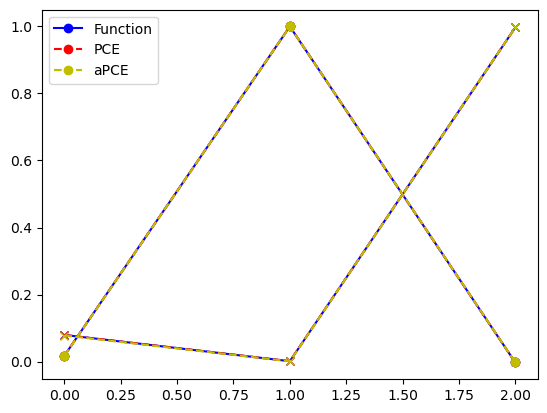

In [400]:
plt.plot(W_Ishigami[:,0],'o-', c = 'b', label = 'Function')
plt.plot(W_Ishigami[:,1],'x-', c = 'b')
plt.plot(W_PCE[:,0],'o--', c = 'r', label = 'PCE')
plt.plot(W_PCE[:,1],'x--', c = 'r')
plt.plot(W_aPCE[:,0],'o--', c = 'y', label = 'aPCE')
plt.plot(W_aPCE[:,1],'x--', c = 'y')
plt.legend()

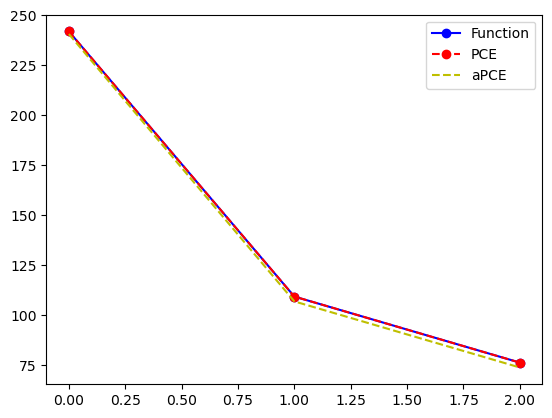

In [401]:
plt.plot(lam_Ishigami,'o-', c = 'b', label = 'Function')
plt.plot(lam_PCE,'o--', c = 'r', label = 'PCE')
plt.plot(lam_aPCE,'--', c = 'y', label = 'aPCE')
plt.legend()

In [402]:
alpha_df = pd.DataFrame([alpha_Ishigami, alpha_PCE, alpha_aPCE]).T

In [403]:
alpha_df.index = ['$a_1$', '$a_2$', '$a_3$']
alpha_df.columns = ['Function', 'PCE', 'aPCE']
alpha_df

,Function,PCE,aPCE
$a_1$,0.075804,0.075815,0.071849
$a_2$,241.776054,241.774598,240.495772
$a_3$,0.001641,0.001660,0.000967


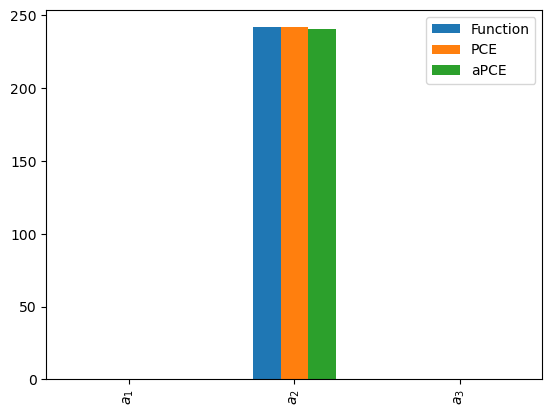

In [404]:
alpha_df.plot.bar();

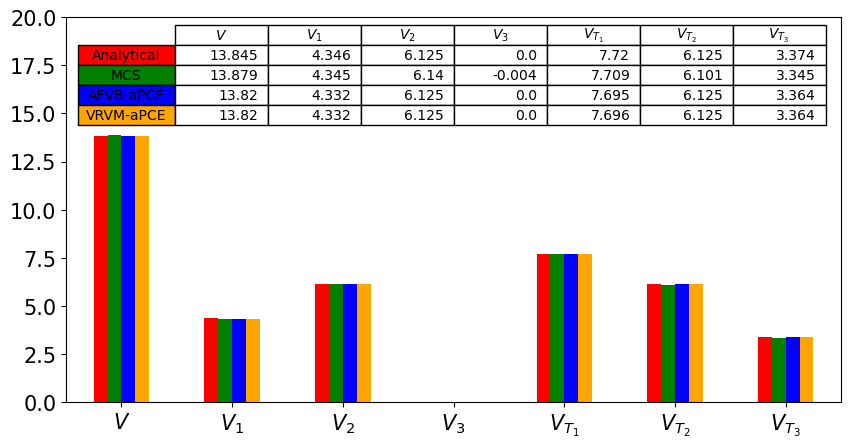

In [97]:
l = ['$V$', '$V_1$', '$V_2$','$V_3$', '$V_{T_1}$','$V_{T_2}$','$V_{T_3}$']
plot_Variances(GSA_Ishigami, Sobol_MC_Ishigami, GSA_AFVB_Ishigami, 
               V_Ishigami, V_MC_Ishigami, V_AFVB_Ishigami, V_VRVM_Ishigami,
               GSA_VRVM_Ishigami, l, 20, (10,5), 1);
#plt.savefig(wd + '/Variances_Ishigami.png')

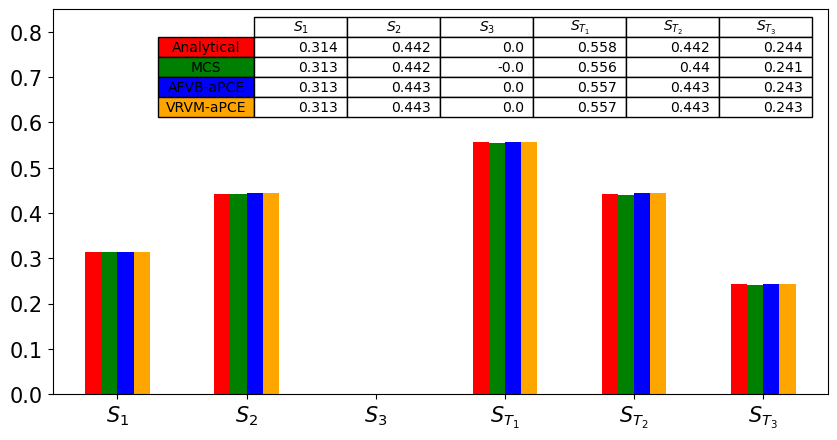

In [98]:
l = ['$S_1$', '$S_2$','$S_3$', '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$']
plot_Sobol_Indices(GSA_Ishigami, Sobol_MC_Ishigami, 
           GSA_AFVB_Ishigami, GSA_VRVM_Ishigami, l, 0.85, (10,5), 1);
#plt.savefig(wd + '/GSA_Ishigami.png')

### For the following plots we can:
* Plot the full expansion coefficients with the sparse expansion coefficients
* Plot the coeffients of both sparse models, AFVB and VRVM
* Plot the coefficients of one model for PCE and aPCE

Question: Why plot the x-axis with a log scale?

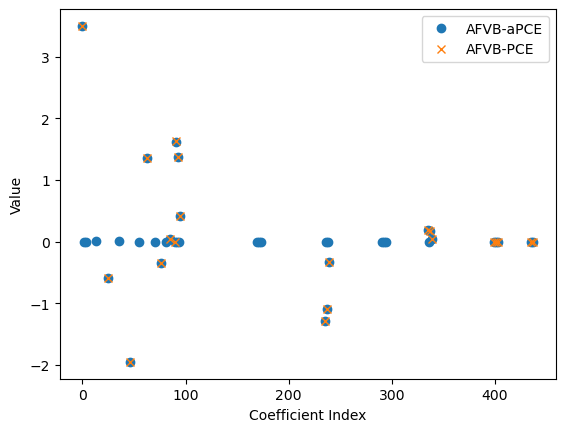

In [99]:
plt.plot(mod_AFVB_Ishigami.active_cols, mod_AFVB_Ishigami.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_Ishigami.active_cols, mod_AFVB_PCE_Ishigami.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_Ishigami.png')

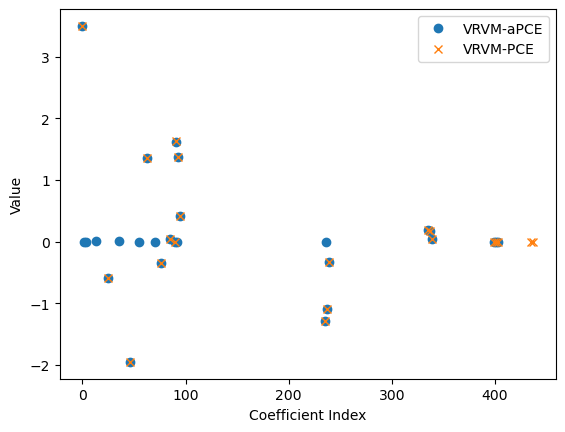

In [100]:
plt.plot(mod_VRVM_Ishigami.active_cols, mod_VRVM_Ishigami.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_Ishigami.active_cols, mod_VRVM_PCE_Ishigami.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_Ishigami.png')

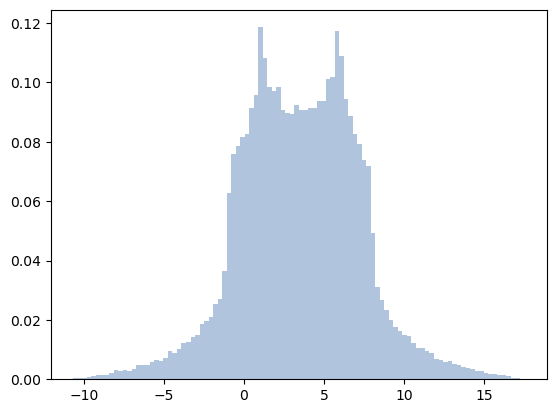

In [292]:
plt.hist(Ishigami_Function(X_dens).reshape(N_dens), density = True, bins = 100, color = 'lightsteelblue', label='Ishigmai Function')
#sns.kdeplot((mod_AFVB_Ishigami.predict(X_dens, mod_AFVB_Ishigami.active_cols)).reshape(N_dens), 
#            lw=2, color='r', label='AFVB-aPCE')
#sns.kdeplot((mod_VRVM_Ishigami.predict(X_dens, mod_VRVM_Ishigami.active_cols)).reshape(N_dens), 
#            lw=2, linestyle="--", color='g', label='VRVM-aPCE')
#plt.legend();
plt.savefig(wd + '/Density_Ishigami.png')

## Running with different values of N_pol

In [15]:
np.random.seed(100)

N_pol = N_train
X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))

mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

Res_Error, Res_GSA, mod_save = Results(Ishigami_Function, X_train, X_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)


N_pol_ls = [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]


for i in N_pol_ls:
    N_pol = i

    X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))

    mod = aPCE(X_pol, p, idx)
    P = mod.Create_Orthonormal_Polynomials(p)

    Res1, Res2, mod_save = Results(Ishigami_Function, X_train, X_test, 
            AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)
    
    Res_Error = pd.concat([Res_Error, Res1], ignore_index = True, sort = False)
    Res_GSA = pd.concat([Res_GSA, Res2], ignore_index = True, sort = False)

In [16]:
Res_Error

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,320,49,0.000081,0.000315,0.000837,0.000669,0.852478
1,5000,45,0.000081,0.000298,0.000749,0.000650,0.640837
2,10000,44,0.000091,0.000273,0.000748,0.000650,0.773641
3,50000,46,0.000091,0.000275,0.000722,0.000649,0.783967
4,100000,44,0.000087,0.000270,0.000763,0.000567,0.820247
5,500000,43,0.000095,0.000280,0.000716,0.000587,0.999585
6,1000000,42,0.000092,0.000278,0.000662,0.000563,1.306579
7,5000000,37,0.000089,0.000275,0.000689,0.000553,1.434395
8,10000000,35,0.000092,0.000296,0.000721,0.000552,1.278801


In [17]:
Res_GSA

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.332465,4.399501,6.370637,2.483159e-03,7.959345,6.370637,3.562328,0.306960,0.444490,1.732542e-04,0.555337,0.444490,0.248550
1,14.116932,4.482868,6.094916,1.179173e-07,8.022015,6.094916,3.539147,0.317553,0.431745,8.352898e-09,0.568255,0.431745,0.250702
2,13.773153,4.383211,6.004761,8.230918e-05,7.768310,6.004761,3.385182,0.318243,0.435976,5.976059e-06,0.564018,0.435976,0.245781
3,13.804783,4.337431,6.115694,7.273424e-05,7.689016,6.115694,3.351658,0.314198,0.443013,5.268771e-06,0.556982,0.443013,0.242790
4,13.862851,4.362146,6.131230,8.412202e-06,7.731613,6.131230,3.369475,0.314664,0.442278,6.068161e-07,0.557722,0.442278,0.243058
5,13.853779,4.350173,6.127986,1.849383e-08,7.725793,6.127986,3.375620,0.314006,0.442333,1.334930e-09,0.557667,0.442333,0.243661
6,13.857016,4.350884,6.129607,5.466956e-07,7.727409,6.129607,3.376526,0.313984,0.442347,3.945262e-08,0.557653,0.442347,0.243669
7,13.840739,4.343700,6.123285,1.120902e-06,7.717454,6.123285,3.373755,0.313834,0.442410,8.098572e-08,0.557590,0.442410,0.243755
8,13.850794,4.349116,6.124486,1.455865e-07,7.726307,6.124486,3.377192,0.313998,0.442176,1.051106e-08,0.557824,0.442176,0.243827


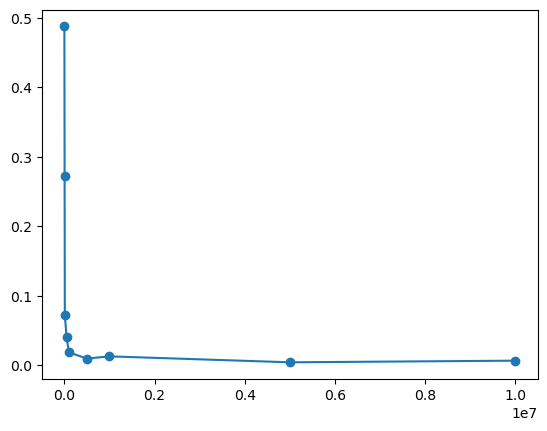

In [18]:
plt.plot(Res_Error['N_pol'], np.abs(Res_GSA[0]-GSA_Ishigami[0]), 'o-')

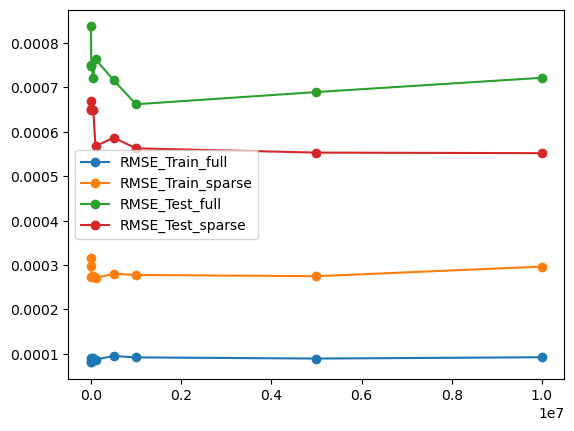

In [19]:
plt.plot(Res_Error['N_pol'], Res_Error[['RMSE_Train_full', 'RMSE_Train_sparse',
                                    'RMSE_Test_full', 'RMSE_Test_sparse']], 'o-',
        label = ['RMSE_Train_full', 'RMSE_Train_sparse',
                                    'RMSE_Test_full', 'RMSE_Test_sparse'])
plt.legend();

## Running with different values of N_pol

In [21]:
np.random.seed(100)

N_pol = 1000
X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))

mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

Res_Error, Res_GSA = Results(Ishigami_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)


N_pol_ls = [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]


for i in N_pol_ls:
    N_pol = i

    X_pol = np.random.uniform(-np.pi, np.pi, size=(N_pol, d))
    mod = aPCE(X_pol, p, idx)
    P = mod.Create_Orthonormal_Polynomials(p)

    Res1, Res2 = Results(Ishigami_Function, X_train, X_test, 
            SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)
    
    Res_Error = pd.concat([Res_Error, Res1], ignore_index = True, sort = False)
    Res_GSA = pd.concat([Res_GSA, Res2], ignore_index = True, sort = False)

KeyboardInterrupt: 

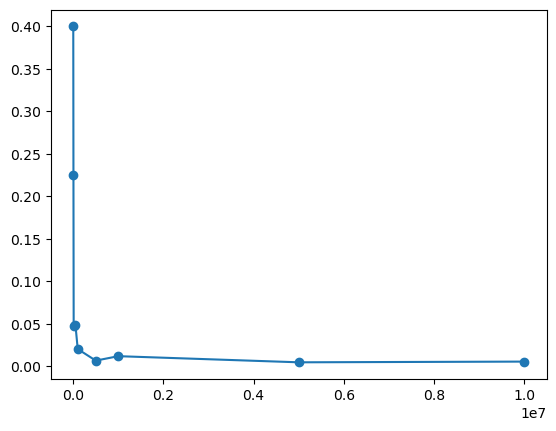

In [25]:
plt.plot(Res_Error['N_pol'], np.abs(Res_GSA[0]-GSA_Ishigami[0]), 'o-');

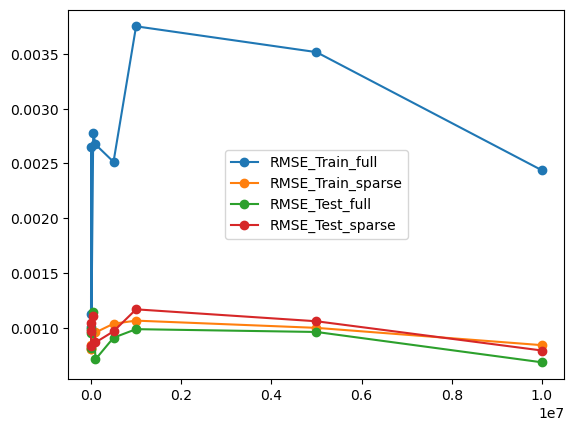

In [26]:
plt.plot(Res_Error['N_pol'], Res_Error[['RMSE_Train_full', 'RMSE_Train_sparse',
                                    'RMSE_Test_full', 'RMSE_Test_sparse']], 'o-',
        label = ['RMSE_Train_full', 'RMSE_Train_sparse',
                                    'RMSE_Test_full', 'RMSE_Test_sparse'])
plt.legend();

# Example 2: Morris Function
The morris function is given as

$$
Y = b_0 + \sum_{i=1}^{20}b_i \omega_i + \sum_{i<j}^{20}b_{ij}\omega_i\omega_j + \sum_{1<j<l}^{20}b_{ijl}\omega_i\omega_j\omega_l + \sum_{i<j<l<s}^{20}b_{ijls}\omega_i\omega_j\omega_l\omega_s
$$
where
$$
\omega_i = \left\{
        \begin{array}{ll}
            \frac{2.2X_i}{X_i+0.1} - 1 & \quad \text{if } i=3,5,7 \\
            2X_i - 1 & \quad \text{otherwise}
        \end{array}
    \right.
$$
The coefficients are given by

* $X_i \sim \mathcal{U}(0,1)$ for $i=1,\dots,20$
* $b_i = 20$ for $i=1,\dots, 10$
* $b_{ij} = -15$ for $i,j=1,\dots, 6 \phantom{xx} i<j$
* $b_{ijl} = -10$ for $i,j,l = 1,\dots, 5 \phantom{xx} i<j<l$
* $b_{ijls} = 5$ for $i,j,l,s = 1,\dots, 4 \phantom{xx} i<j<l<s$

The remaining coefficients are defined by

* $b_0 = 0$
* $b_i = (-1)^i$
* $b_{ij} = (-1)^{i+j}$
* 0 for all other

In [23]:
d = 20  # d --> number of random variables
p = 5 # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [24]:
n

53130

In [25]:
def Morris_Function(X):
    
    N = X.shape[0]
    d = X.shape[1]
    # Making indexes for the sums
    index2 = []
    for j in range(1,20):
        for i in range(j):
            index2.append([i,j])
    index2 = np.array(index2)
    
    index3 = []
    for l in range(2,5):
        for j in range(1,l):
            for i in range(j):
                index3.append([i,j,l])
    index3 = np.array(index3)
    
    # Creating omega
    omega = np.zeros((N, d))
    for i in range(d):
        omega[:,i] = 2*X[:,i] - 1
    for i in [2,4,6]:
        omega[:,i] = 2.4*X[:,i]/(X[:,i] + 1) - 1
        
    # Sum with one index
    s1_1_to_10 = np.sum(20*omega[:,0:10], axis = 1)
    s1_11_to_20 = np.sum(omega[:,10:20], axis = 1)

    s1 = s1_1_to_10 + s1_11_to_20
    
    # Sum with two index
    s2_1_to_6 = np.zeros(N)
    s2_7_to_20 = np.zeros(N)
    for k in range(index2.shape[0]):
        if index2[k][1] <= 5:
            s2_1_to_6 += -15*omega[:,index2[k][0]]*omega[:,index2[k][1]]
        else:
            s2_7_to_20 += (-1)**(index2[k][0] + index2[k][1] + 2)\
            *omega[:,index2[k][0]]*omega[:,index2[k][1]]

    s2 = s2_1_to_6 + s2_7_to_20
    
    # Sum with three index
    s3 = np.zeros(N)
    for k in range(index3.shape[0]):
        s3 += (-10)*omega[:,index3[k][0]]*omega[:,index3[k][1]]*omega[:,index3[k][2]]
    
    # Sum with four index
    s4 = 5*omega[:,0]*omega[:,1]*omega[:,2]*omega[:,3]
    
    return s1 + s2 + s3 + s4

In [26]:
#np.random.seed(123)
X_train = np.random.uniform(0, 1, size=(N_train, d))
X_test = np.random.uniform(0, 1, size=(N_test, d))
X_pol = np.random.uniform(0, 1, size=(N_pol, d))

Y_train = Morris_Function(X_train)
Y_test = Morris_Function(X_test)

In [ ]:
idx = multivariate_pce_index(d, p)

In [ ]:
def multivariate_pce_index(d, max_deg):
    """
    Generate all the d-dimensional polynomial indices with the 
    constraint that the sum of the indexes is <= max_deg

    input:
    d: int, number of random variables
    max_deg: int, the max degree allowed

    return: 
    2d array with shape[1] equal to d, the multivariate indices
    """
    maxRange = max_deg*np.ones(d, dtype = 'int')
    index = np.array([i for i in product(*(range(i + 1) for i in maxRange)) if sum(i) <= max_deg])

    return index

In [34]:
multivariate_pce_index(20, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [3, 0, 1, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0]])

In [32]:
multivariate_pce_index(5, 4)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 2],
       [0, 0, 0, 0, 3],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 2],
       [0, 0, 0, 1, 3],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 2, 1],
       [0, 0, 0, 2, 2],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 3, 1],
       [0, 0, 0, 4, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 2],
       [0, 0, 1, 0, 3],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 2],
       [0, 0, 1, 2, 0],
       [0, 0, 1, 2, 1],
       [0, 0, 1, 3, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 2, 0, 1],
       [0, 0, 2, 0, 2],
       [0, 0, 2, 1, 0],
       [0, 0, 2, 1, 1],
       [0, 0, 2, 2, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 3, 0, 1],
       [0, 0, 3, 1, 0],
       [0, 0, 4, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 2],
       [0, 1, 0, 0, 3],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 0,

In [37]:
x = list(range(4))
[j for j in product(x, repeat = 12)]

[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0),
 (0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

In [42]:
def basis_PCE_Morris(Z, p):
    "Z ~ U(0, 1)"
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  math.sqrt((2*idx[i][j]+1)/1)*legendre(idx[i][j])(2*Z[:,j]-1)
    return Phi

# MC Sobol Indices

In [43]:
dataA = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values
dataB = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values

Sobol_MC_Morris, V_MC_Morris = MC_Sobol(Morris_Function, dataA, dataB)

In [44]:
Sobol_MC_Morris

,Partial Variance,Total Variance,1st Order,Total Order
0,242.4323,313.4620,0.1353,0.1750
1,252.2283,323.5936,0.1408,0.1806
2,63.7909,99.4234,0.0356,0.0555
3,250.8887,323.2264,0.1400,0.1804
4,63.1509,99.0924,0.0352,0.0553
5,265.4501,361.3436,0.1482,0.2017
6,42.0369,44.8651,0.0235,0.0250
7,143.0528,147.6728,0.0798,0.0824
8,122.6619,126.0736,0.0685,0.0704
9,143.2527,148.4134,0.0800,0.0828


# AFVB

In [45]:
Error_AFVB_Morris, GSA_AFVB_Morris, mod_AFVB_Morris, V_AFVB_Morris = Results(X_train, X_test, Y_train, Y_test,
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [ ]:
Error_AFVB_Morris

In [51]:
Error_AFVB_PCE_Morris, GSA_AFVB_PCE_Morris, mod_AFVB_PCE_Morris, V_AFVB_PCE_Morris = Results(Morris_Function, X_train, X_test, 
        AFVB_PCE(basis_PCE_Morris, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [ ]:
Error_AFVB_PCE_Morris

# VRVM

In [53]:
a_0 = 0.2
b_0 = 1.0

sys.path.append('..')

data={'xi': X_train}
data['y'] = Morris_Function(X_train).reshape(N_train)

In [54]:
Error_VRVM_Morris, GSA_VRVM_Morris, mod_VRVM_Morris, V_VRVM_Morris = Results(Morris_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:21: RuntimeWarning: invalid value encountered in scalar divide
  S_Partial.append(np.sum(a[temp]**2)/V)
/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:27: RuntimeWarning: invalid value encountered in scalar divide
  S_Total.append(np.sum(a[temp]**2)/V)
/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:21: RuntimeWarning: invalid value encountered in scalar divide
  S_Partial.append(np.sum(a[temp]**2)/V)
/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:27: RuntimeWarning: invalid value encountered in scalar divide
  S_Total.append(np.sum(a[temp]**2)/V)
/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:21: RuntimeWarning: invalid value encountered in scalar divide
  S_Partial.append(np.sum(a[temp]**2)/V)
/var/folders/6l/nmzh70mx64s3ykd63cty8kg80000gn/T/ipykernel_85421/3325928519.py:27: Runtim

In [ ]:
GSA_VRVM_Morris

In [ ]:
Error_VRVM_PCE_Morris, GSA_VRVM_PCE_Morris, mod_VRVM_PCE_Morris, V_VRVM_PCE_Morris = Results(Morris_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_PCE_Morris, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

# Plots

In [ ]:
plot_Error(Error_AFVB_Morris, Error_AFVB_PCE_Morris, 
           Error_VRVM_Morris, Error_VRVM_PCE_Morris,
           10000, '$10^{-4}$')
#plt.savefig(wd + '/RMSE_Morris.png')

In [ ]:
#l = ['$S_1$', '$S_2$','$S_3$', '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$']
plot_Sobol_Indices(GSA_Morris, Sobol_MC_Morris, 
           GSA_AFVB_Morris, GSA_VRVM_Morris, l, 0.85);
#plt.savefig(wd + '/GSA_Morris.png')

In [ ]:
plt.plot(mod_AFVB_Morris.active_cols, mod_AFVB_Morris.a_hat, 'o')
plt.plot(mod_AFVB_PCE_Morris.active_cols, mod_AFVB_PCE_Morris.a_hat, 'x')

# Example 3: Borehole Function
 

$$
f(x) = \frac{2\pi*T_u(H_u-H_l)}{\ln(r/r_w)\left(1+\frac{2LT_u}{\ln(r/r_w)r_w^2K_w}+\frac{T_u}{T_l}\right)}
$$

* $r_w \sim \mathcal{N}(0.1, 0.0161812)$
* $r \sim \text{Lognormal}(7.71, 1.0056)$
* $T_u \sim \mathcal{U}(63070, 115600)$
* $H_u \sim \mathcal{U}(990, 1110)$
* $T_l \sim \mathcal{U}(63.1, 116)$
* $H_l \sim \mathcal{U}(700, 820)$
* $L \sim \mathcal{U}(1120, 1680)$
* $K_w \sim \mathcal{U}(9855, 12045)$

In [865]:
d = 8  # d --> number of random variables
p = 5 # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [866]:
#np.random.seed(123)
def make_data_borehole(N):
    X = np.zeros((N, d))
    X[:,0] = np.random.normal(0.1, 0.0161812, size = N)
    X[:,1] = np.random.lognormal(7.71, 1.0056, size = N)
    X[:,2] = np.random.uniform(63070, 115600, size = N)
    X[:,3] = np.random.uniform(990, 1110, size = N)
    X[:,4] = np.random.uniform(63.1, 116, size = N)
    X[:,5] = np.random.uniform(700, 820, size = N)
    X[:,6] = np.random.uniform(1120, 1680, size = N)
    X[:,7] = np.random.uniform(9855, 12045, size = N)
    return X

In [867]:
X_train = make_data_borehole(N_train)
X_test = make_data_borehole(N_test)
X_pol = make_data_borehole(N_pol)

idx = multivariate_pce_index(d, p)

In [868]:
def Borehole_Function(X):
    r_w = X[:,0]
    r = X[:,1]
    T_u = X[:,2]
    H_u = X[:,3]
    T_l = X[:,4]
    H_l = X[:,5]
    L = X[:,6]
    K_w = X[:,7]
    
    return (2*np.pi*T_u*(H_u-H_l))/(np.log(r/r_w)*(1 + (2*L*T_u)/(np.log(r/r_w)*r_w**2*K_w) + T_u/T_l))

In [869]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

In [870]:
def basis_PCE_Borehole(Z, p):
    "Z as given in description"
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    a_val = [0, 0, 63070, 990, 63.1, 700, 1120, 9855]
    b_val = [0, 0, 115600, 1110, 116, 820, 1680, 12045]
    
    for i in range(n):
        
        Phi[:,i] *= hermitenorm(idx[i][0])((Z[:,0] - 0.1)/0.0161812)
        Phi[:,i] *= hermitenorm(idx[i][1])((np.log(Z[:,1]) - 7.71)/1.0056)
        
        for j in range(2, d):
            Phi[:,i] *=  math.sqrt((2*idx[i][j]+1)/1)*legendre(idx[i][j])((a_val[j]+b_val[j]-2*Z[:,j])/(a_val[j]-b_val[j]))
                    
    return Phi

# MC Sobol Indices

In [871]:
dataA = pd.DataFrame(make_data_borehole(N_mc)).values
dataB = pd.DataFrame(make_data_borehole(N_mc)).values

Sobol_MC_Borehole, V_MC_Borehole = MC_Sobol(Borehole_Function, dataA, dataB)

# AFVB

In [872]:
Error_AFVB_Borehole, GSA_AFVB_Borehole, mod_AFVB_Borehole, V_AFVB_Borehole = Results(Borehole_Function, X_train, X_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [875]:
Error_AFVB_PCE_Borehole, GSA_AFVB_PCE_Borehole, mod_AFVB_PCE_Borehole, V_AFVB_PCE_Borehole = Results(Borehole_Function, X_train, X_test, 
        AFVB_PCE(basis_PCE_Borehole, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

# VRVM

In [876]:
a_0 = 0.3
b_0 = 1.0

sys.path.append('..')

data={'xi': X_train}
data['y'] = Borehole_Function(X_train).reshape(N_train)

In [877]:
Error_VRVM_Borehole, GSA_VRVM_Borehole, mod_VRVM_Borehole, V_VRVM_Borehole = Results(Borehole_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

In [878]:
Error_VRVM_PCE_Borehole, GSA_VRVM_PCE_Borehole, mod_VRVM_PCE_Borehole, V_VRVM_PCE_Borehole = Results(Borehole_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_PCE_Borehole, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

# Plots

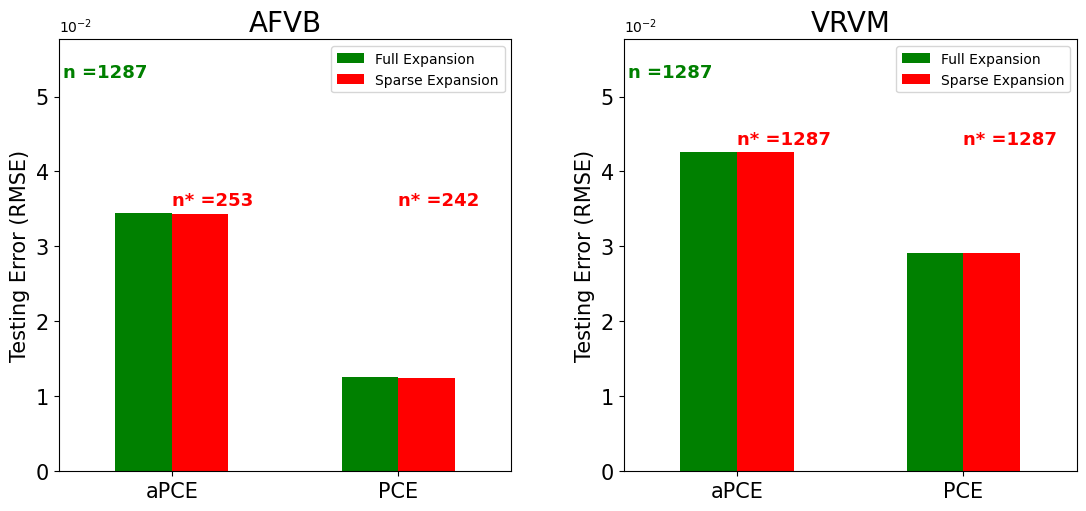

In [879]:
plot_Error(Error_AFVB_Borehole, Error_AFVB_PCE_Borehole, 
           Error_VRVM_Borehole, Error_VRVM_PCE_Borehole,
           100, '$10^{-2}$', mod_AFVB_Borehole.n)
#plt.savefig(wd + '/RMSE_Borehole.png')

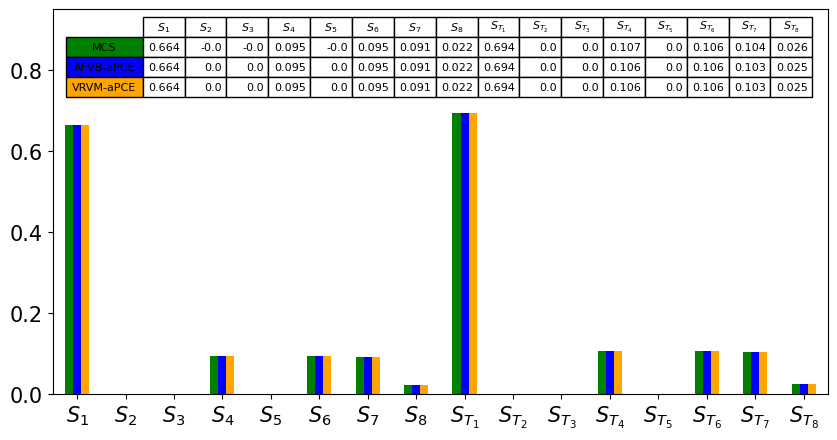

In [880]:
l = ['$S_1$', '$S_2$','$S_3$', '$S_4$', '$S_5$', '$S_6$', '$S_7$', '$S_8$',
     '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$', '$S_{T_4}$','$S_{T_5}$','$S_{T_6}$','$S_{T_7}$','$S_{T_8}$']

plot_Sobol_Indices(Sobol_MC_Borehole, 
           GSA_AFVB_Borehole, GSA_VRVM_Borehole, GSA4 = None,
                   l=l, ylimit=0.95, fig_size=(10,5), table_size=0.45);
#plt.savefig(wd + '/GSA_Borehole.png')

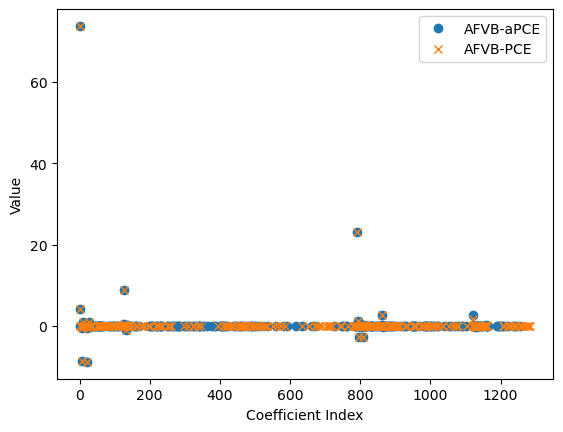

In [881]:
plt.plot(mod_AFVB_Borehole.active_cols, mod_AFVB_Borehole.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_Borehole.active_cols, mod_AFVB_PCE_Borehole.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_Borehole.png')

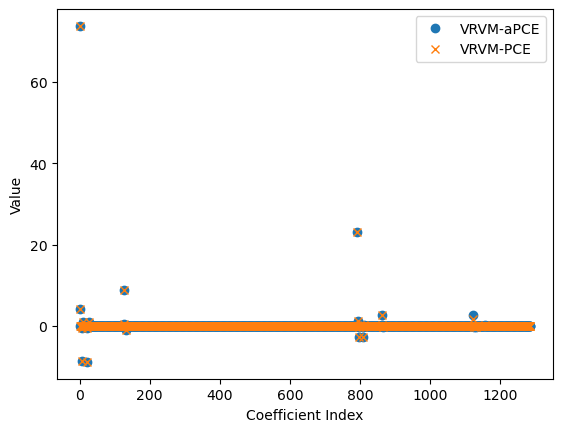

In [882]:
plt.plot(mod_VRVM_Borehole.active_cols, mod_VRVM_Borehole.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_Borehole.active_cols, mod_VRVM_PCE_Borehole.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_Borehole.png')

# Example 4: 1-dof Undamped Oscillator 

The performance function is

$$
G(X) = 3r-\left| \frac{2 F_1}{m\omega_0^2}\sin\left( \frac{\omega_0^2t_1}{2} \right) \right|
$$

where $\omega_0=\sqrt{\frac{c_1+c_2}{m}}$. The distribution of the random variables are as follow:

\begin{align*}
m &\sim \text{LogNormal}(1, 0.15^2) && \text{Mass} \\
c_1 &\sim \text{LogNormal}(1, 0.2^2) && \text{Stiffness of spring one} \\
c_2 &\sim \text{LogNormal}(0.1, 0.02^2) && \text{Stiffness of spring two} \\
r &\sim \text{LogNormal}(0.5, 0.1^2) && \text{Displacement yielded by one of the springs} \\
F_1 &\sim \text{LogNormal}(1, 0.2^2) && \text{Exciting force} \\
t_1 &\sim \text{LogNormal}(1, 0.1^2) && \text{Excitation time} 
\end{align*}

In [47]:
d = 6  # d --> number of random variables
p = 6 # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [48]:
n

924

In [49]:
#np.random.seed(123)
def make_data_oscillator(N):
    X = np.zeros((N, d))
    X[:,0] = np.random.lognormal(1, 0.15, size = N)
    X[:,1] = np.random.lognormal(1, 0.2, size = N)
    X[:,2] = np.random.lognormal(0.1, 0.02, size = N)
    X[:,3] = np.random.lognormal(0.5, 0.1, size = N)
    X[:,4] = np.random.lognormal(1, 0.2, size = N)
    X[:,5] = np.random.lognormal(1, 0.1, size = N)
    return X

In [50]:
X_train = make_data_oscillator(N_train)
X_test = make_data_oscillator(N_test)
X_pol = make_data_oscillator(N_pol)

idx = multivariate_pce_index(d, p)

In [51]:
def Oscillator_Function(X):
    m = X[:,0]
    c1 = X[:,1]
    c2 = X[:,2]
    r = X[:,3]
    F1 = X[:,4]
    t1 = X[:,5]
    
    w0 = np.sqrt((c1+c2)/m)
    
    return 3*r - np.abs(2*F1/(m*w0**2)*np.sin(w0**2*t1/2))

In [52]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

In [53]:
def basis_PCE_Oscillator(Z, p):
    "Z ~ LogNormal(.,.) as given in description"
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    mu_vals = [1, 1, 0.1, 0.5, 1, 1]
    sigma_vals = [0.15, 0.2, 0.02, 0.1, 0.2, 0.1]
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  hermitenorm(idx[i][j])((np.log(Z[:,j]) - mu_vals[j])/sigma_vals[j])
                    
    return Phi

## AFVB

In [54]:
Error_AFVB_Oscillator, GSA_AFVB_Oscillator, mod_AFVB_Oscillator, V_AFVB_Oscillator = Results(Oscillator_Function, X_train, X_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [55]:
Error_AFVB_Oscillator

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,138,0.000051,0.000371,0.020878,0.021347,12.49754


In [242]:
Error_AFVB_PCE_Oscillator, GSA_AFVB_PCE_Oscillator, mod_AFVB_PCE_Oscillator, V_AFVB_PCE_Oscillator = Results(Oscillator_Function, X_train, X_test, 
        AFVB_PCE(basis_PCE_Oscillator, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

## VRVM

In [243]:
a_0 = 0.2
b_0 = 1.0

sys.path.append('..')

data={'xi': X_train}
data['y'] = Oscillator_Function(X_train).reshape(N_train)

In [244]:
Error_VRVM_Oscillator, GSA_VRVM_Oscillator, mod_VRVM_Oscillator, V_VRVM_Oscillator = Results(Oscillator_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

In [245]:
Error_VRVM_PCE_Oscillator, GSA_VRVM_PCE_Oscillator, mod_VRVM_PCE_Oscillator, V_VRVM_PCE_Oscillator = Results(Oscillator_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_PCE_Oscillator, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

## MC Sobol Indices

In [247]:
dataA = pd.DataFrame(make_data_oscillator(N_mc)).values
dataB = pd.DataFrame(make_data_oscillator(N_mc)).values

Sobol_MC_Oscillator = MC_Sobol(Oscillator_Function, dataA, dataB)

# Plots

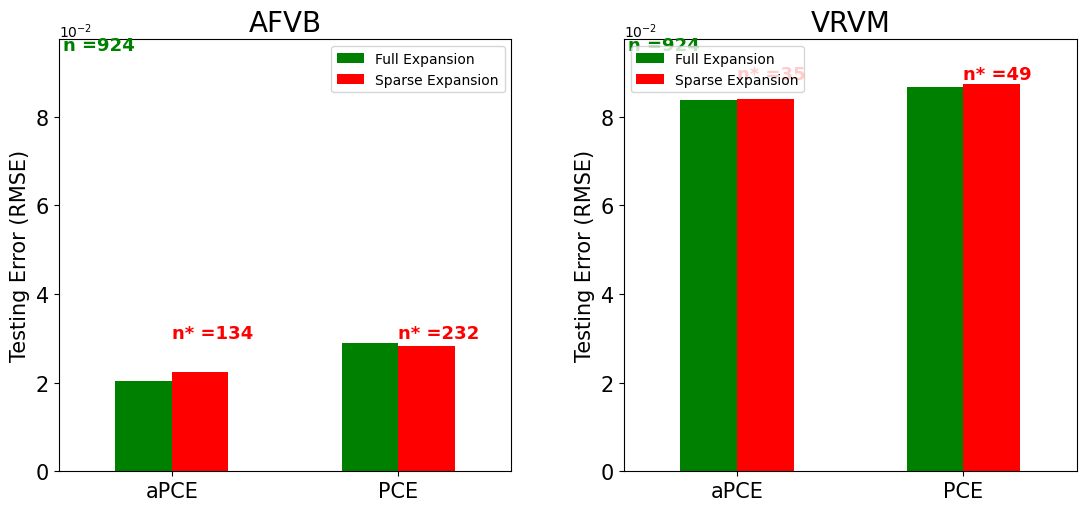

In [494]:
plot_Error(Error_AFVB_Oscillator, Error_AFVB_PCE_Oscillator, 
           Error_VRVM_Oscillator, Error_VRVM_PCE_Oscillator,
           100, '$10^{-2}$', mod_AFVB_Oscillator.n)
#plt.savefig(wd + '/RMSE_Oscillator.png')

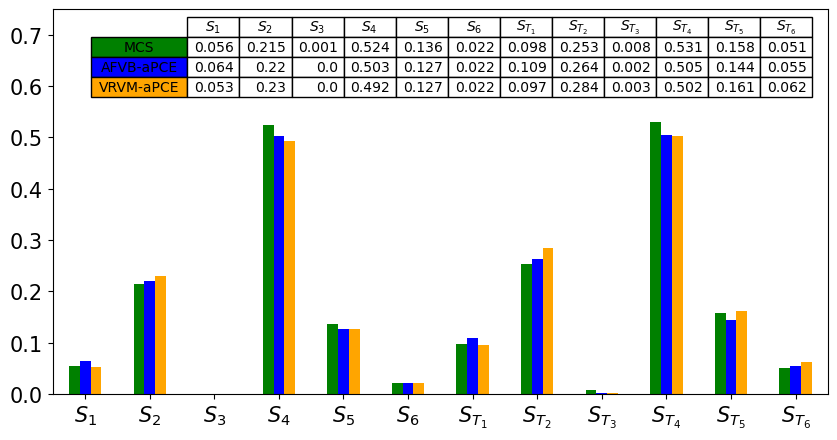

In [499]:
l = ['$S_1$', '$S_2$','$S_3$', '$S_4$', '$S_5$', '$S_6$',
     '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$', '$S_{T_4}$','$S_{T_5}$','$S_{T_6}$']

plot_Sobol_Indices(Sobol_MC_Oscillator[0], 
           GSA_AFVB_Oscillator, GSA_VRVM_Oscillator, GSA4 = None,
                   l=l, ylimit=0.75, fig_size=(10,5), table_size=0.56);
#plt.savefig(wd + '/GSA_Oscillator.png')

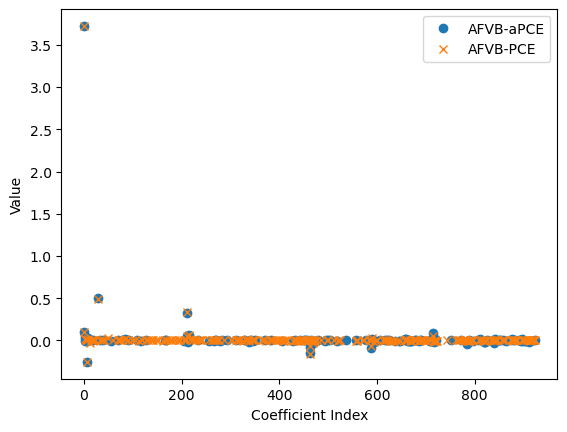

In [500]:
plt.plot(mod_AFVB_Oscillator.active_cols, mod_AFVB_Oscillator.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_Oscillator.active_cols, mod_AFVB_PCE_Oscillator.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_Oscillator.png')

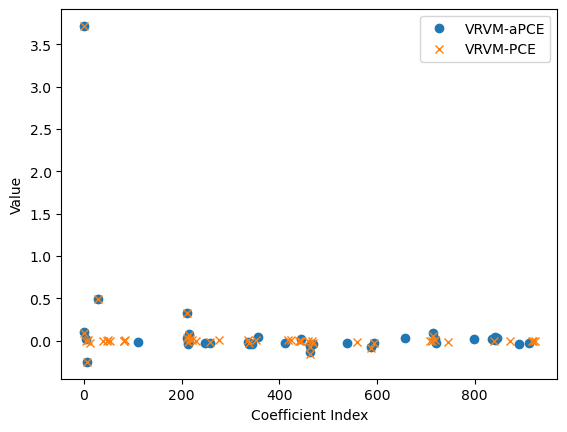

In [501]:
plt.plot(mod_VRVM_Oscillator.active_cols, mod_VRVM_Oscillator.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_Oscillator.active_cols, mod_VRVM_PCE_Oscillator.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_Oscillator.png')

# Example 5: Cantilever Tube Structure

A **cantilever** is a rigid structural element that extends horizontally and is supported at only one end. The structure is subjected to three random external forces $(F_1, F_2, P)$ and a random torque $T$. The structure fails when the maximum Von Mises stress $\sigma_{max}$ at the fixed end of the tube is greater than the yield strength $R$. The limit state function of the structure is expressed as:

$$
G = R-\sigma_{max} = R-\sqrt{\sigma_x^2+3\tau^2_{zx}}
$$

where 

\begin{align*}
\sigma_x &= \frac{F_1\sin\theta_1+F_2\sin\theta_2+P}{A} + \frac{Md}{2I} \\
M &= F_1\cos\theta_1L_1 + F_2\cos\theta_2L_2 \\
A &= \frac{\pi}{4}\left[d^2 - (d-2h)^2\right] \\
I &= \frac{\pi}{64}\left[d^4-(d-2h)^4\right] \\
\tau_{zx} &= \frac{Td}{4I}
\end{align*}

The **limit state function** $G(X)$ defines a failure criterion that is a function of all random variables $X$. Failure occurs when the load $L$ exceeds the capacity $R$ or when $G(X)<0$. The parameters have the following values:

\begin{align*}
L_1 &= 60 && \text{(mm)} \\
L_2 &= 120 && \text{(mm)} \\
\theta_1 &= 10^{\circ} = \frac{\pi}{18} \\
\theta_2 &= 5^{\circ} = \frac{\pi}{36} \\
d &\sim \mathcal{N}(42, 0.4998^2) && \text{(mm)} \\
h &\sim \mathcal{N}(5, 0.1^2) && \text{(mm)} \\
R_0 &\sim \mathcal{N}(560, 56^2) && \text{(MPa)} \\
F_1 &\sim \mathcal{N}(1800, 180^2) && \text{(N)} \\
F_2 &\sim \mathcal{N}(1800, 180^2) && \text{(N)} \\
P &\sim \mathcal{N}(1000, 100^2) && \text{(N)} \\
T &\sim \mathcal{N}(1900, 190^2) && \text{(Nm)} 
\end{align*}

In [75]:
d = 7  # d --> number of random variables
p = 6 # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))

In [76]:
# From first paper
L1 = 0.06
L2 = 0.12
Theta1 = 10
Theta2 = 5

D_mu = 0.042
h_mu = 0.005
R0_mu = 560
F_mu = 1800
P_mu = 1000
T_mu = 1900

In [77]:
def make_data_cantilever(N):
    X = np.zeros((N, d))

    # D, h, R0, F1, F2, P, T
    X[:,0] = np.random.normal(D_mu, D_mu*0.0119, N)
    X[:,1] = np.random.normal(h_mu, h_mu*0.02, N)
    X[:,2] = np.random.normal(R0_mu, R0_mu*0.1, N)
    X[:,3] = np.random.normal(F_mu, F_mu*0.1, N)
    X[:,4] = np.random.normal(F_mu, F_mu*0.1, N)
    X[:,5] = np.random.normal(P_mu, P_mu*0.1, N)
    X[:,6] = np.random.normal(T_mu, T_mu*0.1, N)
    
    return X

In [78]:
def Cantilever_Function(X):
    
    D = X[:,0]
    h = X[:,1]
    R0 = X[:,2]
    F1 = X[:,3]
    F2 = X[:,4]
    P = X[:,5]
    T = X[:,6]
    
    
    M = F1*np.cos(Theta1)*L1 + F2*np.cos(Theta2)*L2
    A = np.pi/4*(D**2 - (D - 2*h)**2)
    I = np.pi/64*(D**4 - (D - 2*h)**4)
    sigma_x = (F1*np.sin(Theta1) + F2*np.sin(Theta2) + P)/A + M*D/(2*I)
    tau_zx = T*D/(4*I)
    
    return R0/(np.sqrt(sigma_x**2 + 3*tau_zx**2)*10**(-6)) # Units in MPa

In [79]:
#np.random.seed(100)
X_test = make_data_cantilever(N_test)
X_train = make_data_cantilever(N_train)
X_pol = make_data_cantilever(N_pol)

Y_test = Cantilever_Function(X_test)
Y_train = Cantilever_Function(X_train)

idx = multivariate_pce_index(d, p)

In [80]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)
P_Stieltjes = mod.Create_Orthonormal_Polynomials_Stieltjes(p)

In [108]:
P[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.40798606e+01,  2.00186858e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00918418e+03, -2.38552695e+05,  2.83975079e+06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.45474776e+05,  1.75367590e+07, -4.17550750e+08,
         3.31349787e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04238269e+07, -9.93408838e+08,  3.54976168e+10,
        -5.63672641e+11,  3.35602431e+12,  0.00000000e+00,
         0.00000000e+00],
       [ 4.89272557e+06, -3.33029425e+08,  3.97711090e+09,
         1.88161238e+11, -5.60547626e+12,  4.27032133e+13,
         0.00000000e+00],
       [-5.68305066e+06,  4.06661870e+08, -6.02174978e+09,
        -1.97482044e+11,  7.09707040e+12, -6.95220478e+13,
         1.5643274

In [109]:
P_Stieltjes[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.40798606e+01,  2.00186858e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00918418e+03, -2.38552695e+05,  2.83975079e+06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.45474798e+05,  1.75367601e+07, -4.17550763e+08,
         3.31349787e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04705747e+07, -9.97429961e+08,  3.56258122e+10,
        -5.65462552e+11,  3.36521982e+12,  0.00000000e+00,
         0.00000000e+00],
       [-3.99013174e+08,  4.75170234e+10, -2.26313702e+12,
         5.38867673e+13, -6.41450415e+14,  3.05382209e+15,
         0.00000000e+00],
       [ 1.38263582e+10, -1.97629096e+12,  1.17685377e+14,
        -3.73708220e+15,  6.67429108e+16, -6.35647292e+17,
         2.5220626

In [85]:
def basis_PCE_Cantilever(Z, p):
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    mu_vals = [0.042, 0.005, 560, 1800, 1800, 1000, 1900]
    sigma_vals = [0.0004998, 0.0001, 56, 180, 180, 100, 190]
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  hermitenorm(idx[i][j])((Z[:,j]-mu_vals[j])/sigma_vals[j])
                    
    return Phi

# MC Sobol Indices

In [87]:
dataA = pd.DataFrame(make_data_cantilever(N_mc)).values
dataB = pd.DataFrame(make_data_cantilever(N_mc)).values

Sobol_MC_Cantilever = MC_Sobol(Cantilever_Function, dataA, dataB)

## AFVB

In [71]:
param_space = {'A_0': skopt.space.Real(0.00001, 0.1),
              'B_0': skopt.space.Real(0.00001, 0.1),
              'C_0': skopt.space.Real(0.00001, 0.1),
              'D_0': skopt.space.Real(0.00001, 0.1)
         }

In [72]:
t0 = time.time()
optimizer = BayesSearchCV(estimator = AFVB_PCE(basis = basis_aPCE, p = p),
                            search_spaces = param_space,
                            n_iter = 10,
                            scoring = 'neg_mean_squared_error',
                            cv = 5
)

optimizer.fit(X_train, Y_train)

print(time.time()-t0)

/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:140: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:140: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)
/Users/chave/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:140: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)

/Users/chave/CUDenver_Thesis/CUDenver-Thesis/AFVB_PCE.py:140: RuntimeWarning: invalid value encountered in subtract
  e_L = np.abs(100*(float(L_r) - L_old)/L_old)


150972.72714066505


In [74]:
150972/60/60

41.93666666666666

In [73]:
optimizer.best_params_

OrderedDict([('A_0', 0.09096737022686904),
             ('B_0', 0.036338331017918696),
             ('C_0', 0.06870344677300601),
             ('D_0', 0.07996448478724165)])

In [99]:
A_0 = 0.1
B_0 = 0.00001 
C_0 = 0.1
D_0 = 0.1 

In [100]:
Error_AFVB_Cantilever, GSA_AFVB_Cantilever, mod_AFVB_Cantilever, V_AFVB_Cantilever = Results(X_train, X_test, Y_train, Y_test,
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [101]:
Error_AFVB_Cantilever

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,24,0.000005,0.000217,0.00336,0.001125,44.650299


In [104]:
idx[mod_AFVB_Cantilever.active_cols]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 2],
       [0, 0, 1, 0, 0, 0, 3],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 2],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 2],
       [1, 0, 0, 0, 0, 0, 3],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0]])

In [102]:
Error_AFVB_Cantilever_S, GSA_AFVB_Cantilever_S, mod_AFVB_Cantilever_S, V_AFVB_Cantilever_S = Results(X_train, X_test, Y_train, Y_test,
        AFVB_PCE(basis_aPCE_Stieltjes, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [103]:
Error_AFVB_Cantilever_S

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,27,0.000005,0.000201,0.003343,0.000625,39.524697


In [105]:
idx[mod_AFVB_Cantilever_S.active_cols]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0, 5],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 2],
       [0, 0, 1, 0, 0, 0, 3],
       [0, 0, 1, 0, 0, 0, 5],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 2],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 2],
       [1, 0, 0, 0, 0, 0, 3],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 2],
       [1, 1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0]])

In [106]:
P[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.40798606e+01,  2.00186858e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00918418e+03, -2.38552695e+05,  2.83975079e+06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.45474776e+05,  1.75367590e+07, -4.17550750e+08,
         3.31349787e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04238269e+07, -9.93408838e+08,  3.54976168e+10,
        -5.63672641e+11,  3.35602431e+12,  0.00000000e+00,
         0.00000000e+00],
       [ 4.89272557e+06, -3.33029425e+08,  3.97711090e+09,
         1.88161238e+11, -5.60547626e+12,  4.27032133e+13,
         0.00000000e+00],
       [-5.68305066e+06,  4.06661870e+08, -6.02174978e+09,
        -1.97482044e+11,  7.09707040e+12, -6.95220478e+13,
         1.5643274

In [107]:
P_Stieltjes[0]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.40798606e+01,  2.00186858e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00918418e+03, -2.38552695e+05,  2.83975079e+06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.45474798e+05,  1.75367601e+07, -4.17550763e+08,
         3.31349787e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.04705747e+07, -9.97429961e+08,  3.56258122e+10,
        -5.65462552e+11,  3.36521982e+12,  0.00000000e+00,
         0.00000000e+00],
       [-3.99013174e+08,  4.75170234e+10, -2.26313702e+12,
         5.38867673e+13, -6.41450415e+14,  3.05382209e+15,
         0.00000000e+00],
       [ 1.38263582e+10, -1.97629096e+12,  1.17685377e+14,
        -3.73708220e+15,  6.67429108e+16, -6.35647292e+17,
         2.5220626

In [169]:
A_0 = 0.1
B_0 = 0.00001 
C_0 = 0.1
D_0 = 0.1 

In [170]:
Error_AFVB_PCE_Cantilever, GSA_AFVB_PCE_Cantilever, mod_AFVB_PCE_Cantilever, V_AFVB_PCE_Cantilever = Results(X_train, X_test, Y_train, Y_test, 
        AFVB_PCE(basis_PCE_Cantilever, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [167]:
Error_AFVB_PCE_Cantilever

,N_pol,n_star,RMSE_Train_full,RMSE_Train_sparse,RMSE_Test_full,RMSE_Test_sparse,time (min)
0,1000000,24,0.000045,0.000196,0.634318,0.000866,812.463429


## VRVM

In [74]:
a_0 = 0.2
b_0 = 1.0

data={'xi': X_train}
data['y'] = Cantilever_Function(X_train).reshape(N_train)

In [126]:
Error_VRVM_Cantilever, GSA_VRVM_Cantilever, mod_VRVM_Cantilever, V_VRVM_Cantilever = Results(data['xi'], X_test, Y_train, Y_test,
        SparseVariationalOptimizer(basis_aPCE, p, 1e-7, 1e-7, 1e-7, 1e-7, a_0, b_0), idx)

In [133]:
Error_VRVM_PCE_Cantilever, GSA_VRVM_PCE_Cantilever, mod_VRVM_PCE_Cantilever, V_VRVM_Cantilever = Results(data['xi'], X_test, Y_train, Y_test, 
        SparseVariationalOptimizer(basis_PCE_Cantilever, p, 1e-8, 1e-8, 1e-8, 1e-8, a_0, b_0), idx)

# Plots

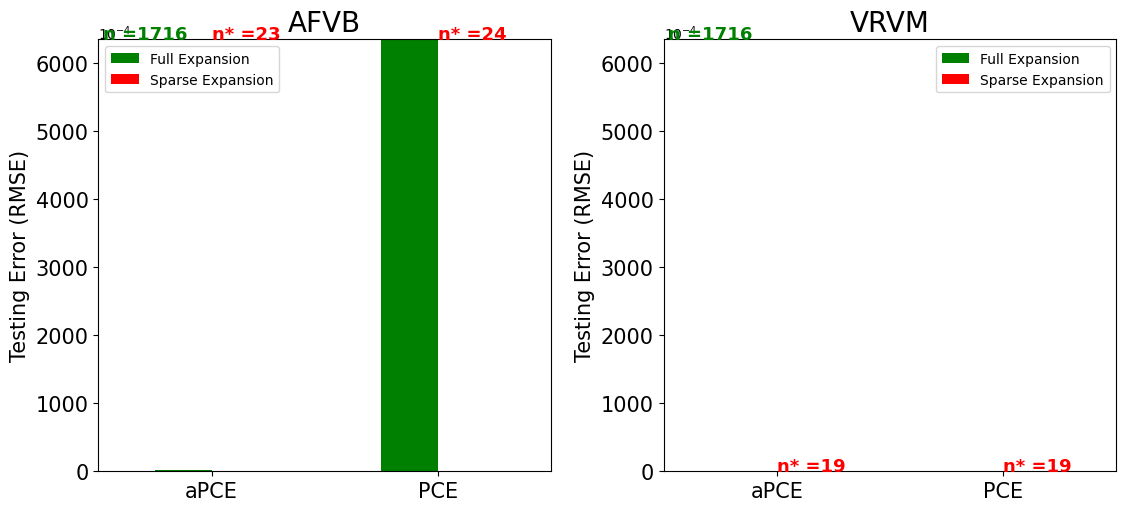

In [168]:
plot_Error(Error_AFVB_Cantilever, Error_AFVB_PCE_Cantilever, 
           Error_VRVM_Cantilever, Error_VRVM_PCE_Cantilever,
           10000, '$10^{-4}$', mod_AFVB_Cantilever.n)
#plt.savefig(wd + '/RMSE_Cantilever.png')

## Activity Scores

In [443]:
def Cantilever(d, h, R0, F1, F2, Pr, T):
    sig_x = (F1*np.sin(Theta1) + F2*np.sin(Theta2) + Pr)/(np.pi/4*(d**2 - (d-2*h)**2)) \
            + ((F1*np.cos(Theta1)*L1 + F2*np.cos(Theta2)*L2)*d)/(np.pi/32*(d**4 - (d-2*h)**4))
    tau_zx = T*d/(np.pi/16*(d**4 - (d - 2*h)**4))
    return R0 - (sig_x**2 + 3*tau_zx**2)**(1/2)

d, h, R0, F1, F2, Pr, T = symbols('d h R0 F1 F2 Pr T')

V_d = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), d))
V_h = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), h))
V_R0 = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), R0))
V_F1 = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), F1))
V_F2 = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), F2))
V_P = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), Pr))
V_T = lambdify([d, h, R0, F1, F2, Pr, T], diff(Cantilever(d, h, R0, F1, F2, Pr, T), T))

def grad_Cantilever(X):
    
    a_min = [X_train[:,0].min(), X_train[:,1].min(), X_train[:,2].min(), 
             X_train[:,3].min(), X_train[:,4].min(), X_train[:,5].min(), X_train[:,6].min()]
    b_min = [X_train[:,0].max(), X_train[:,1].max(), X_train[:,2].max(), 
             X_train[:,3].max(), X_train[:,4].max(), X_train[:,5].max(), X_train[:,6].max()]
    
    M = X.shape[0]
    d = X.shape[1]
    
    # scale to [a,b]
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    x4 = 0.5*(X[:,3] + 1)*(b_min[3] - a_min[3]) + a_min[3]
    x5 = 0.5*(X[:,4] + 1)*(b_min[4] - a_min[4]) + a_min[4]
    x6 = 0.5*(X[:,5] + 1)*(b_min[5] - a_min[5]) + a_min[5]
    x7 = 0.5*(X[:,6] + 1)*(b_min[6] - a_min[6]) + a_min[6]
    
    # derivative and scale back to [-1,1]
    grad_f = np.zeros((d,M))
    grad_f[0,:] = V_d(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[0] - a_min[0])
    grad_f[1,:] = V_h(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[1] - a_min[1])
    grad_f[2,:] = V_R0(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[2] - a_min[2])
    grad_f[3,:] = V_F1(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[3] - a_min[3])
    grad_f[4,:] = V_F2(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[4] - a_min[4])
    grad_f[5,:] = V_P(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[5] - a_min[5])
    grad_f[6,:] = V_T(x1, x2, x3, x4, x5, x6, x7)*0.5*(b_min[6] - a_min[6])
    
    return grad_f

In [446]:
M = 10000
X = np.random.uniform(-1, 1, (M, 7))
W_Cantilever, lam_Cantilever, alpha_Cantilever = Activity_Scores(M, 7, grad_Cantilever)

In [447]:
alpha_Cantilever

array([5.93105540e+14, 1.51391391e+14, 2.43178849e+04, 4.10955925e+10,
       7.98963801e+09, 2.09945601e+08, 7.40093316e+15])

### aPCE

In [448]:
def grad_Cantilever_aPCE(X):
    "Z ~ U(-1, 1)"
    
    M = X.shape[0]
    d = X.shape[1]
    
    a_min = [X_train[:,0].min(), X_train[:,1].min(), X_train[:,2].min(), 
             X_train[:,3].min(), X_train[:,4].min(), X_train[:,5].min(), X_train[:,6].min()]
    b_min = [X_train[:,0].max(), X_train[:,1].max(), X_train[:,2].max(), 
             X_train[:,3].max(), X_train[:,4].max(), X_train[:,5].max(), X_train[:,6].max()]
    
    # scale to [a,b]
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    x4 = 0.5*(X[:,3] + 1)*(b_min[3] - a_min[3]) + a_min[3]
    x5 = 0.5*(X[:,4] + 1)*(b_min[4] - a_min[4]) + a_min[4]
    x6 = 0.5*(X[:,5] + 1)*(b_min[5] - a_min[5]) + a_min[5]
    x7 = 0.5*(X[:,6] + 1)*(b_min[6] - a_min[6]) + a_min[6]
    
    n_star = a_hat.shape[0]
    grad_f = np.zeros((d,M))
    for i in range(n_star):
        grad_f[0,:] += a_hat[i][0]*\
                     Pol_eval(np.polyder((P[0][idx_star[i][0]])[::-1])[::-1], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
        
            
        grad_f[1,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(np.polyder((P[1][idx_star[i][1]])[::-1])[::-1], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
        
        
        grad_f[2,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(np.polyder((P[2][idx_star[i][2]])[::-1])[::-1], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
        
        grad_f[3,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(np.polyder((P[3][idx_star[i][3]])[::-1])[::-1], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
            
        grad_f[4,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(np.polyder((P[4][idx_star[i][4]])[::-1])[::-1], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
                
        grad_f[5,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(np.polyder((P[5][idx_star[i][5]])[::-1])[::-1], x6)*\
                     Pol_eval(P[6][idx_star[i][6]], x7)
                    
        grad_f[6,:] += a_hat[i][0]*\
                     Pol_eval(P[0][idx_star[i][0]], x1)*\
                     Pol_eval(P[1][idx_star[i][1]], x2)*\
                     Pol_eval(P[2][idx_star[i][2]], x3)*\
                     Pol_eval(P[3][idx_star[i][3]], x4)*\
                     Pol_eval(P[4][idx_star[i][4]], x5)*\
                     Pol_eval(P[5][idx_star[i][5]], x6)*\
                     Pol_eval(np.polyder((P[6][idx_star[i][6]])[::-1])[::-1], x7)
    
    grad_f[0,:] *= 0.5*(b_min[0] - a_min[0])
    grad_f[1,:] *= 0.5*(b_min[1] - a_min[1])
    grad_f[2,:] *= 0.5*(b_min[2] - a_min[2])
    grad_f[3,:] *= 0.5*(b_min[3] - a_min[3])
    grad_f[4,:] *= 0.5*(b_min[4] - a_min[4])
    grad_f[5,:] *= 0.5*(b_min[5] - a_min[5])
    grad_f[6,:] *= 0.5*(b_min[6] - a_min[6])
    
    return grad_f


In [450]:
idx_star = idx[mod_AFVB_Cantilever.active_cols]
a_hat = mod_AFVB_Cantilever.a_hat
W_aPCE, lam_aPCE, alpha_aPCE = Activity_Scores(M, 7, grad_Cantilever_aPCE)

In [451]:
alpha_aPCE

array([1.60418335e-02, 4.06541808e-03, 2.26506850e-01, 7.49722509e-07,
       0.00000000e+00, 0.00000000e+00, 2.35563346e-01])

### PCE

In [ ]:
def basis_PCE_Cantilever(Z, p):
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    mu_vals = [0.042, 0.005, 560, 1800, 1800, 1000, 1900]
    sigma_vals = [0.0004998, 0.0001, 56, 180, 180, 100, 190]
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  hermitenorm(idx[i][j])((Z[:,j]-mu_vals[j])/sigma_vals[j])
                    
    return Phi

In [ ]:
def grad_Cantilever_PCE(X):
    "Z ~ U(-1, 1)"

    a_min = [X_train[:,0].min(), X_train[:,1].min(), X_train[:,2].min(), 
             X_train[:,3].min(), X_train[:,4].min(), X_train[:,5].min(), X_train[:,6].min()]
    b_min = [X_train[:,0].max(), X_train[:,1].max(), X_train[:,2].max(), 
             X_train[:,3].max(), X_train[:,4].max(), X_train[:,5].max(), X_train[:,6].max()]
    
    mu_vals = [0.042, 0.005, 560, 1800, 1800, 1000, 1900]
    sigma_vals = [0.0004998, 0.0001, 56, 180, 180, 100, 190]
    
    x1 = 0.5*(X[:,0] + 1)*(b_min[0] - a_min[0]) + a_min[0]
    x2 = 0.5*(X[:,1] + 1)*(b_min[1] - a_min[1]) + a_min[1]
    x3 = 0.5*(X[:,2] + 1)*(b_min[2] - a_min[2]) + a_min[2]
    x4 = 0.5*(X[:,3] + 1)*(b_min[3] - a_min[3]) + a_min[3]
    x5 = 0.5*(X[:,4] + 1)*(b_min[4] - a_min[4]) + a_min[4]
    x6 = 0.5*(X[:,5] + 1)*(b_min[5] - a_min[5]) + a_min[5]
    x7 = 0.5*(X[:,6] + 1)*(b_min[6] - a_min[6]) + a_min[6]
    
    n_star = a_hat.shape[0]
    grad_f = np.zeros((d,M))
    for i in range(n_star):
        grad_f[0,:] += a_hat[i][0]*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][0])))[::-1], (x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])
            
        grad_f[1,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][1])))[::-1], (x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])
        
        grad_f[2,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][2])))[::-1], (x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])

        grad_f[3,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][3])))[::-1], (x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])

        
        grad_f[4,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][4])))[::-1], (x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])

        grad_f[5,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][5])))[::-1], (x6-mu_vals[5])/sigma_vals[5])*\
                     hermitenorm(idx_star[i][6])((x7-mu_vals[6])/sigma_vals[6])

        grad_f[6,:] += a_hat[i][0]*\
                     hermitenorm(idx_star[i][0])((x1-mu_vals[0])/sigma_vals[0])*\
                     hermitenorm(idx_star[i][1])((x2-mu_vals[1])/sigma_vals[1])*\
                     hermitenorm(idx_star[i][2])((x3-mu_vals[2])/sigma_vals[2])*\
                     hermitenorm(idx_star[i][3])((x4-mu_vals[3])/sigma_vals[3])*\
                     hermitenorm(idx_star[i][4])((x5-mu_vals[4])/sigma_vals[4])*\
                     hermitenorm(idx_star[i][5])((x6-mu_vals[5])/sigma_vals[5])*\
                     Pol_eval(np.polyder(np.array(hermitenorm(idx_star[i][6])))[::-1], (x7-mu_vals[6])/sigma_vals[6])

    #grad_f[0] *= 0.5*(b_min[0] - a_min[0])
    #grad_f[1] *= 0.5*(b_min[1] - a_min[1])
    #grad_f[2] *= 0.5*(b_min[2] - a_min[2])
    return grad_f

In [ ]:
idx_star = idx[mod_AFVB_PCE_Cantilever.active_cols]
a_hat = mod_AFVB_PCE_Cantilever.a_hat
W_PCE, lam_PCE, alpha_PCE = Activity_Scores(M, 7, grad_Cantilever_PCE)

In [ ]:
plt.plot(W_Ishigami[:,0],'o-', c = 'b', label = 'Function')
plt.plot(W_Ishigami[:,1],'x-', c = 'b')
plt.plot(W_PCE[:,0],'o--', c = 'r', label = 'PCE')
plt.plot(W_PCE[:,1],'x--', c = 'r')
plt.plot(W_aPCE[:,0],'o--', c = 'y', label = 'aPCE')
plt.plot(W_aPCE[:,1],'x--', c = 'y')
plt.legend()

In [ ]:
plt.plot(lam_Ishigami,'o-', c = 'b', label = 'Function')
plt.plot(lam_PCE,'o--', c = 'r', label = 'PCE')
plt.plot(lam_aPCE,'--', c = 'y', label = 'aPCE')
plt.legend()

In [ ]:
alpha_df = pd.DataFrame([alpha_Ishigami, alpha_PCE, alpha_aPCE]).T

In [ ]:
alpha_df.index = ['$a_1$', '$a_2$', '$a_3$']
alpha_df.columns = ['Function', 'PCE', 'aPCE']
alpha_df

In [ ]:
alpha_df.plot.bar();

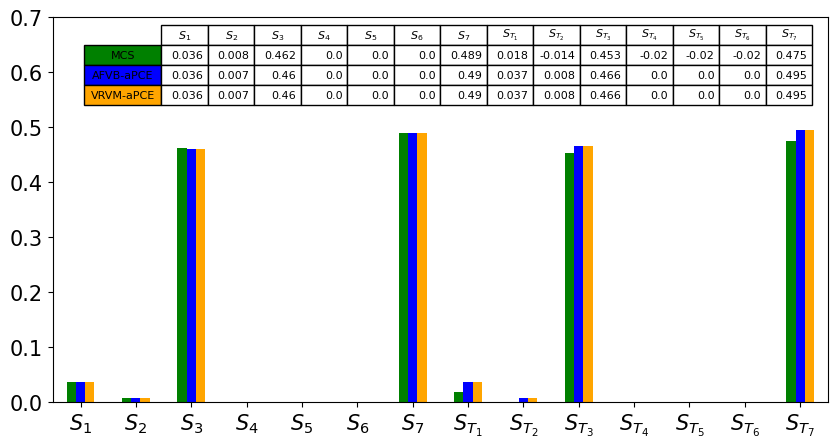

In [112]:
l = ['$S_1$', '$S_2$','$S_3$', '$S_4$', '$S_5$', '$S_6$', '$S_7$',
     '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$', '$S_{T_4}$','$S_{T_5}$','$S_{T_6}$','$S_{T_7}$']

plot_Sobol_Indices(Sobol_MC_Cantilever[0], 
           GSA_AFVB_Cantilever, GSA_VRVM_Cantilever, GSA4 = None,
                   l=l, ylimit=0.7, fig_size=(10,5), table_size=0.5);
#plt.savefig(wd + '/GSA_Cantilever.png')

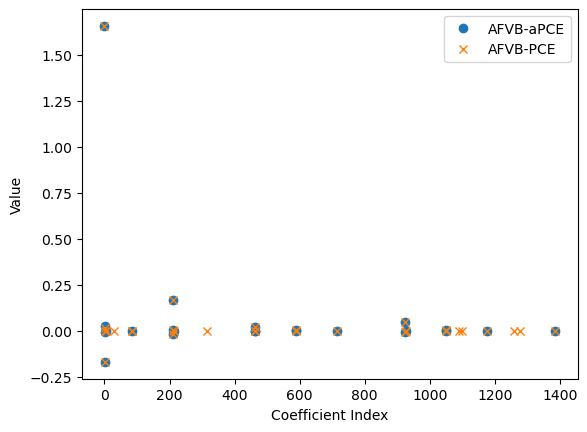

In [113]:
plt.plot(mod_AFVB_Cantilever.active_cols, mod_AFVB_Cantilever.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_Cantilever.active_cols, mod_AFVB_PCE_Cantilever.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_Cantilever.png')

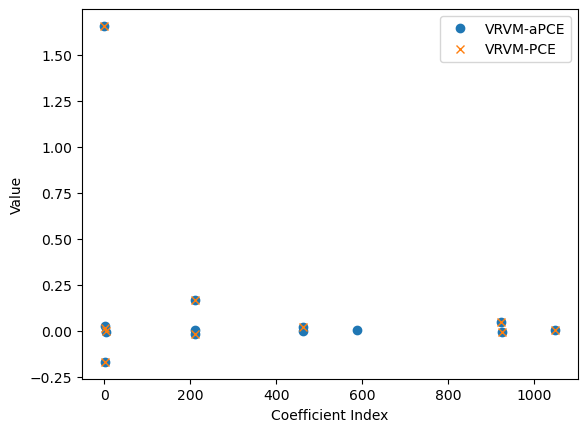

In [114]:
plt.plot(mod_VRVM_Cantilever.active_cols, mod_VRVM_Cantilever.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_Cantilever.active_cols, mod_VRVM_PCE_Cantilever.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_Cantilever.png')

# Example 6: Sobol' function

The Sobol function is given by

$$
Y = \prod_{i=1}^d\frac{|4\xi_i - 2| + a_i}{1 + a_i}
$$

where $\xi_i$ are independent random variables uniformly distributed over $[0,1]$ and $a_i$ are the constants. 


In [302]:
d = 8  # d --> number of random variables
p = 5  # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [303]:
X_train = np.random.uniform(0, 1, size=(N_train, d))
X_test = np.random.uniform(0, 1, size=(N_test, d))
X_pol = np.random.uniform(0, 1, size=(N_pol, d))

idx = multivariate_pce_index(d, p)

In [304]:
def Sobol_Function(Z):
    alpha = np.c_[1, 2, 5, 10, 20, 50, 100, 500]
    return np.c_[np.prod((np.abs(4*Z - 2) + alpha)/(1 + alpha),1)]

In [305]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

In [306]:
def basis_PCE_Sobol(Z, p):
    "Z ~ U(0, 1)"
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  math.sqrt((2*idx[i][j]+1)/1)*legendre(idx[i][j])(2*Z[:,j]-1)
    return Phi

# MC Sobol Indices

In [307]:
dataA = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values
dataB = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values

Sobol_MC_Sobol = MC_Sobol(Sobol_Function, dataA, dataB)

In [308]:
# Analytical Sobol Indices
GSA_Sobol = ([0.6037, 0.2683, 0.0671, 0.0200, 0.0055, 0.0009, 0.0002, 0.0000], 
             [0.6342, 0.2945, 0.0756, 0.0227, 0.0062, 0.0011, 0.003, 0.0000])

GSA_Sobol = pd.DataFrame(GSA_Sobol).T
GSA_Sobol.columns = ['1st Order', 'Total Order']

# AFVB

In [309]:
Error_AFVB_Sobol, GSA_AFVB_Sobol, mod_AFVB_Sobol, V_AFVB_Sobol = Results(Sobol_Function, X_train, X_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [311]:
Error_AFVB_PCE_Sobol, GSA_AFVB_PCE_Sobol, mod_AFVB_PCE_Sobol, V_AFVB_PCE_Sobol = Results(Sobol_Function, X_train, X_test, 
        AFVB_PCE(basis_PCE_Sobol, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

# VRVM

In [313]:
data={'xi': X_train}
data['y'] = Sobol_Function(X_train).reshape(N_train)

a_0 = 0.2
b_0 = 1.0

In [314]:
Error_VRVM_Sobol, GSA_VRVM_Sobol, mod_VRVM_Sobol, V_VRVM_Sobol = Results(Sobol_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

In [315]:
Error_VRVM_PCE_Sobol, GSA_VRVM_PCE_Sobol, mod_VRVM_PCE_Sobol, V_VRVM_PCE_Sobol = Results(Sobol_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_PCE_Sobol, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

# Plots

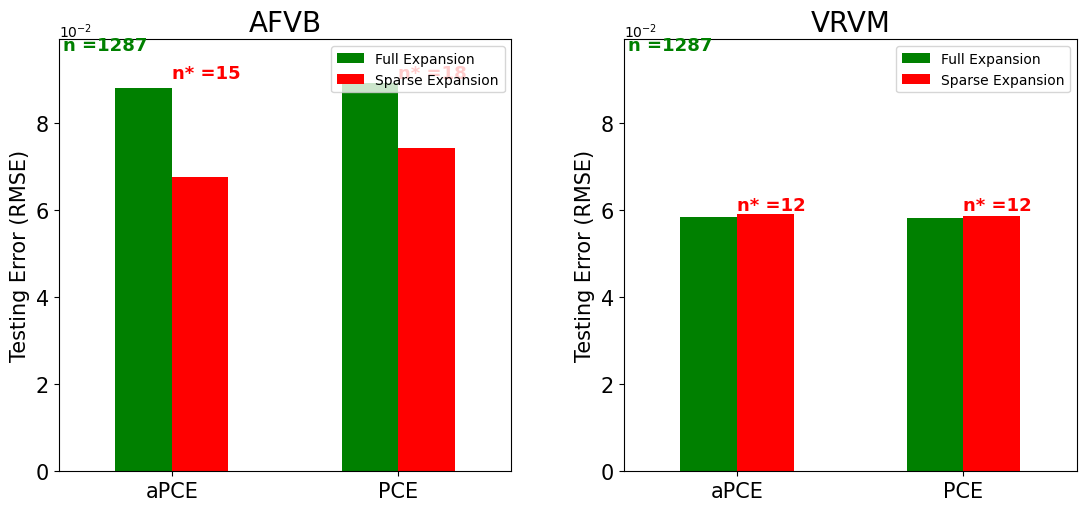

In [510]:
plot_Error(Error_AFVB_Sobol, Error_AFVB_PCE_Sobol, 
           Error_VRVM_Sobol, Error_VRVM_PCE_Sobol,
           100, '$10^{-2}$', mod_AFVB_Sobol.n)
#plt.savefig(wd + '/RMSE_Sobol.png')

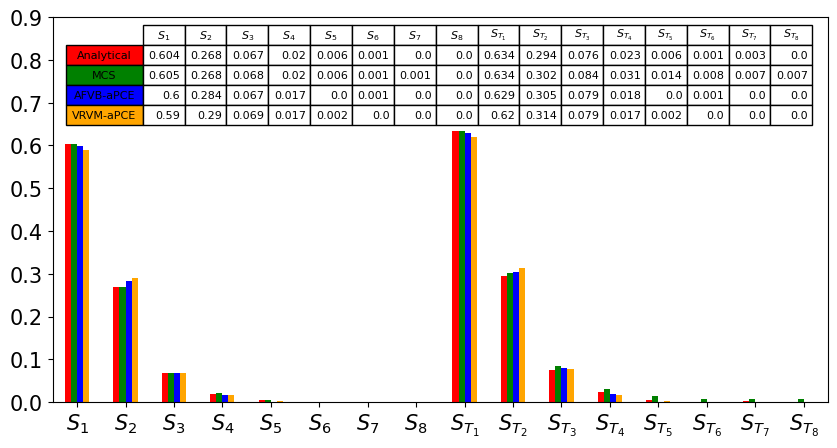

In [511]:
l = ['$S_1$', '$S_2$','$S_3$', '$S_4$', '$S_5$', '$S_6$', '$S_7$', '$S_8$',
     '$S_{T_1}$','$S_{T_2}$','$S_{T_3}$', '$S_{T_4}$','$S_{T_5}$','$S_{T_6}$','$S_{T_7}$','$S_{T_8}$']

plot_Sobol_Indices(GSA_Sobol, Sobol_MC_Sobol[0], 
           GSA_AFVB_Sobol, GSA_VRVM_Sobol,
                   l=l, ylimit=0.9, fig_size=(10,5), table_size=0.45);
#plt.savefig(wd + '/GSA_Sobol.png')

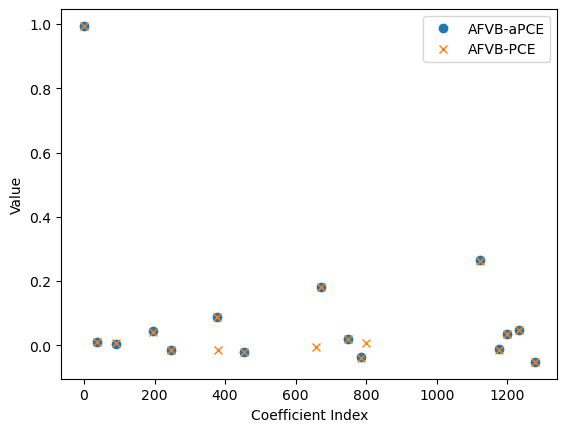

In [512]:
plt.plot(mod_AFVB_Sobol.active_cols, mod_AFVB_Sobol.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_Sobol.active_cols, mod_AFVB_PCE_Sobol.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_Sobol.png')

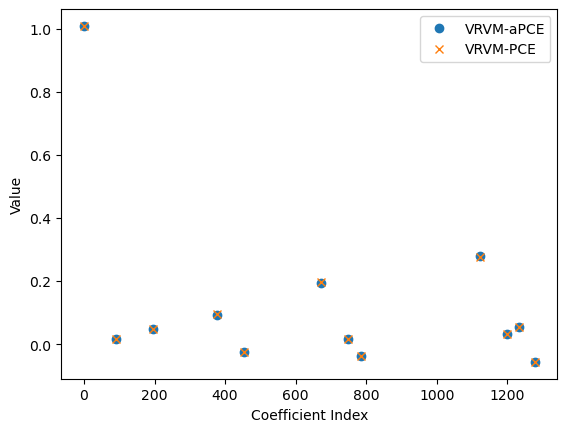

In [513]:
plt.plot(mod_VRVM_Sobol.active_cols, mod_VRVM_Sobol.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_Sobol.active_cols, mod_VRVM_PCE_Sobol.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_Sobol.png')

In [514]:
sns.kdeplot(mod_AFVB_PCE.Sobol.predict(X_test, active_cols_pce).reshape(N_test), color='b', label='AFVB_PCE')
sns.kdeplot(mod_AFVB.predict(X_test, active_cols).reshape(N_test), color='g', label='AFVB_aPCE')
sns.kdeplot(Sobol_Function(X_test).reshape(N_test), color='r', label='Sobol Function')
plt.legend();

NameError: name 'mod_AFVB_pce' is not defined

# Example 7: PDE

In [602]:
d = 2  # d --> number of random variables
p = 12  # p --> degree of PCE polynomial
n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p))) # n --> Number of terms in the PCE expansion

In [ ]:
X_train = np.random.normal(9/10, 1/4, size=(N_train, d))
X_test = np.random.normal(9/10, 1/4, size=(N_test, d))
X_pol = np.random.normal(9/10, 1/4, size=(N_pol, d))

idx = multivariate_pce_index(d, p)

In [ ]:
def PDE_Function(Z, t = 1):
    
    return -np.exp(-Z[:,0])*(t + (t - t**2/2)*np.exp(Z[:,1]))

In [ ]:
mod = aPCE(X_pol, p, idx)
P = mod.Create_Orthonormal_Polynomials(p)

In [ ]:
def basis_PCE_PDE(Z, p):
    "Z ~ N(9/10, 1/4)"
    d = Z.shape[1]
    N = Z.shape[0]
    n = int(math.factorial(d + p)/(math.factorial(d)*math.factorial(p)))
        
    idx = multivariate_pce_index(d, p)
    Phi = np.ones((N, n))
    
    for i in range(n):
        for j in range(d):
            Phi[:,i] *=  hermitenorm(idx[i][j])((Z[:,j]-0.9)/0.25)
    return Phi

# MC Sobol Indices

In [ ]:
dataA = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values
dataB = pd.DataFrame(np.random.uniform(0, 1, size=(N_mc, d))).values

Sobol_MC_PDE = MC_Sobol(PDE_Function, dataA, dataB)

# AFVB

In [ ]:
Error_AFVB_PDE, GSA_AFVB_PDE, mod_AFVB_PDE, V_AFVB_PDE = Results(PDE_Function, X_train, X_test, 
        AFVB_PCE(basis_aPCE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

In [ ]:
Error_AFVB_PCE_PDE, GSA_AFVB_PCE_PDE, mod_AFVB_PCE_PDE, V_AFVB_PCE_PDE = Results(PDE_Function, X_train, X_test, 
        AFVB_PCE(basis_PCE_PDE, p, A_0, B_0, C_0, D_0, T_ell, e), idx)

# VRVM

In [ ]:
data={'xi': X_train}
data['y'] = PDE_Function(X_train).reshape(N_train)

a_0 = 0.2
b_0 = 1.0

In [ ]:
Error_VRVM_PDE, GSA_VRVM_PDE, mod_VRVM_PDE, V_VRVM_PDE = Results(PDE_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_aPCE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

In [ ]:
Error_VRVM_PCE_PDE, GSA_VRVM_PCE_PDE, mod_VRVM_PCE_PDE, V_VRVM_PCE_PDE = Results(PDE_Function, data['xi'], X_test, 
        SparseVariationalOptimizer(basis_PCE_PDE, p, 1e-6, 1e-6, 1e-6, 1e-6, a_0, b_0), idx)

# Plots

In [ ]:
plot_Error(Error_AFVB_PDE, Error_AFVB_PCE_PDE, 
           Error_VRVM_PDE, Error_VRVM_PCE_PDE,
           100, '$10^{-2}$', mod_AFVB_PDE.n)
#plt.savefig(wd + '/RMSE_PDE.png')

In [ ]:
l = ['$S_1$', '$S_2$',
     '$S_{T_1}$','$S_{T_2}$']

plot_Sobol_Indices(Sobol_MC_PDE[0], 
           GSA_AFVB_PDE, GSA_VRVM_PDE,
                   l=l, ylimit=0.9, fig_size=(10,5), table_size=0.45);
#plt.savefig(wd + '/GSA_PDE.png')

In [ ]:
plt.plot(mod_AFVB_PDE.active_cols, mod_AFVB_PDE.a_hat, 'o', label = 'AFVB-aPCE')
plt.plot(mod_AFVB_PCE_PDE.active_cols, mod_AFVB_PCE_PDE.a_hat, 'x', label = 'AFVB-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_AFVB_PDE.png')

In [ ]:
plt.plot(mod_VRVM_PDE.active_cols, mod_VRVM_PDE.a_hat, 'o', label = 'VRVM-aPCE')
plt.plot(mod_VRVM_PCE_PDE.active_cols, mod_VRVM_PCE_PDE.a_hat, 'x', label = 'VRVM-PCE')
plt.legend()
plt.xlabel('Coefficient Index')
plt.ylabel('Value');
#plt.savefig(wd + '/Coeff_VRVM_PDE.png')

# Hyper-parameter Tunning

In [873]:
from bayes_opt import BayesianOptimization, UtilityFunction

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define the black box function to optimize.
def black_box_function(C):
    # C: SVC hyper parameter to optimize for.
    model = SVC(C = C)
    model.fit(X_train_scaled, y_train)
    y_score = model.decision_function(X_test_scaled)
    f = roc_auc_score(y_test, y_score)
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [0.1, 10]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))